In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 7

In [3]:
%load_ext autoreload
%autoreload 1

In [4]:
%aimport br_ospanov
bro = br_ospanov

In [5]:
params = {}

params['amin'] = 75
params['amax'] = 90
params['bmin'] = 500
params['bmax'] = 600
params['p1'] = 0.1
params['p2'] = 0.01
params['p3'] = 0.3
params['N'] = 50

p = params

# Модель 4

## 1. Математические ожидания и дисперсии $a$, $b$, $c_n$, $d_n$

In [6]:
expect_a = bro.expectation('unif', {'a': p['amin'], 'b': p['amax']})
expect_b = bro.expectation('unif', {'a': p['bmin'], 'b': p['bmax']})
expect_c_n = p['p1'] * expect_a + p['p2'] * expect_b
expect_d_n = (1 + p['p3']) * expect_c_n

In [7]:
var_a = bro.variance('unif', {'a': p['amin'], 'b': p['amax']})
var_b = bro.variance('unif', {'a': p['bmin'], 'b': p['bmax']})

In [8]:
var_c_n = p['p1'] * expect_a + p['p2'] * expect_b + (p['p1'] ** 2) * var_a + (p['p2'] ** 2) * var_b
var_d_n = p['p3'] * (1 - p['p3']) * expect_c_n + (1 + p['p3']) ** 2 * var_c_n

In [9]:
print("Математические ожидания:")
print("\tE(a) =", expect_a)
print("\tE(b) =", expect_b)
print("\tE(c_n) =", expect_c_n)
print("\tE(d_n) =", expect_d_n)

print("\nДисперсии:")
print("\tD(a) =", var_a)
print("\tD(b) =", var_b)
print("\tD(c_n) =", var_c_n)
print("\tD(d_n) =", var_d_n)

Математические ожидания:
	E(a) = 82.5
	E(b) = 550.0
	E(c_n) = 13.75
	E(d_n) = 17.875

Дисперсии:
	D(a) = 21.25
	D(b) = 850.0
	D(c_n) = 14.047500000000001
	D(d_n) = 26.627775000000003


## 2. Генератор выборки $d_1, d_2, ..., d_N$

In [10]:
a = np.random.randint(p['amin'], p['amax'])
b = np.random.randint(p['bmin'], p['bmax'])

In [11]:
d = bro.generate(p['N'], a, b, p, 4)

In [12]:
d

array([24, 15, 23, 28, 16, 15, 14, 12, 31, 19, 18, 17, 16, 26, 14, 16, 27,
       25, 20, 17, 28, 10, 19, 23, 19, 17, 14, 20, 13, 24, 17, 19, 31, 16,
       19,  9, 17, 22, 15, 20, 15, 23, 18, 22, 22, 20, 26, 25, 23, 13])

## 3. Наблюдение $p(b|d_1, ..., d_N), p(d|a, d_1, ..., d_N)$

In [13]:
pb = bro.pb(p)

### 3.1. $d_1, ..., d_N$ из генератора при $a = E(a), b = E(b)$

In [14]:
d = bro.generate(p['N'], round(expect_a), round(expect_b), p, 4)
pb_d = bro.pb_d(d, p, 4)

##### 3.1.1. Мат. ожидания и дисперсии

In [15]:
expect_b_d_i = [bro.expectation('custom', {'p': p, 'x': pb_d[1]}) for p in pb_d[0].T]
var_b_d_i = [bro.variance('custom', {'p': p, 'x': pb_d[1]}) for p in pb_d[0].T]

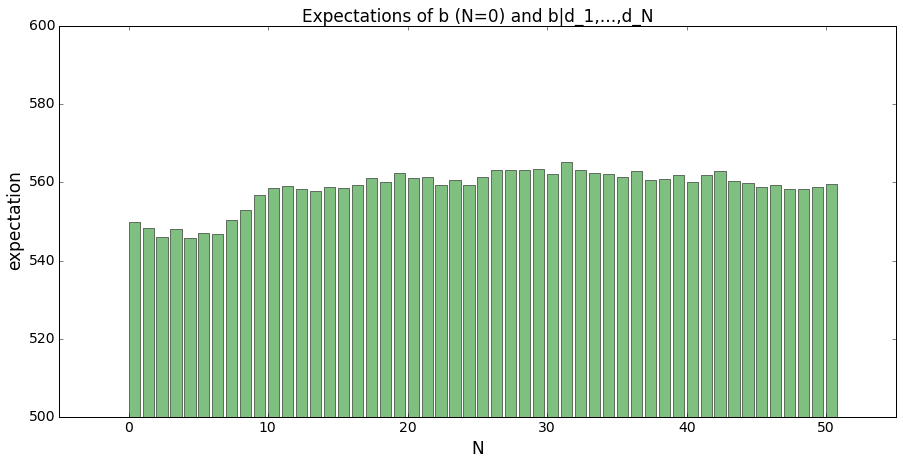

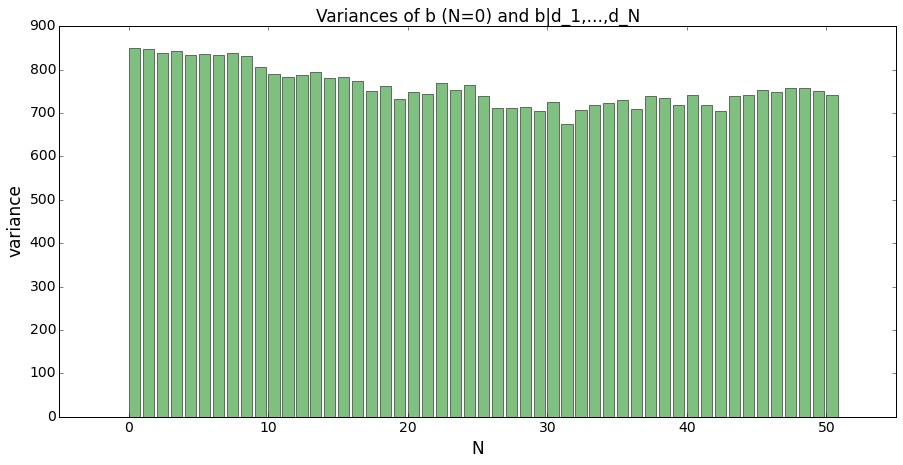

In [16]:
p = params
plt.rcParams['figure.figsize'] = 15, 7

plt.title('Expectations of b (N=0) and b|d_1,...,d_N', size=17)
plt.ylabel('expectation', size=17)
plt.xlabel('N', size=17)
plt.ylim((p['bmin'], p['bmax']))
plt.xlim((-5, 55))
plt.tick_params(axis='both', which='major', labelsize=14)
plt.bar(range(p['N'] + 1), [expect_b] + expect_b_d_i, color='g', alpha=0.5)
plt.show()

plt.title('Variances of b (N=0) and b|d_1,...,d_N', size=17)
plt.ylabel('variance', size=17)
plt.xlabel('N', size=17)
plt.xlim((-5, 55))
plt.tick_params(axis='both', which='major', labelsize=14)
plt.bar(range(p['N'] + 1), [var_b] + var_b_d_i, color='g', alpha=0.5)
plt.show()

##### 3.1.2. Графики

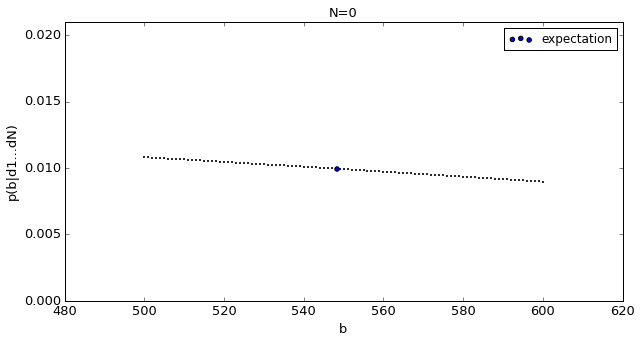

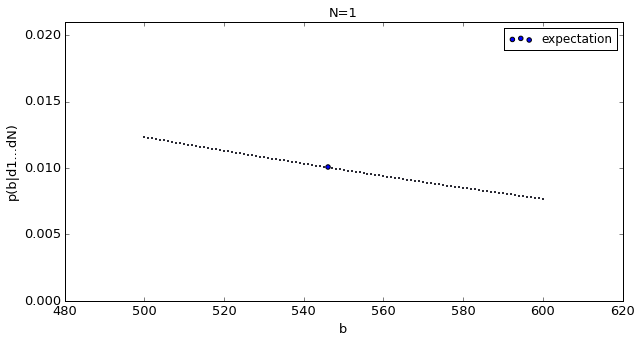

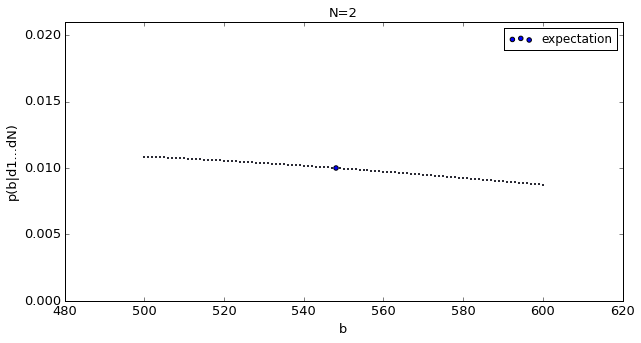

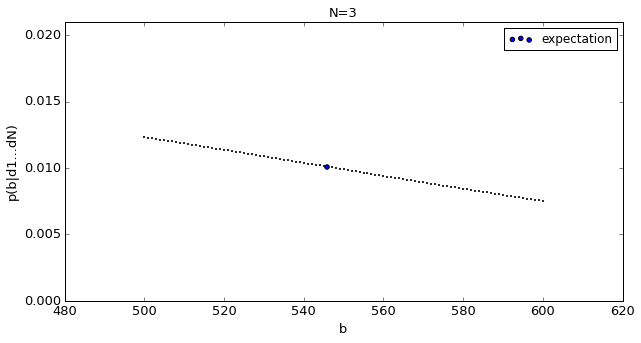

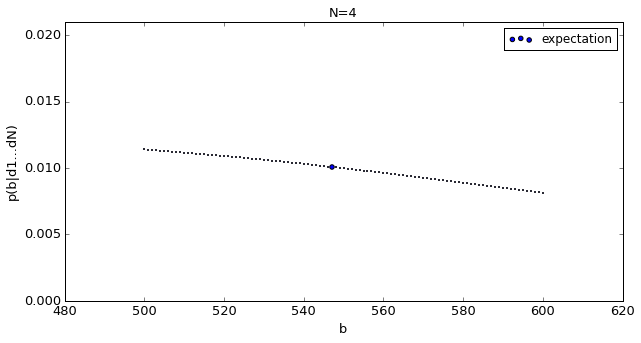

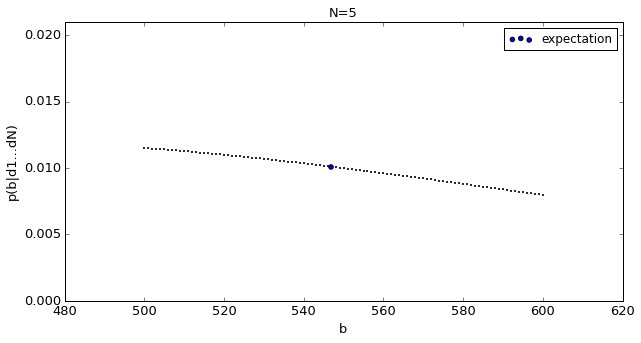

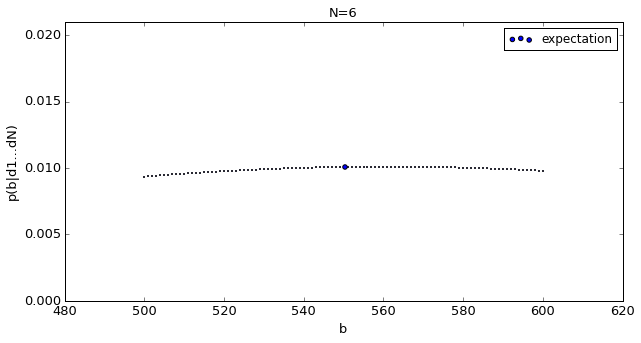

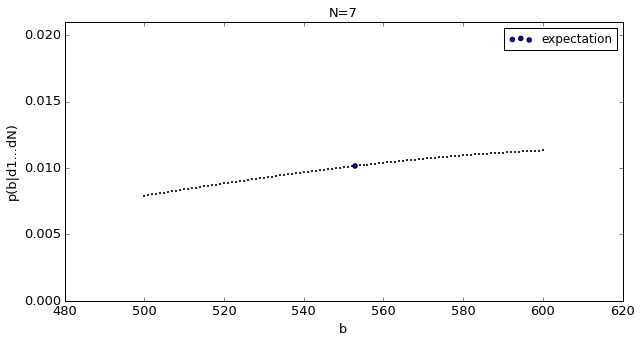

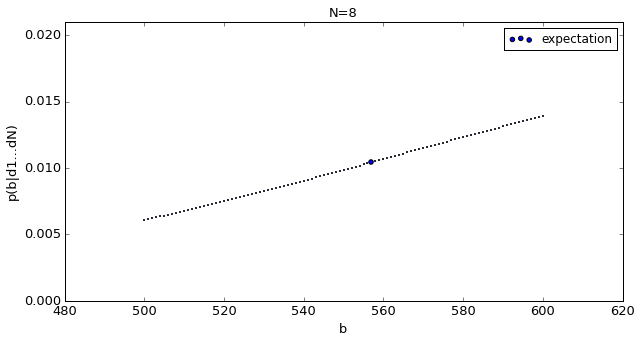

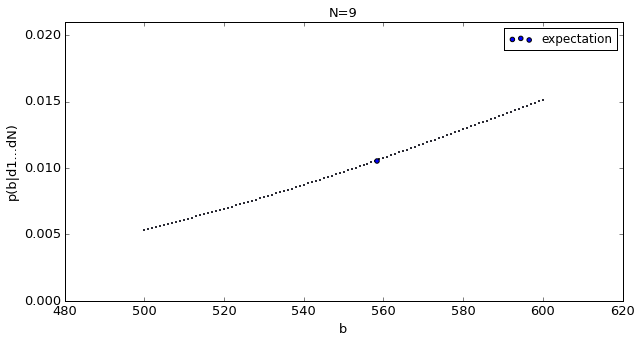

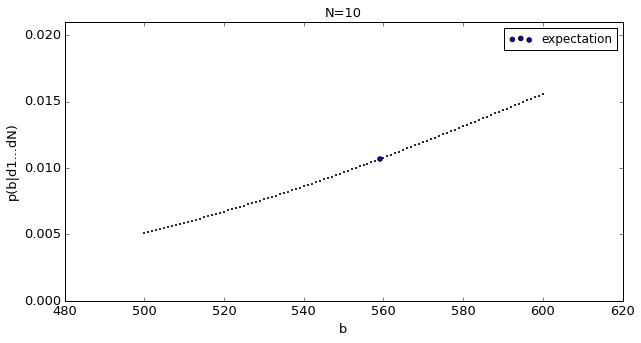

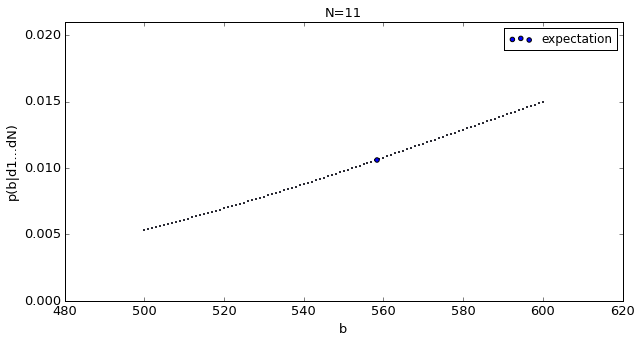

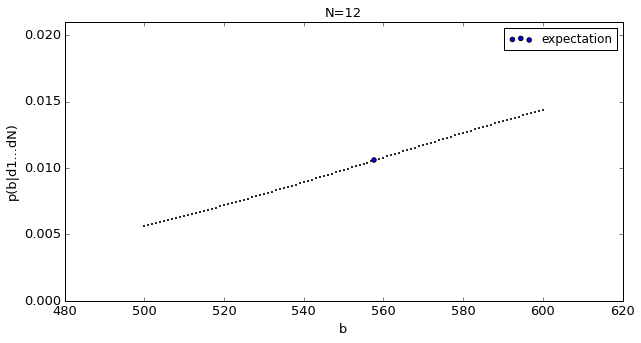

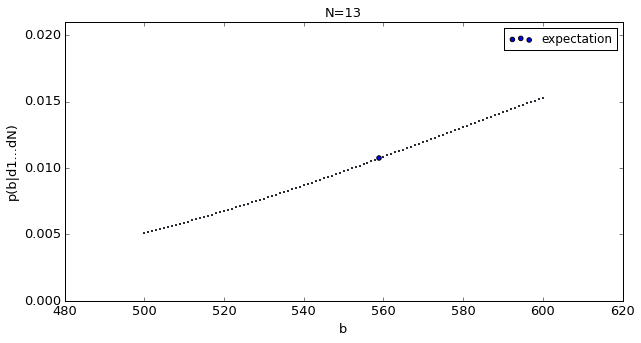

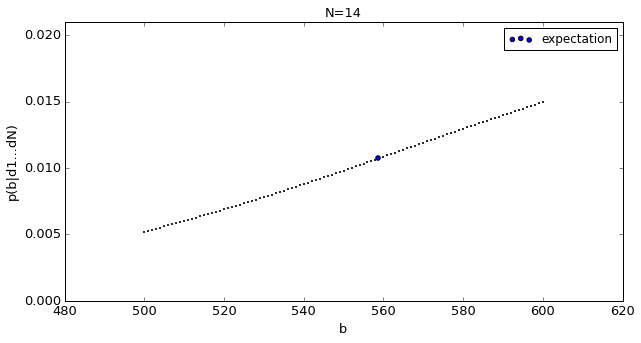

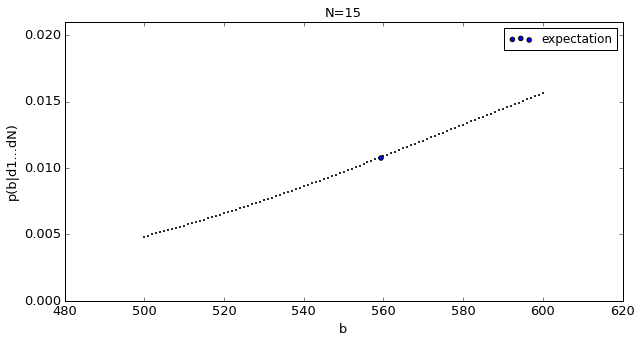

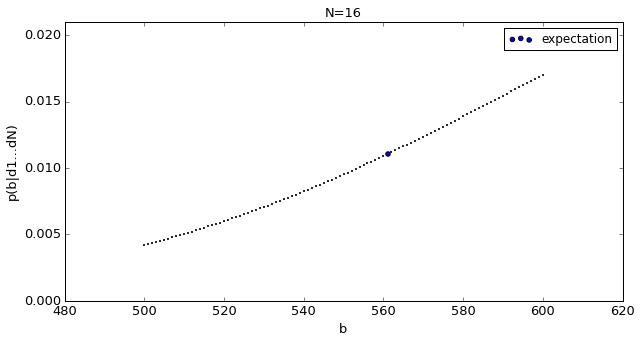

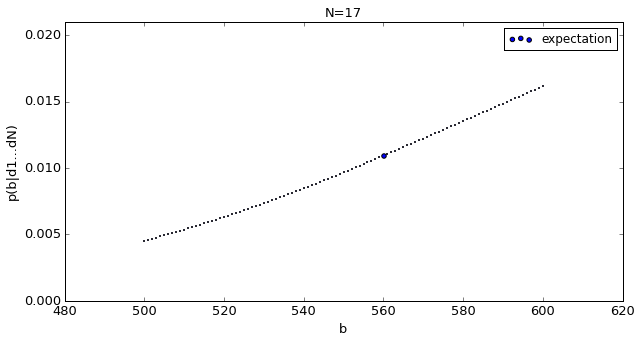

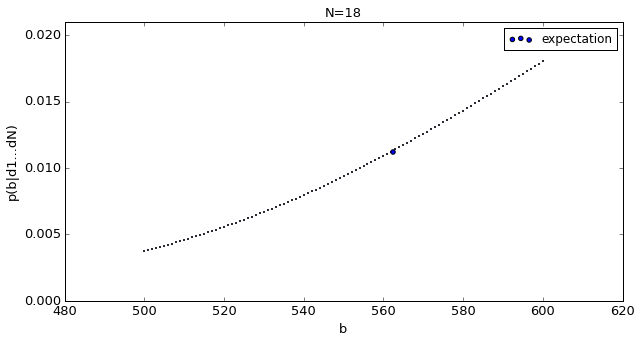

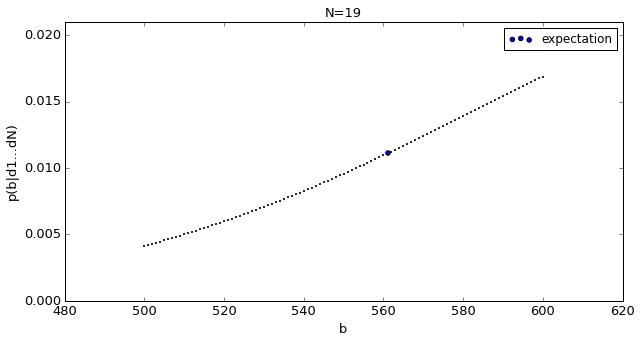

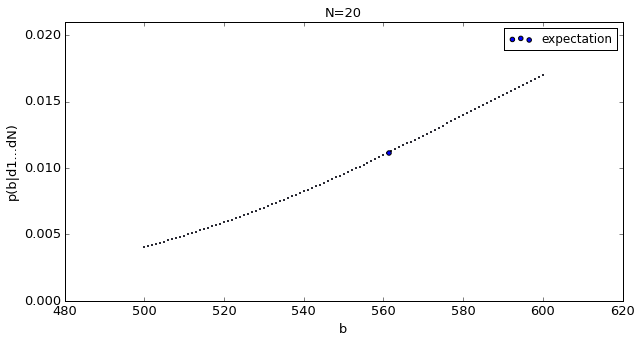

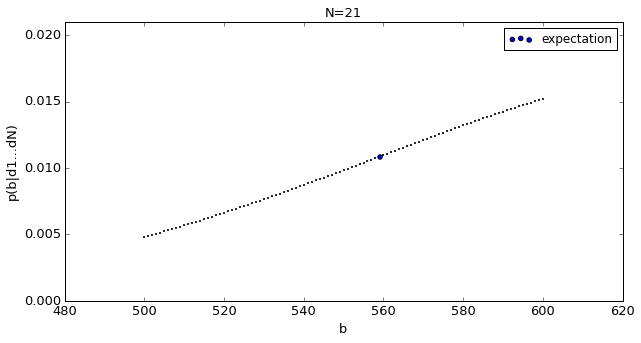

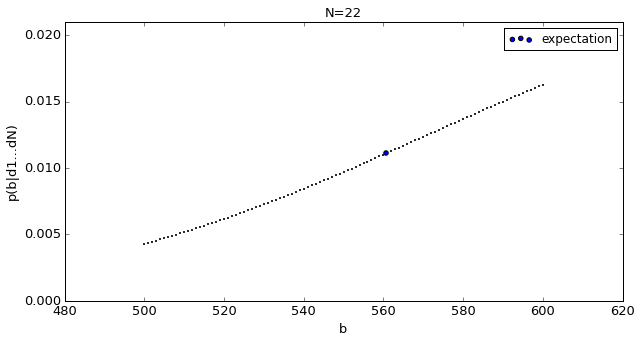

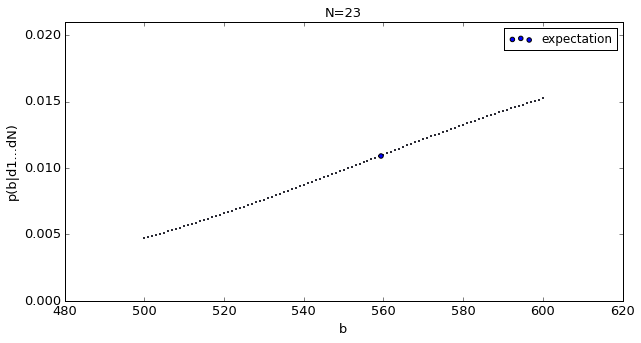

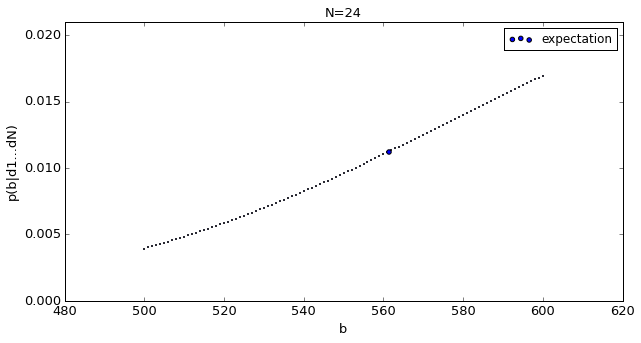

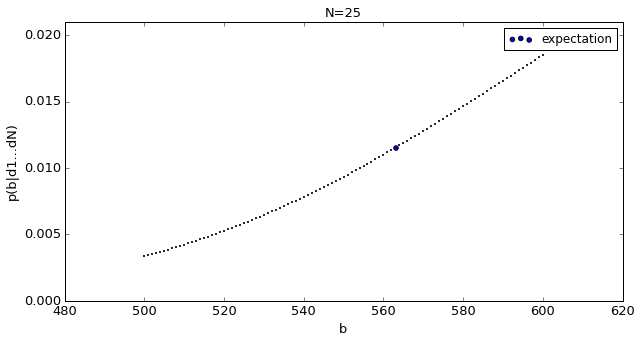

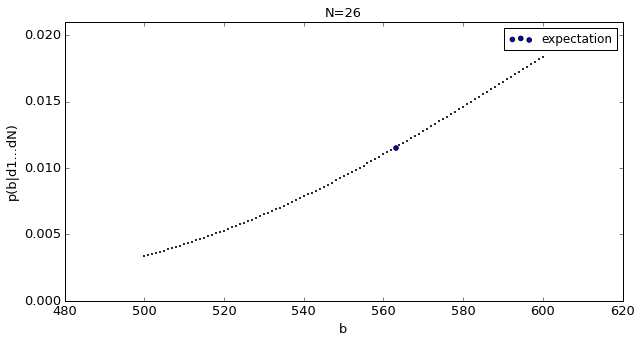

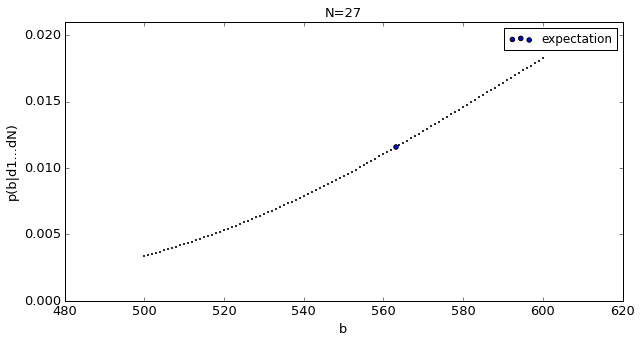

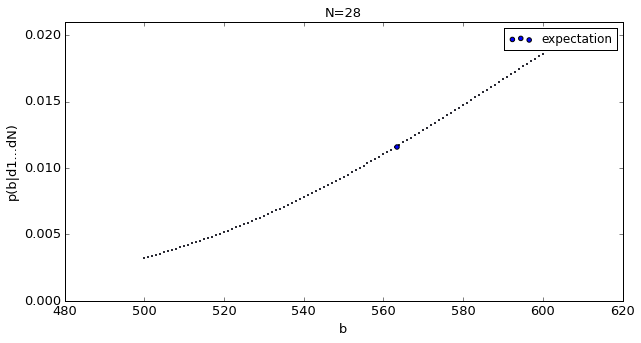

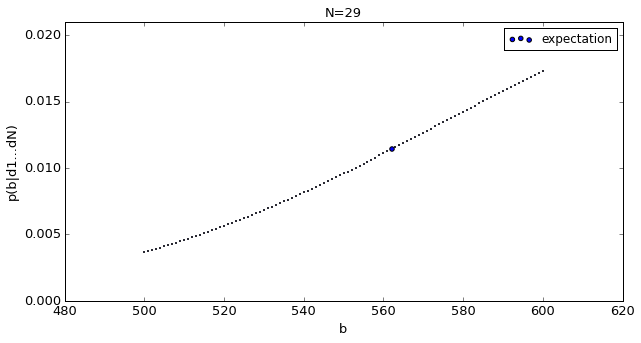

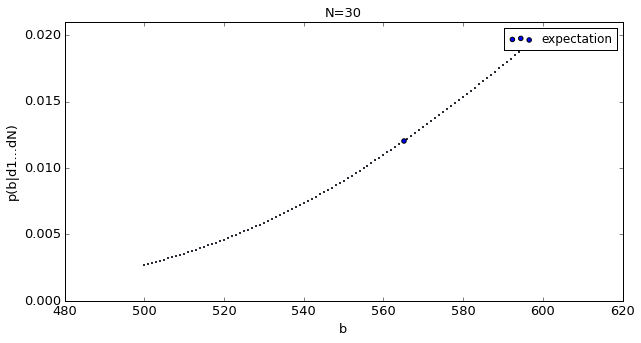

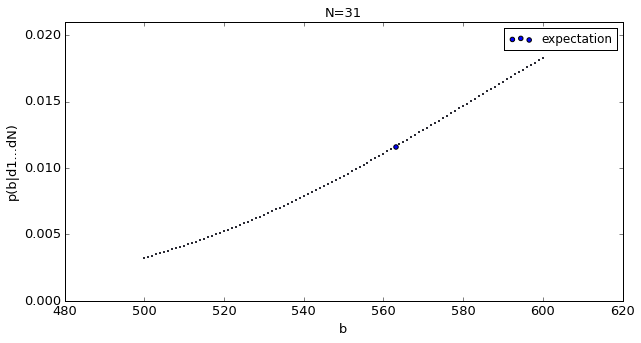

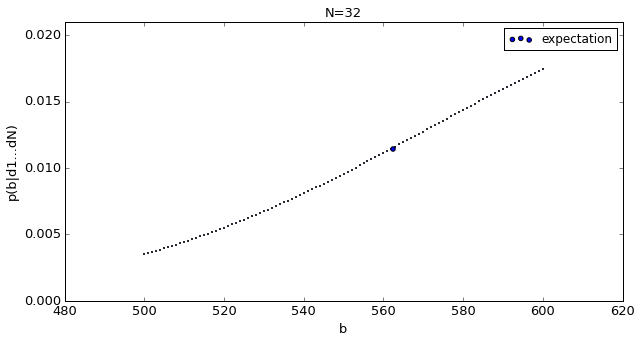

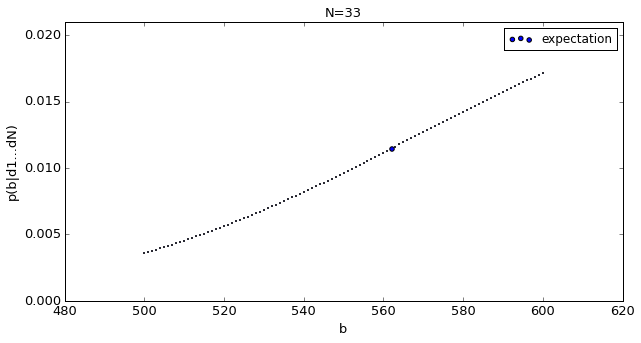

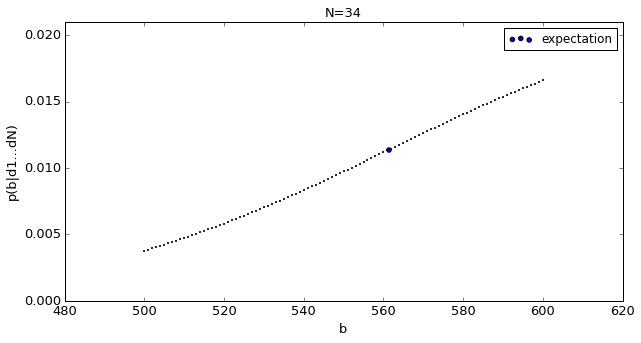

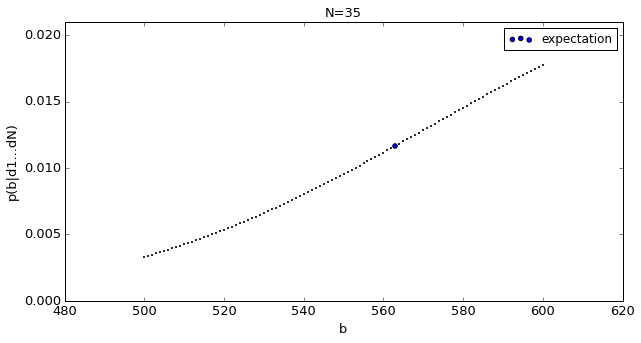

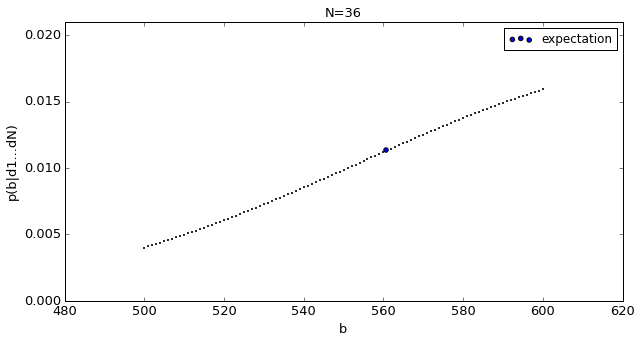

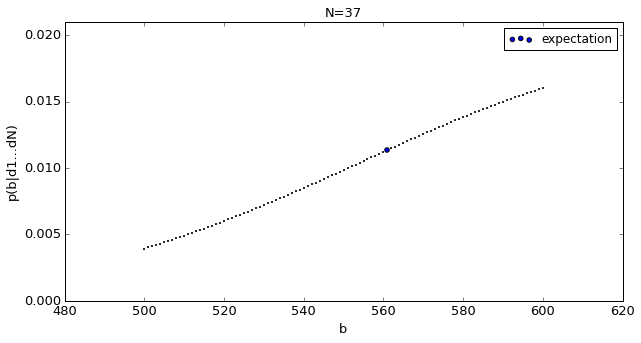

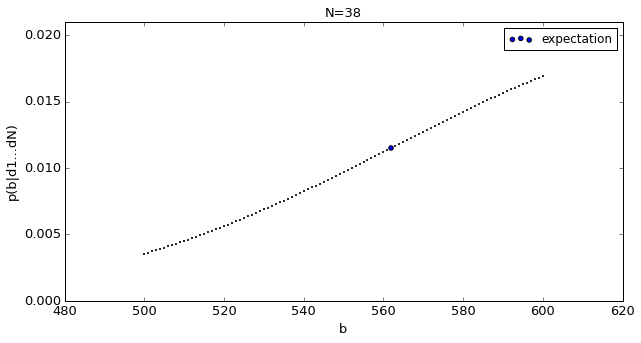

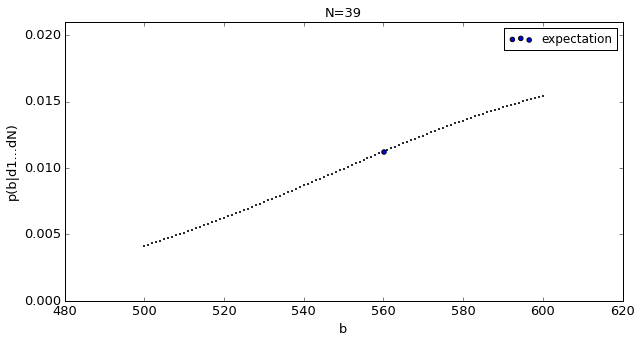

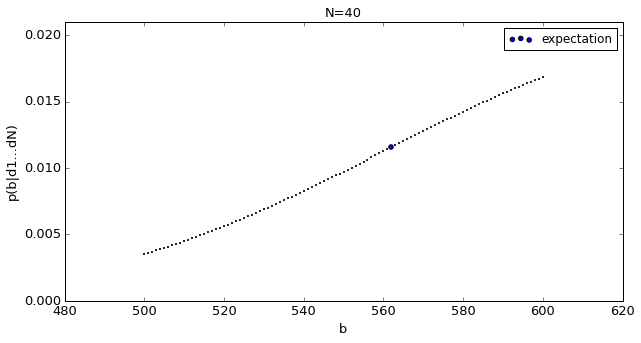

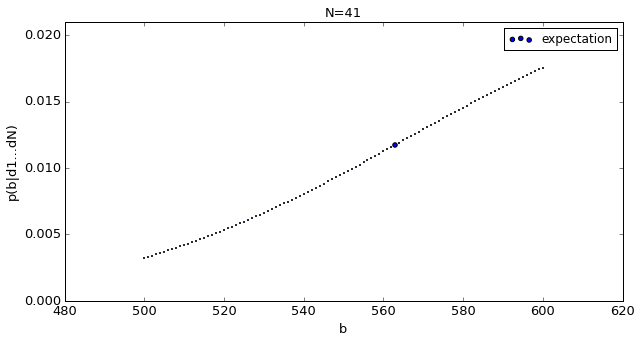

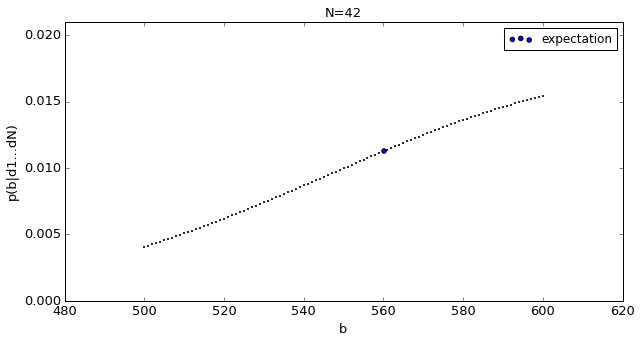

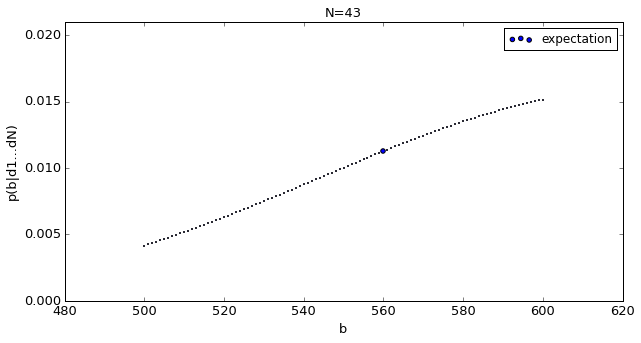

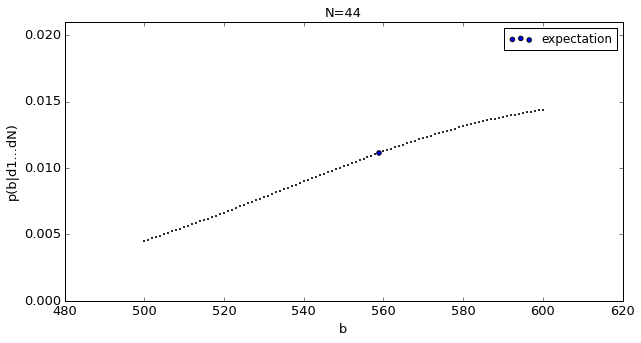

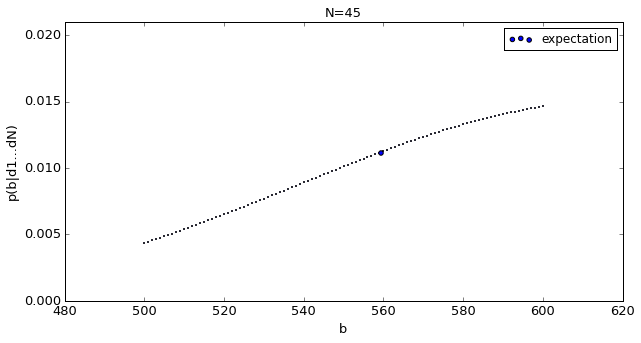

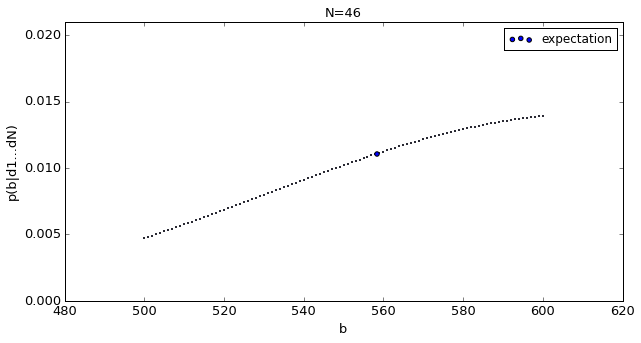

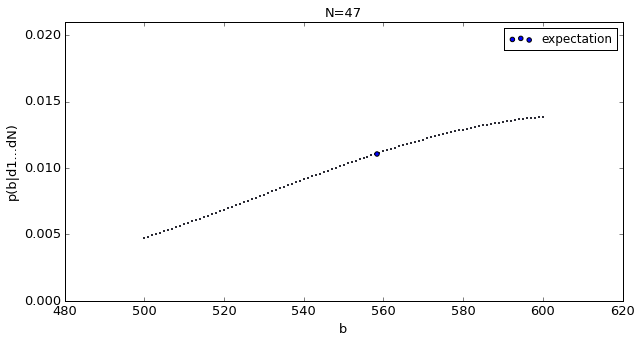

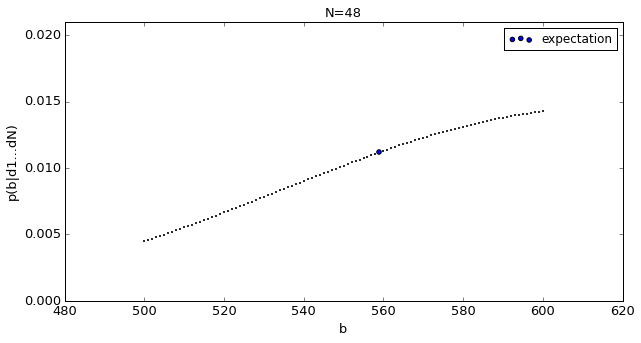

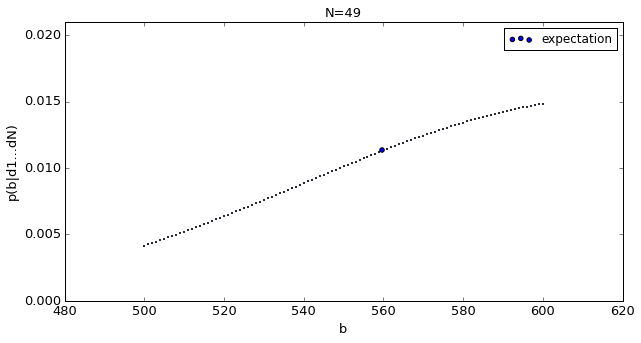

In [17]:
plt.rcParams['figure.figsize'] = 10, 5
i = 0
for p in pb_d[0].T:
    plt.title('N=' + str(i), size=13)
    plt.xlabel('b', size=13)
    plt.ylabel('p(b|d1...dN)', size=13)
    plt.scatter(pb_d[1], p, s=1)
    plt.ylim((0, 0.021))
    plt.tick_params(axis='both', which='major', labelsize=13)
    plt.scatter(expect_b_d_i[i], p[int(round(expect_b_d_i[i])) - params['bmin']], label='expectation')
    plt.legend(loc='best')
    plt.show()
    i += 1

##### 3.1.3. 3.1.1 - 3.1.2 при известном параметре $a$

Пусть $a = E(a)$

In [18]:
p = params

In [19]:
pb_ad = bro.pb_ad(round(expect_a), d, p, 4)

In [20]:
expect_b_ad_i = [bro.expectation('custom', {'p': p, 'x': pb_ad[1]}) for p in pb_ad[0].T]
var_b_ad_i = [bro.variance('custom', {'p': p, 'x': pb_ad[1]}) for p in pb_ad[0].T]

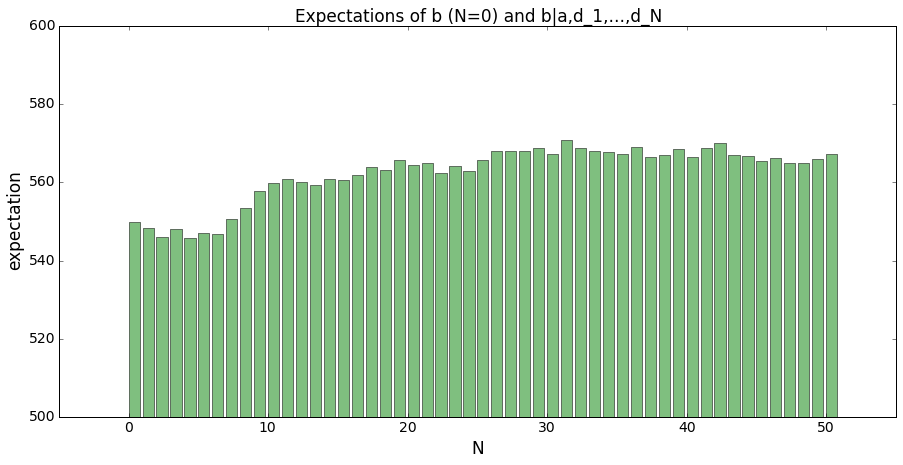

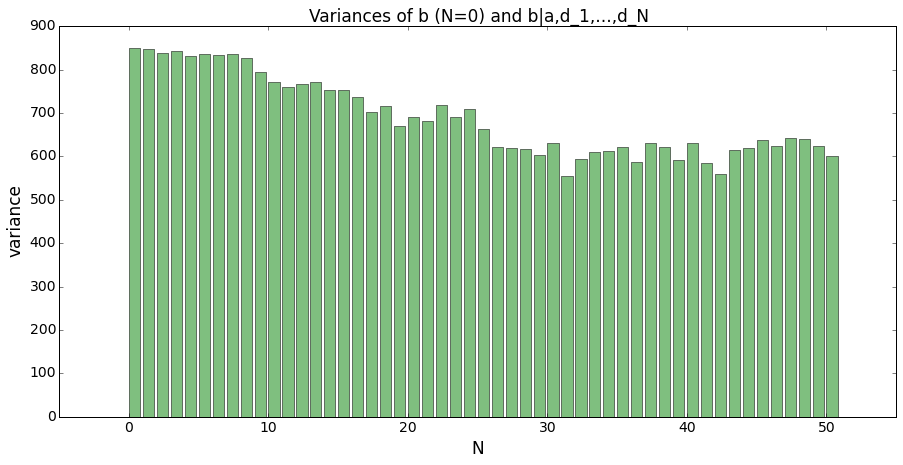

In [21]:
p = params
plt.rcParams['figure.figsize'] = 15, 7

plt.title('Expectations of b (N=0) and b|a,d_1,...,d_N', size=17)
plt.ylabel('expectation', size=17)
plt.xlabel('N', size=17)
plt.ylim((p['bmin'], p['bmax']))
plt.xlim((-5, 55))
plt.tick_params(axis='both', which='major', labelsize=14)
plt.bar(range(p['N'] + 1), [expect_b] + expect_b_ad_i, color='g', alpha=0.5)
plt.show()

plt.title('Variances of b (N=0) and b|a,d_1,...,d_N', size=17)
plt.ylabel('variance', size=17)
plt.xlabel('N', size=17)
plt.xlim((-5, 55))
plt.tick_params(axis='both', which='major', labelsize=14)
plt.bar(range(p['N'] + 1), [var_b] + var_b_ad_i, color='g', alpha=0.5)
plt.show()

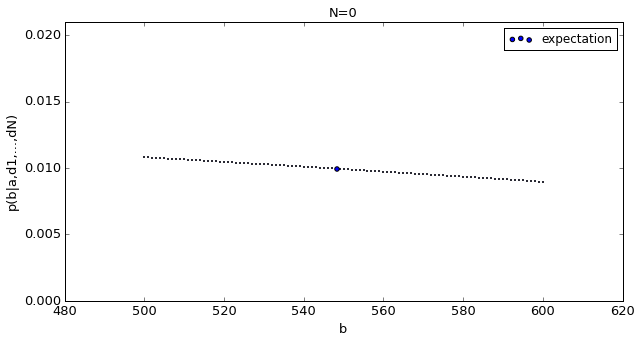

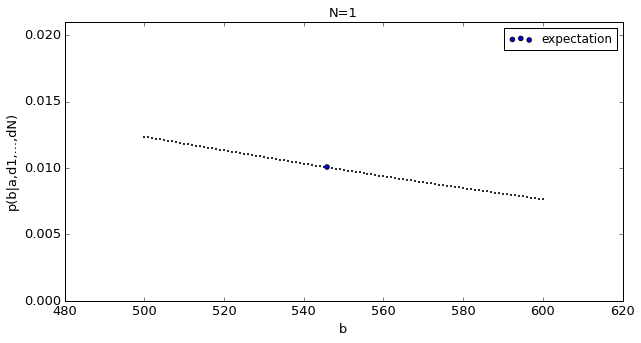

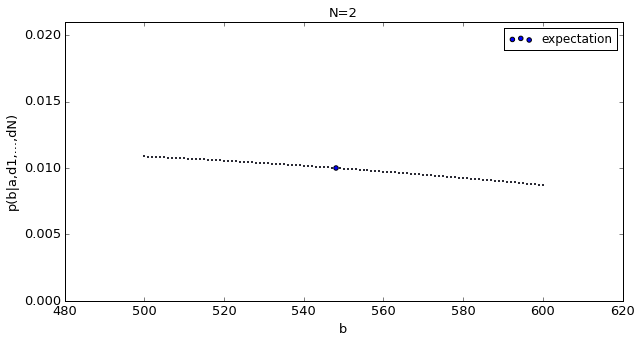

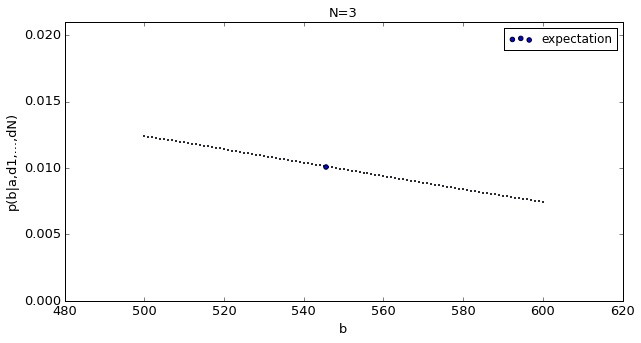

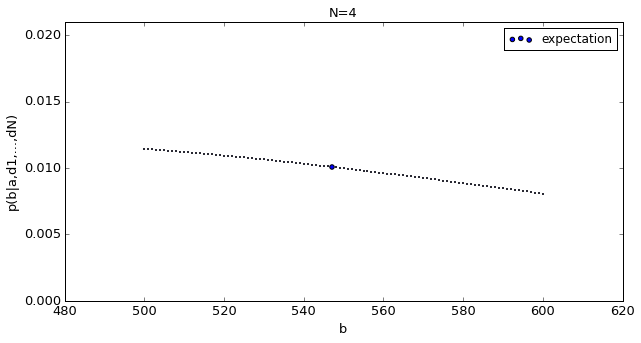

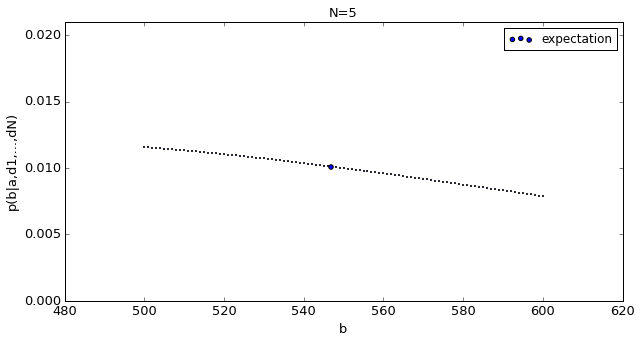

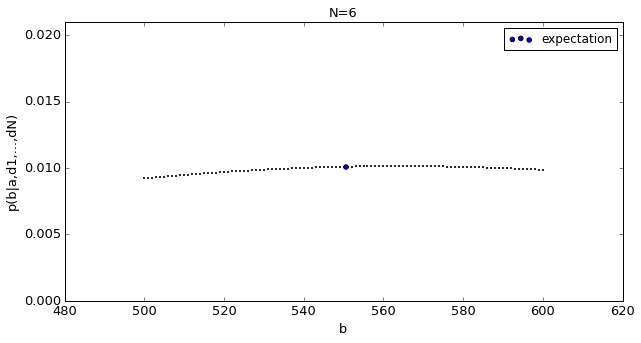

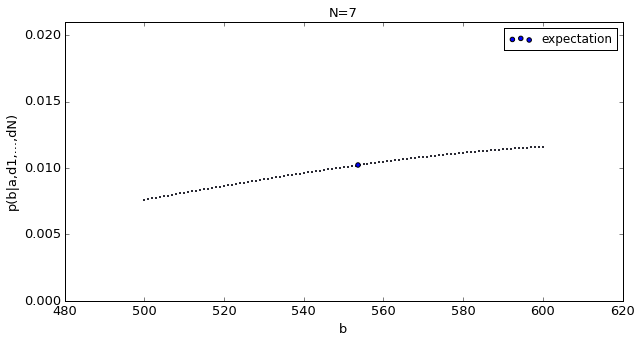

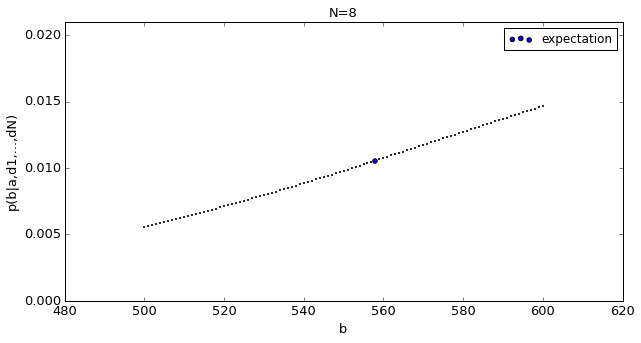

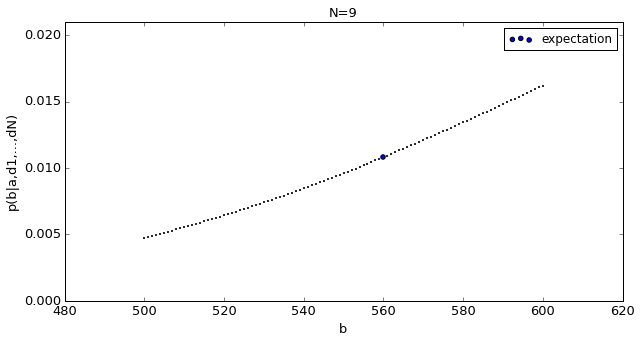

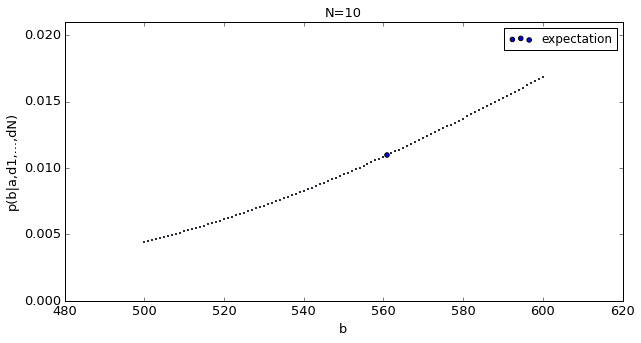

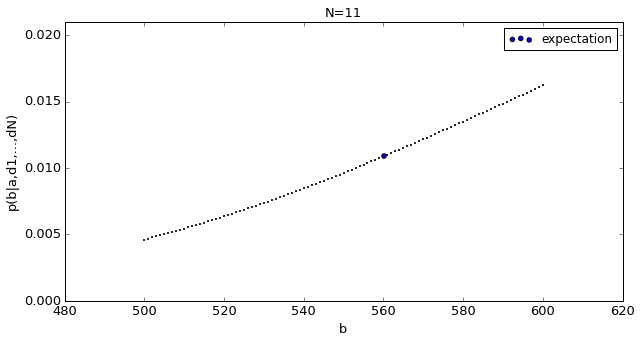

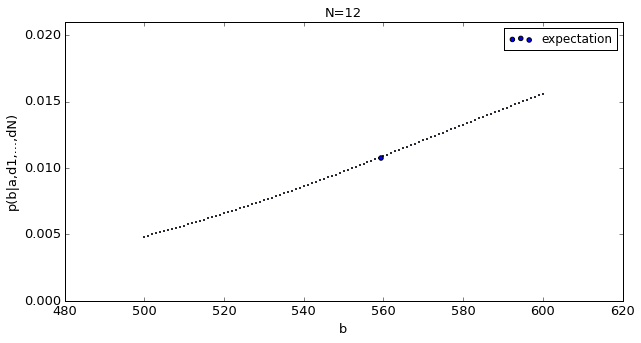

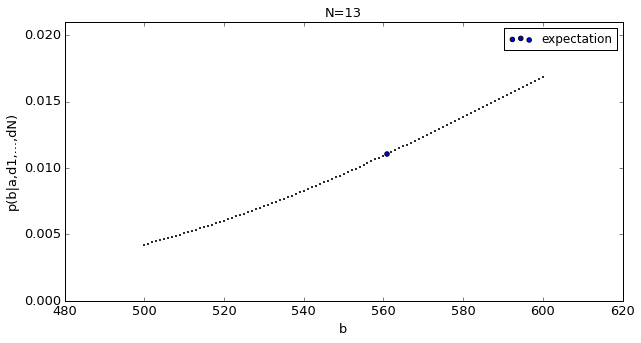

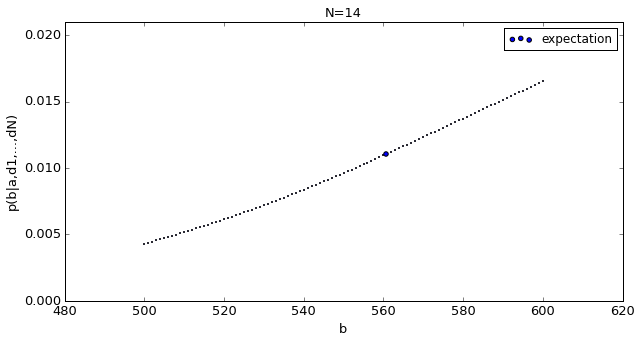

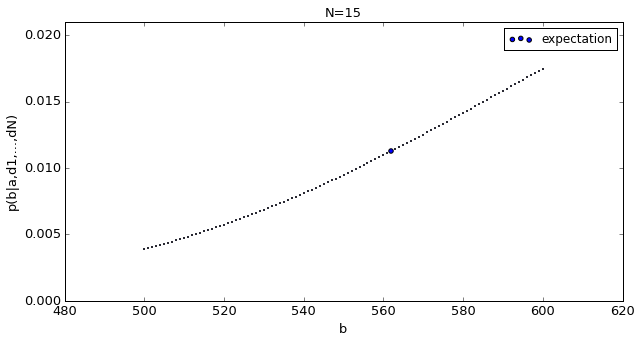

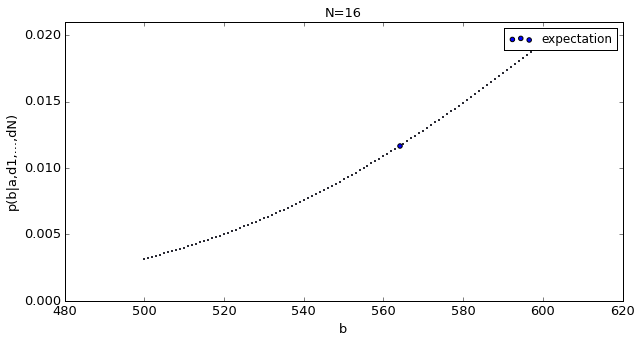

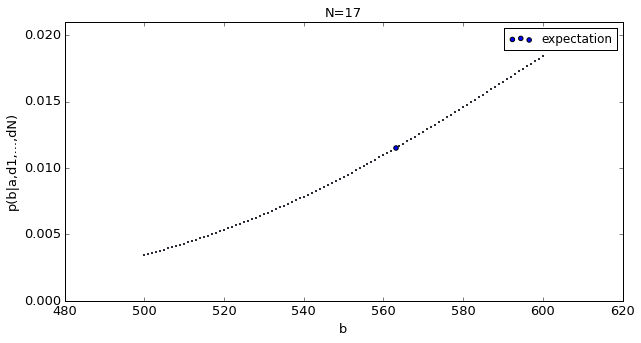

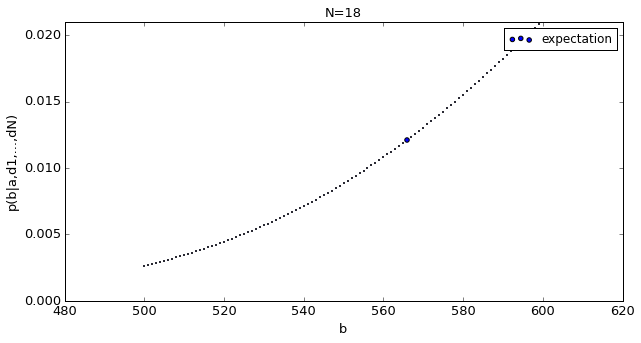

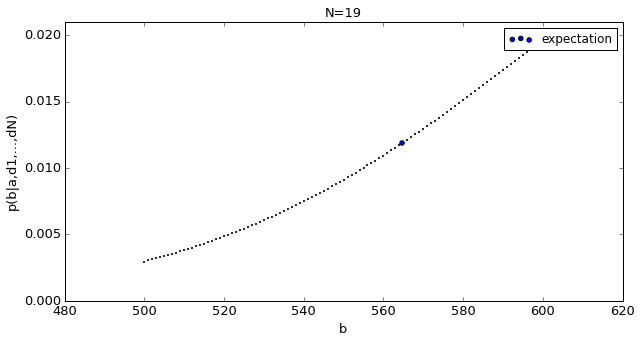

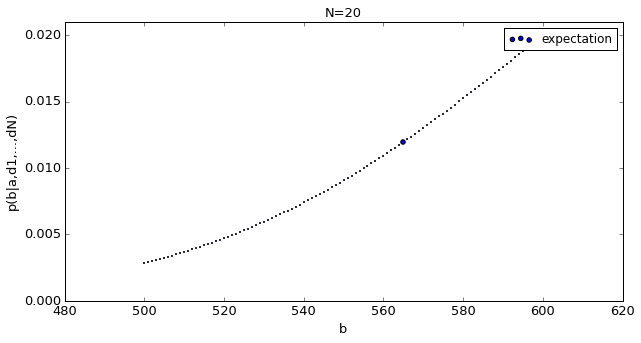

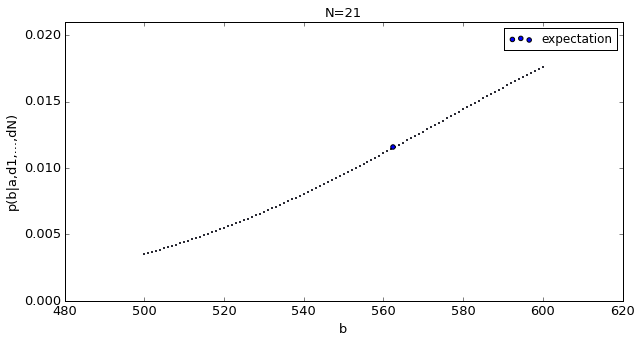

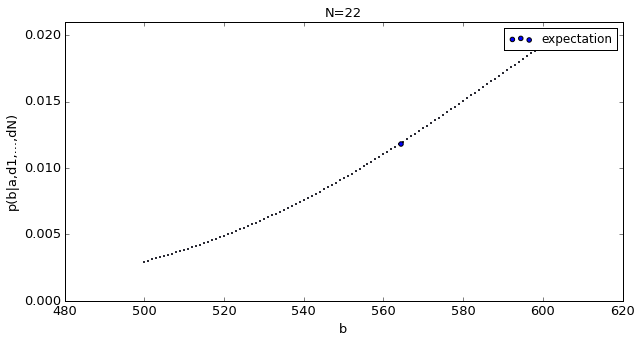

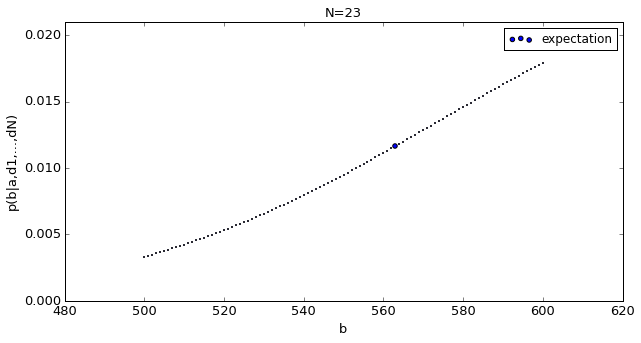

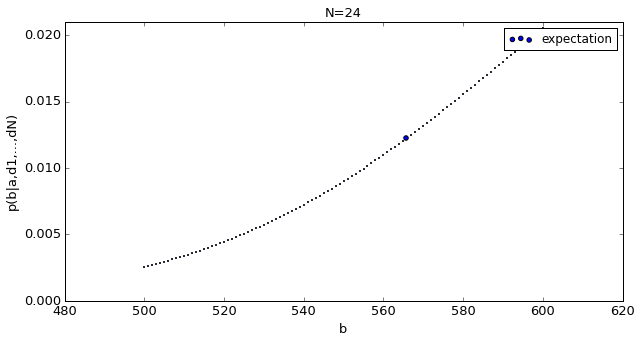

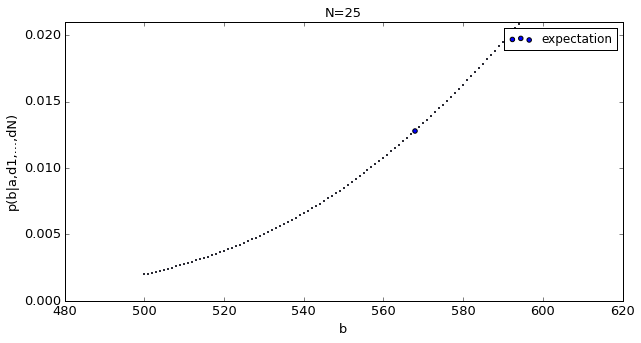

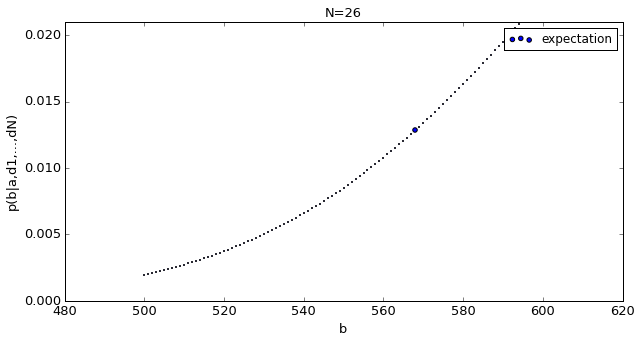

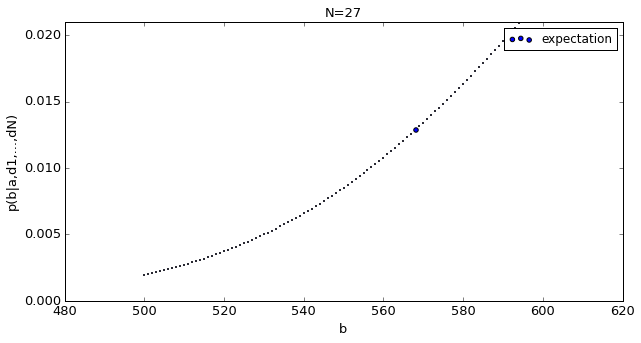

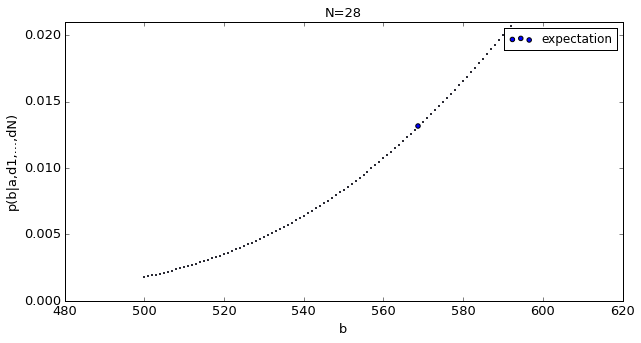

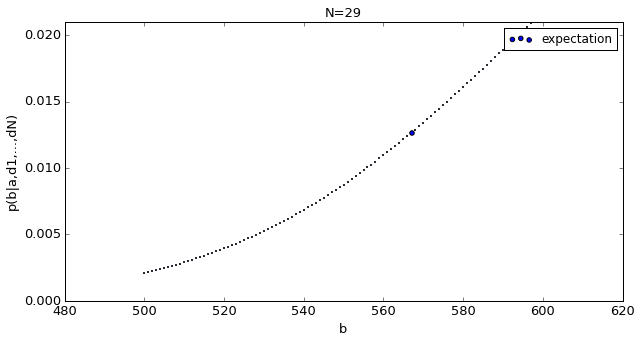

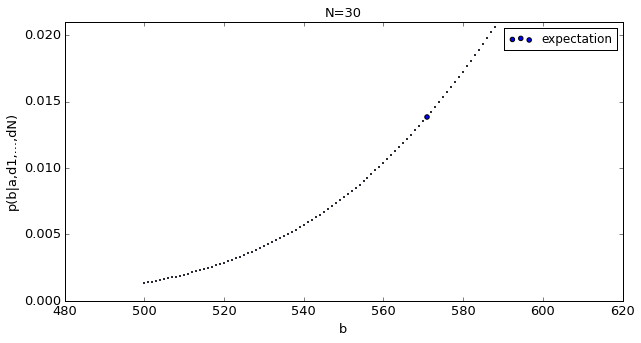

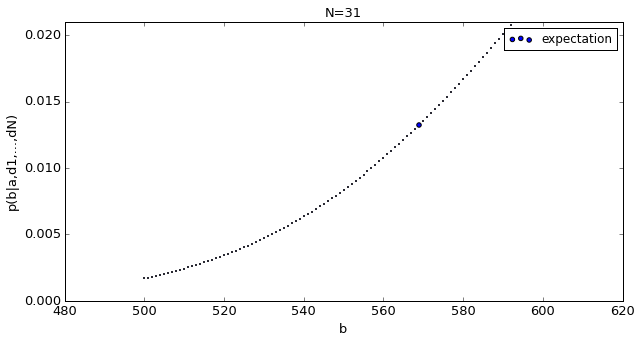

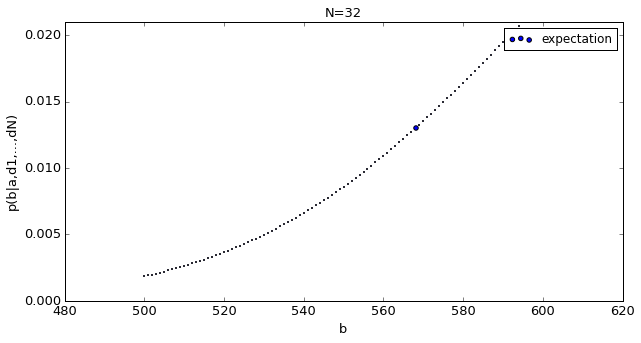

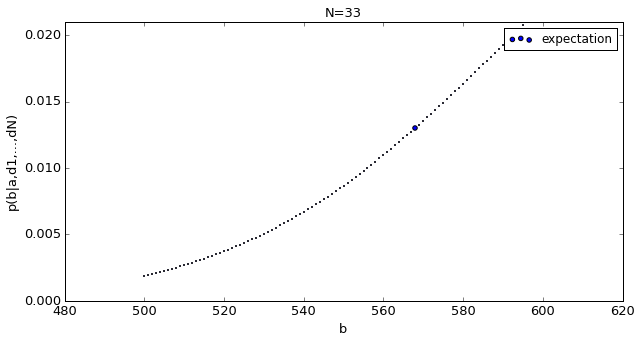

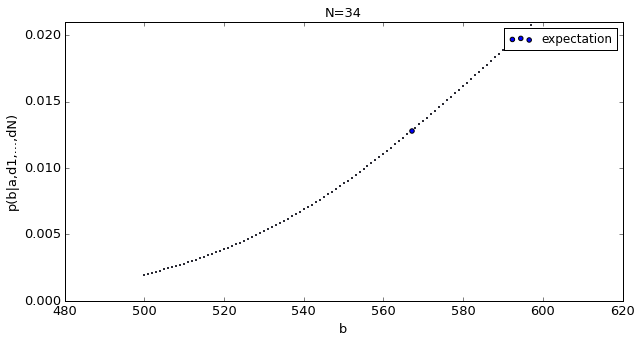

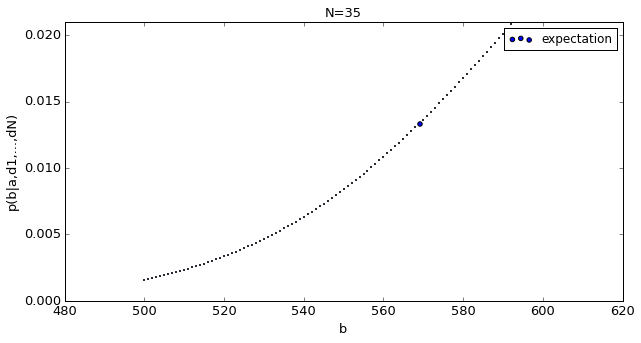

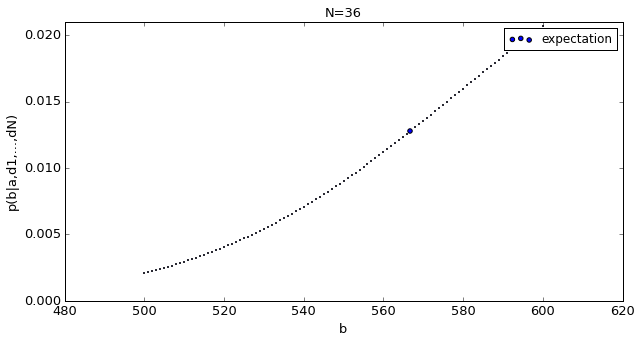

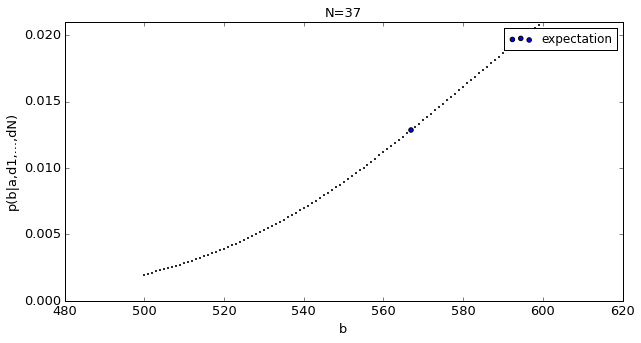

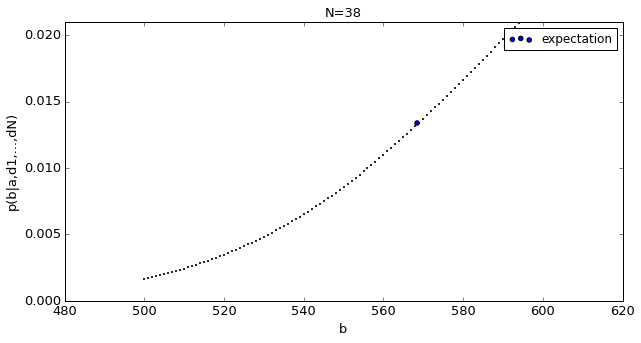

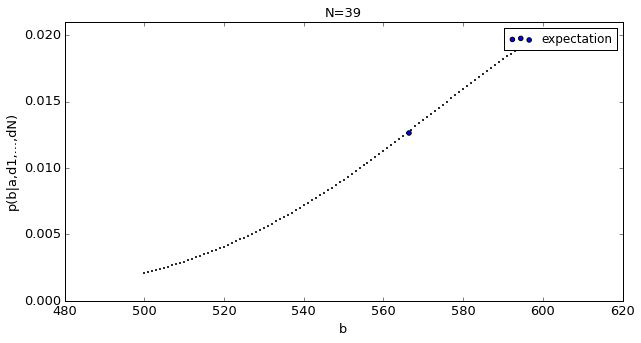

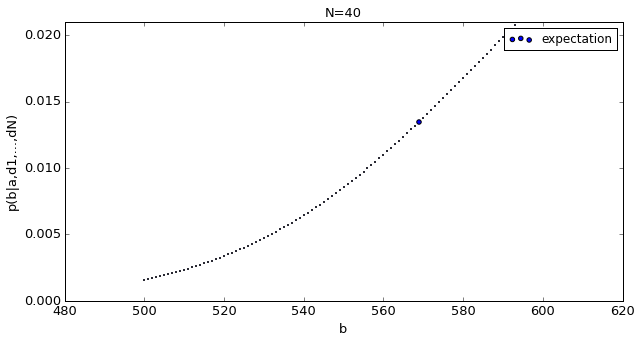

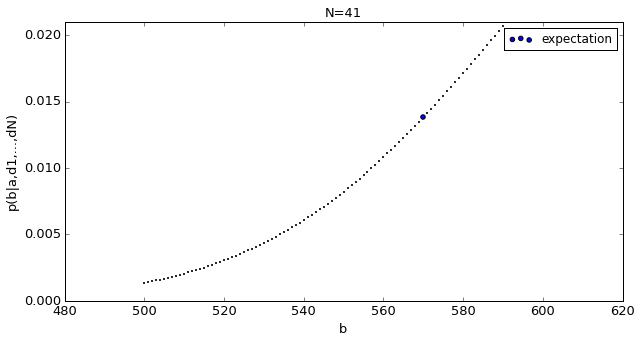

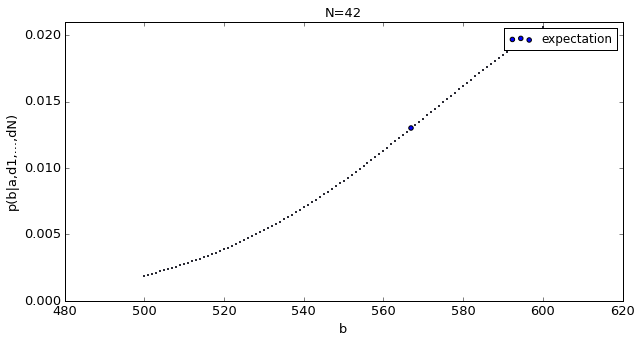

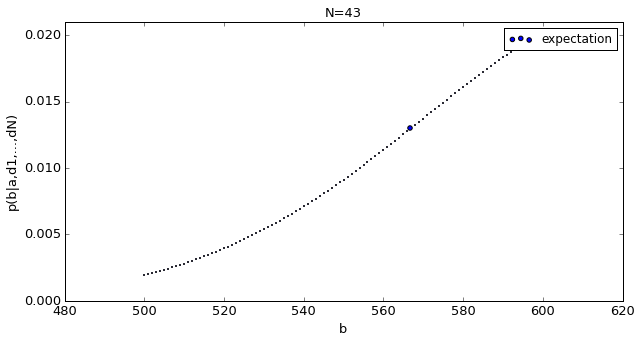

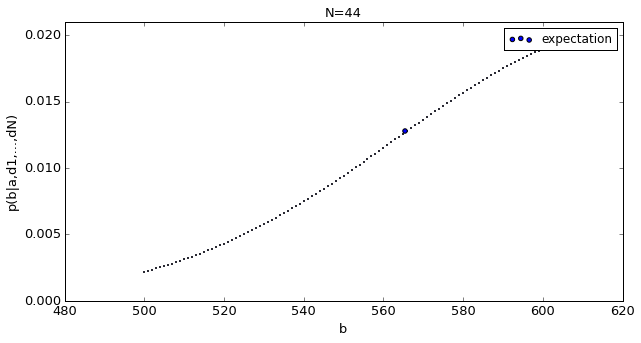

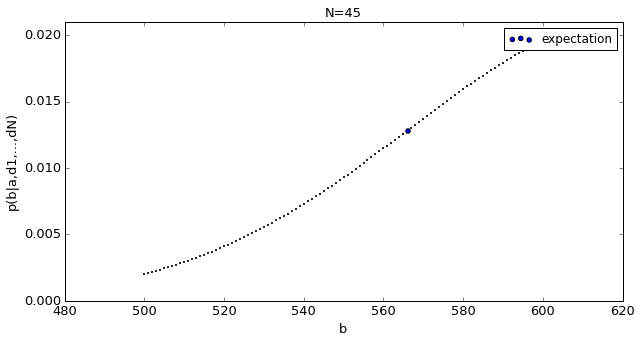

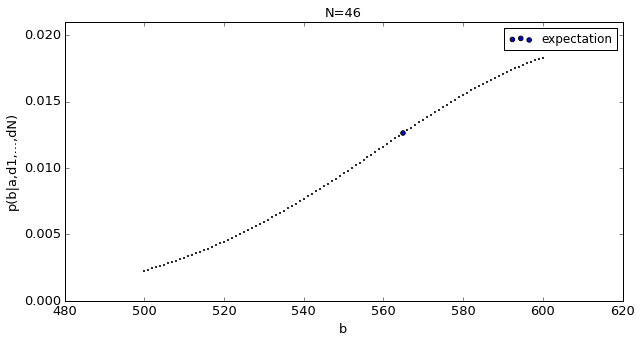

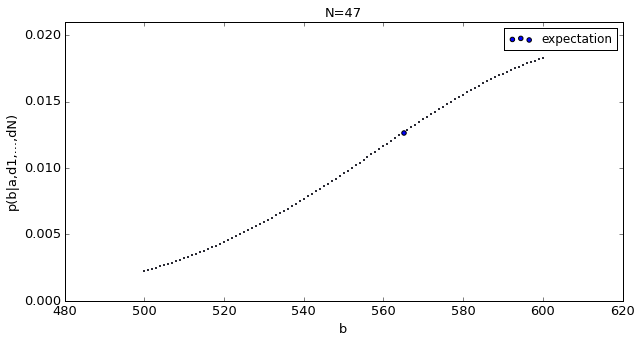

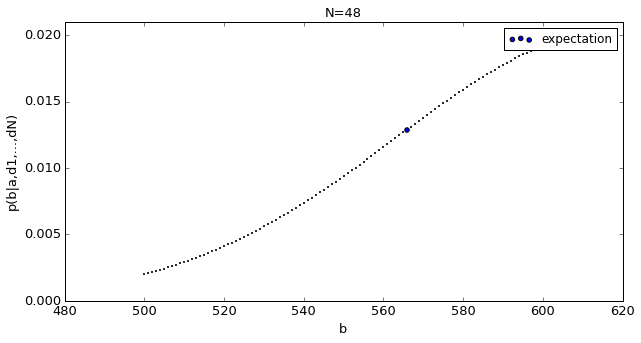

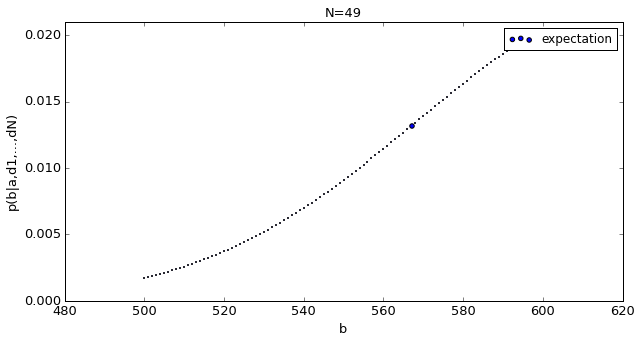

In [22]:
plt.rcParams['figure.figsize'] = 10, 5
i = 0
for p in pb_ad[0].T:
    plt.title('N=' + str(i), size=13)
    plt.xlabel('b', size=13)
    plt.ylabel('p(b|a,d1,...,dN)', size=13)
    plt.scatter(pb_ad[1], p, s=1)
    plt.tick_params(axis='both', which='major', labelsize=13)
    plt.ylim((0, 0.021))
    plt.scatter(expect_b_ad_i[i], p[int(round(expect_b_ad_i[i])) - params['bmin']], label='expectation')
    plt.legend(loc='best')
    plt.show()
    i += 1

##### 3.1.4. Сравнение $p(b|d_1,...,d_N), p(b|a,d_1,...,d_N)$

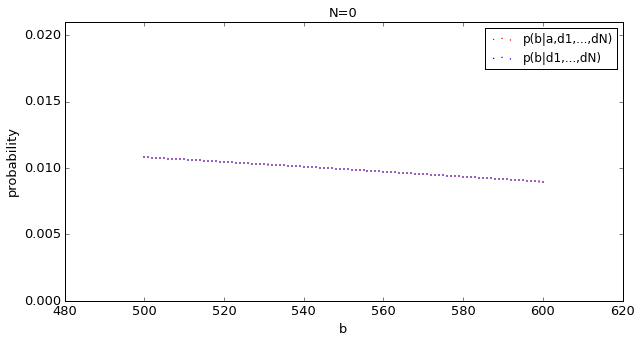

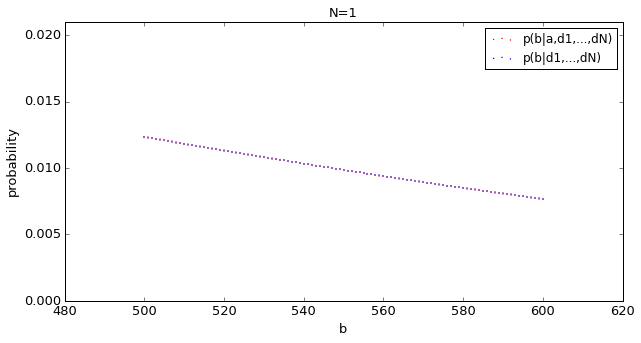

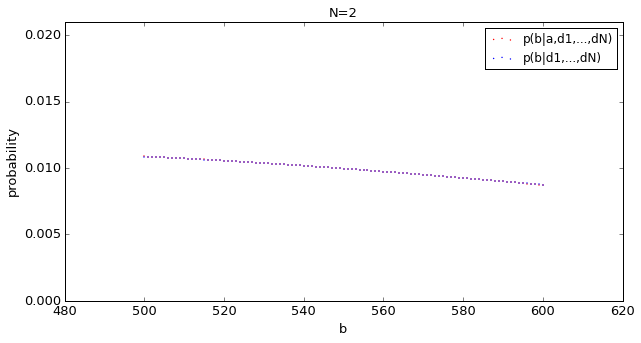

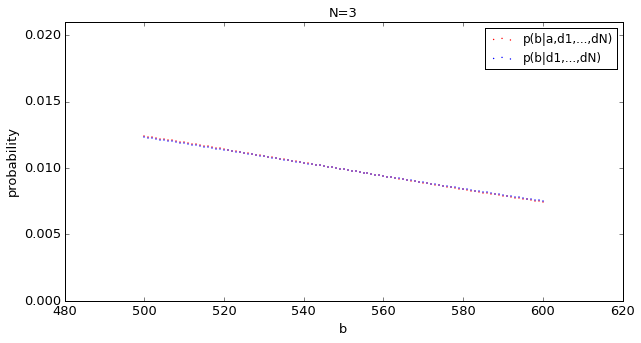

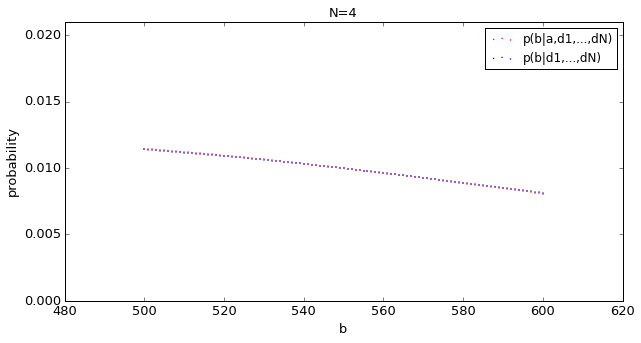

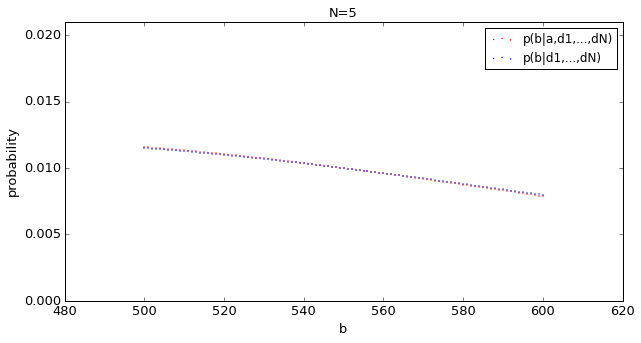

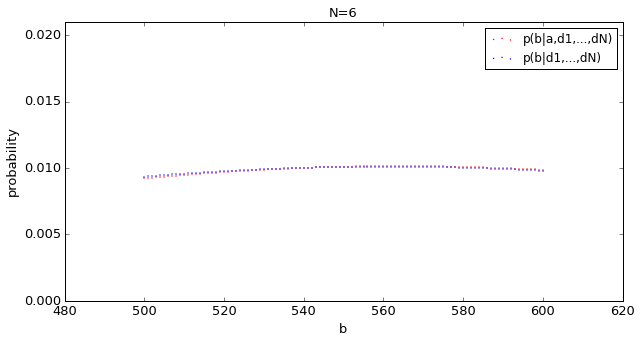

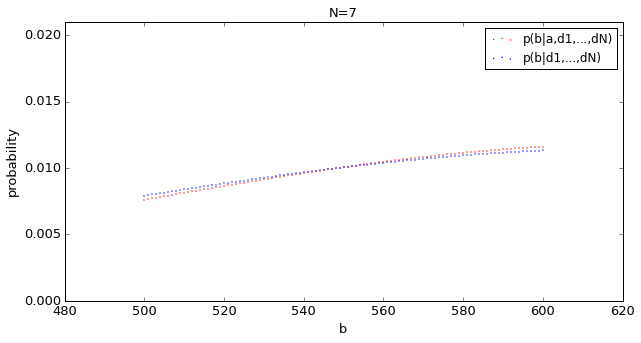

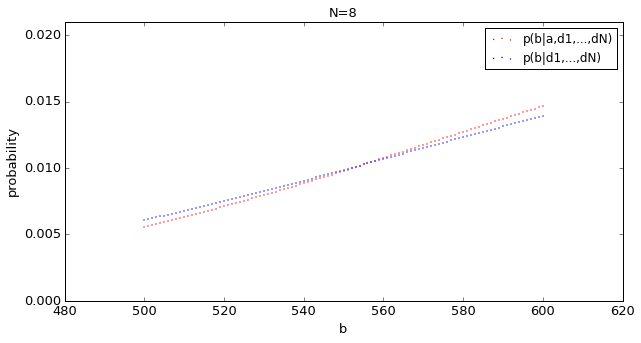

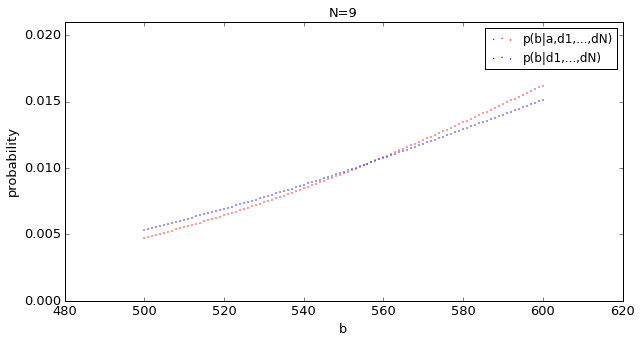

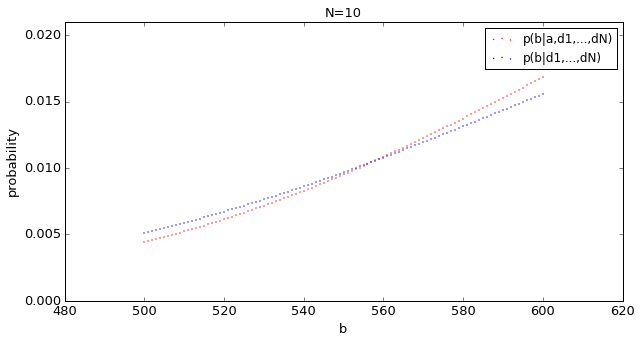

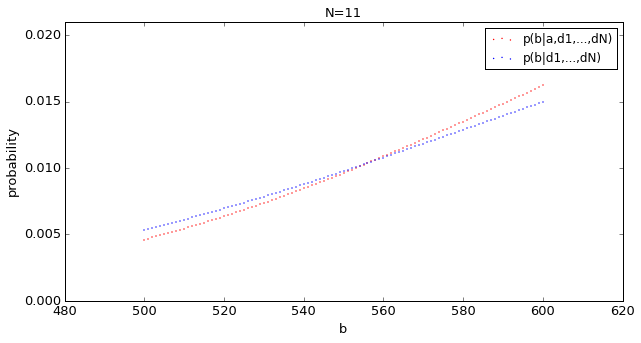

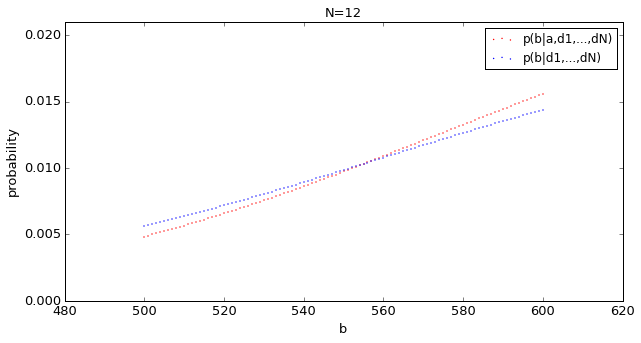

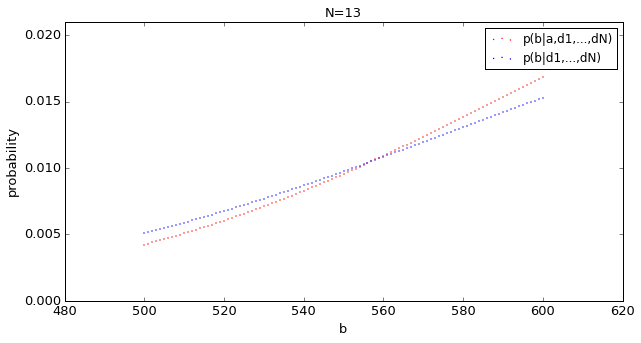

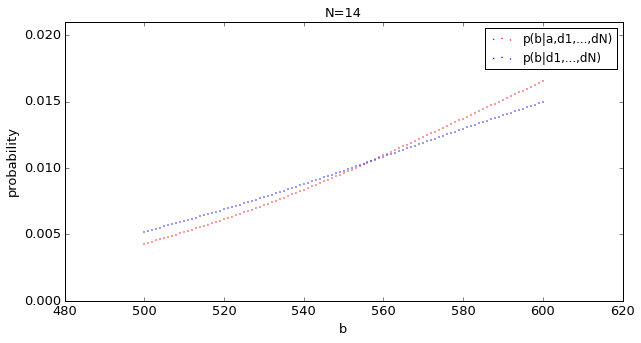

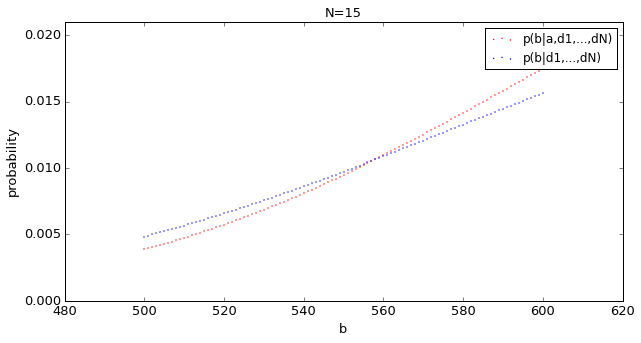

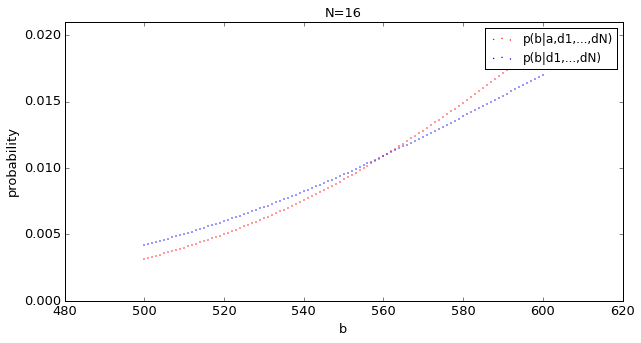

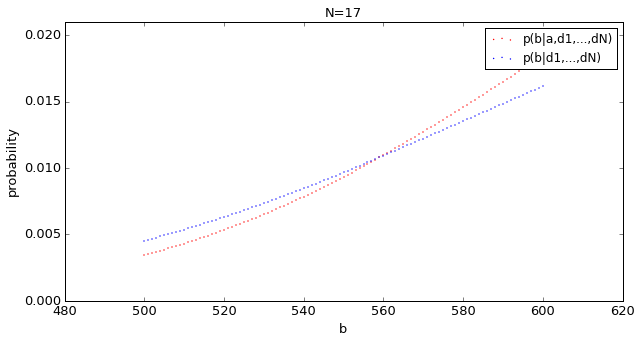

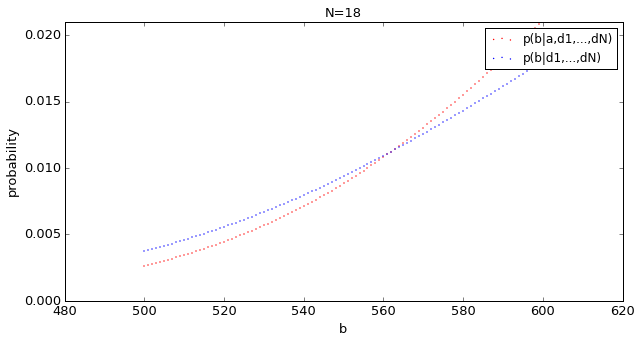

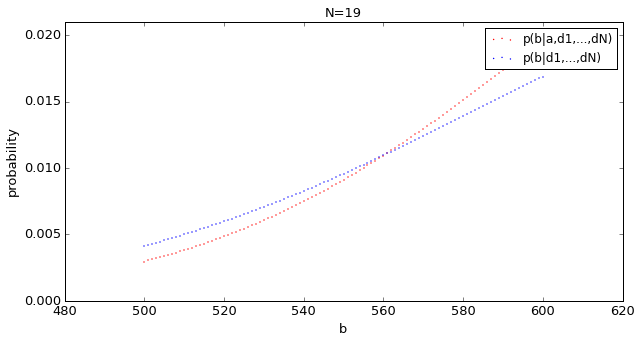

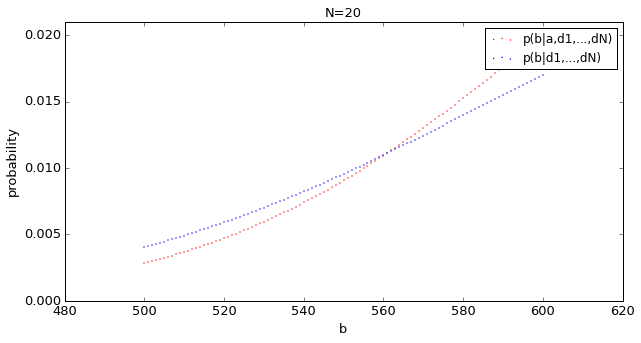

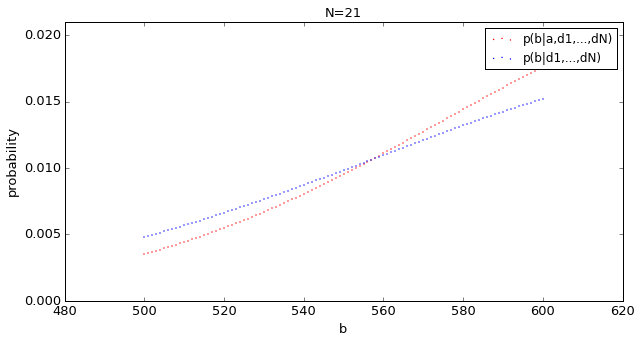

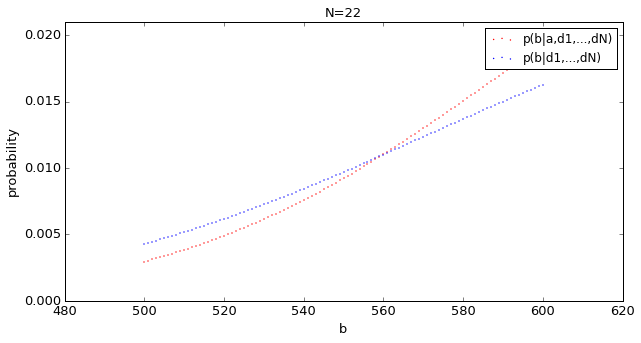

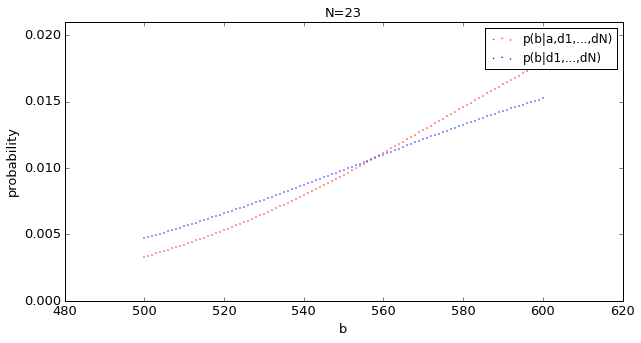

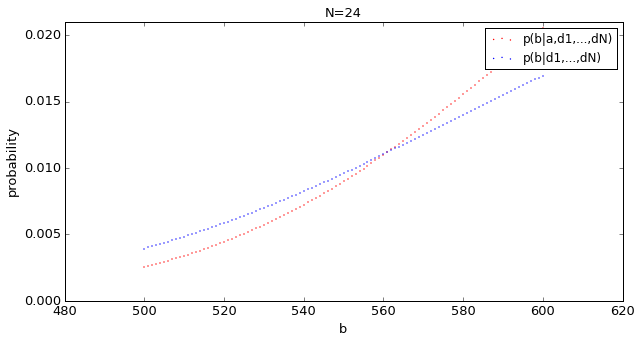

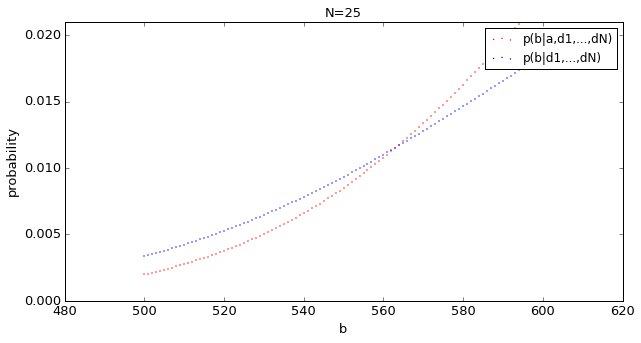

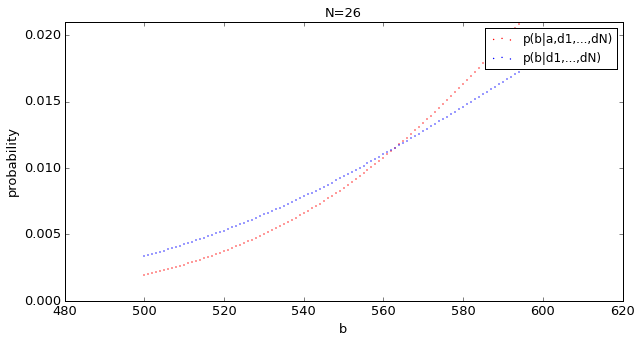

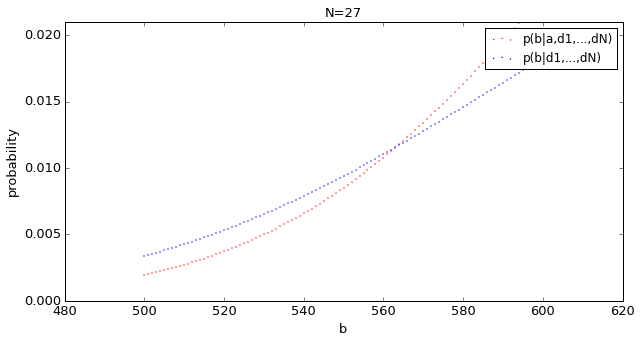

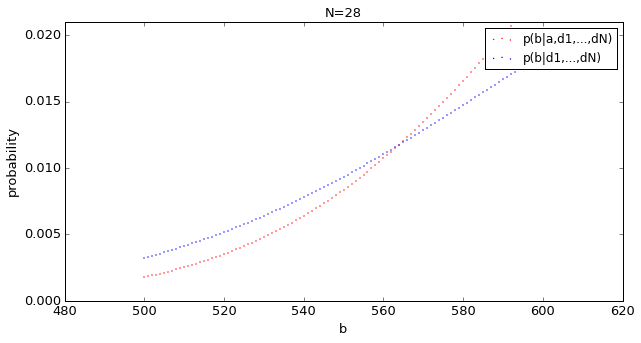

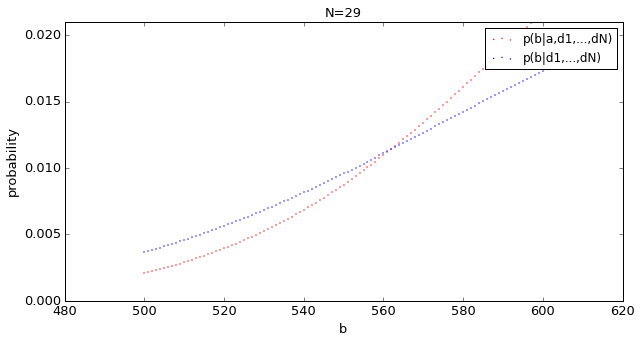

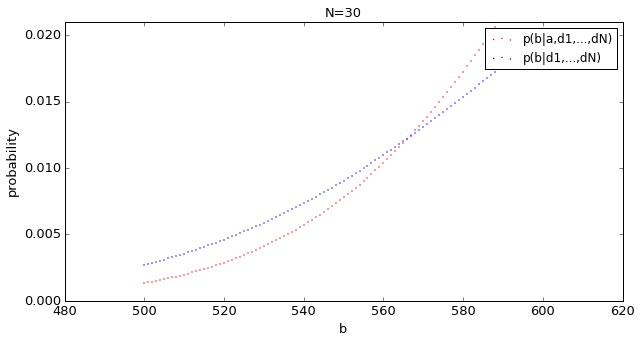

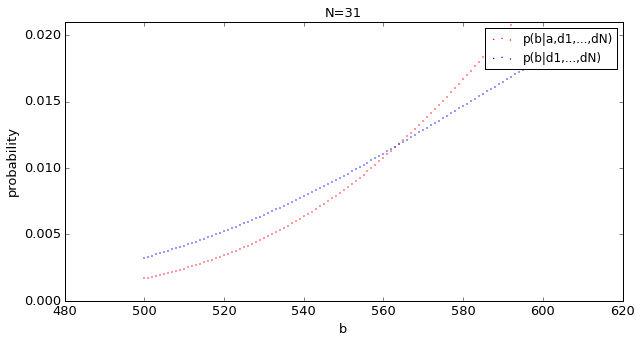

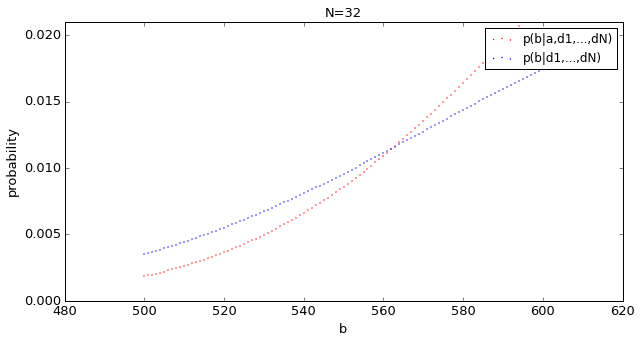

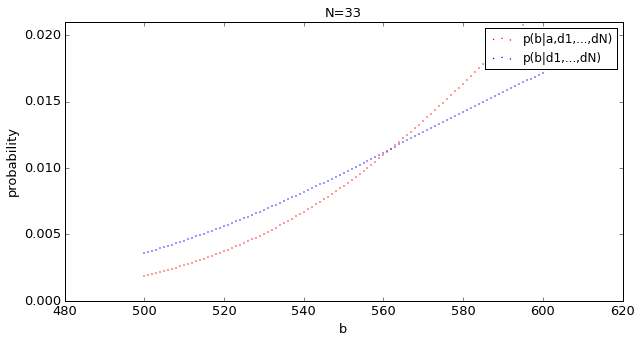

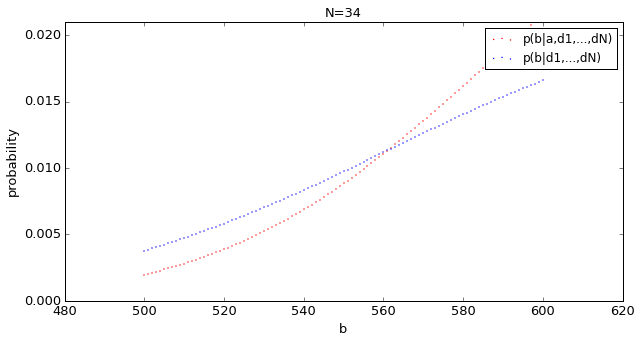

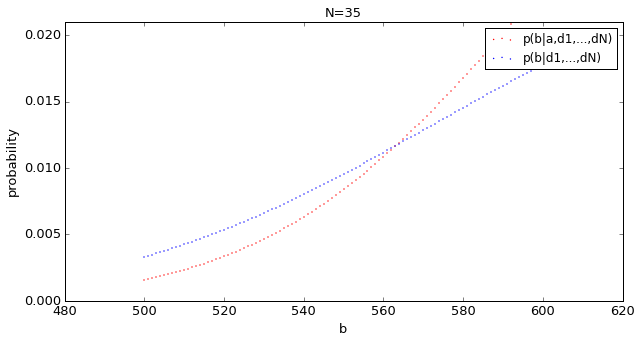

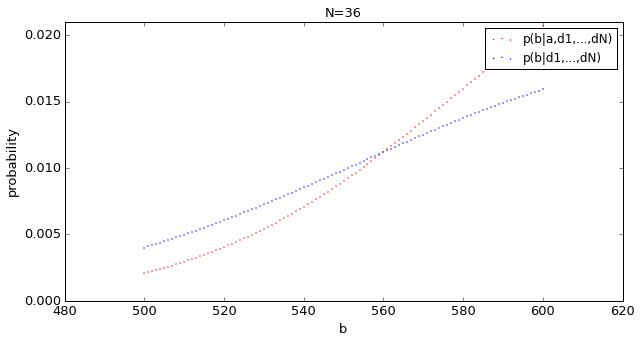

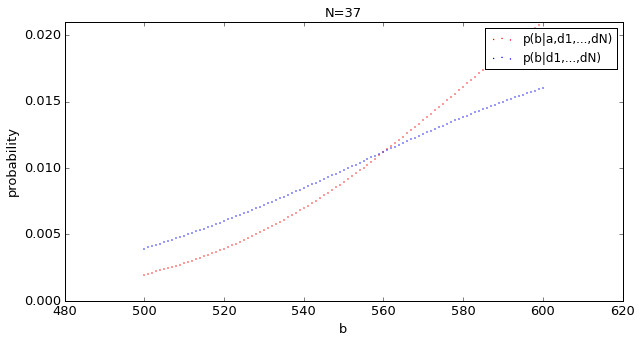

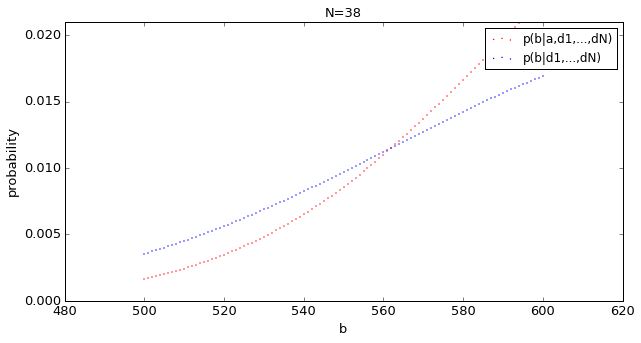

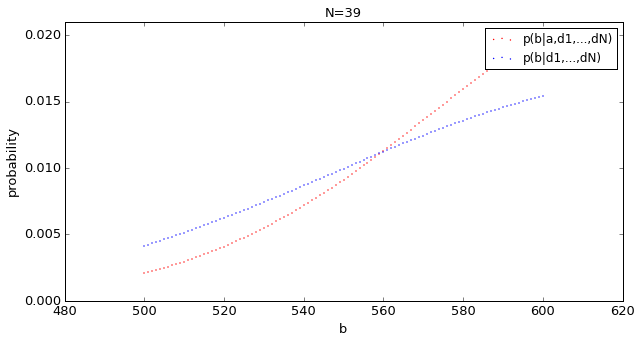

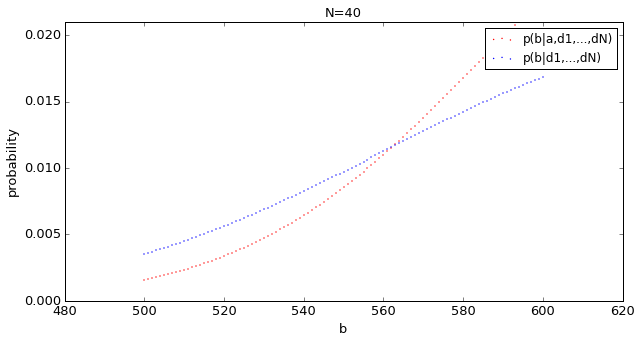

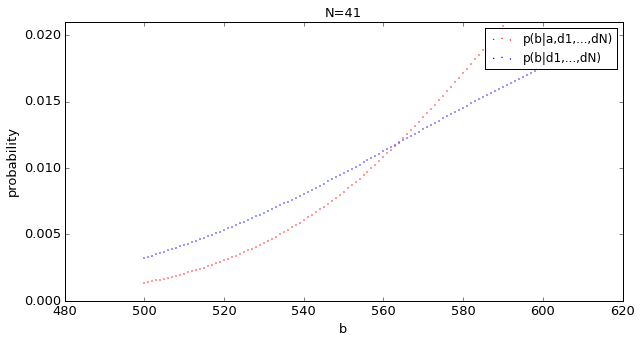

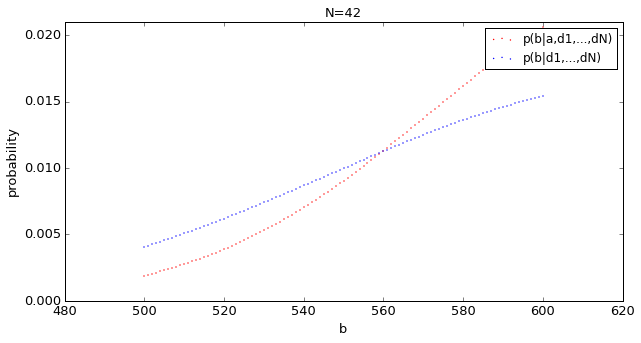

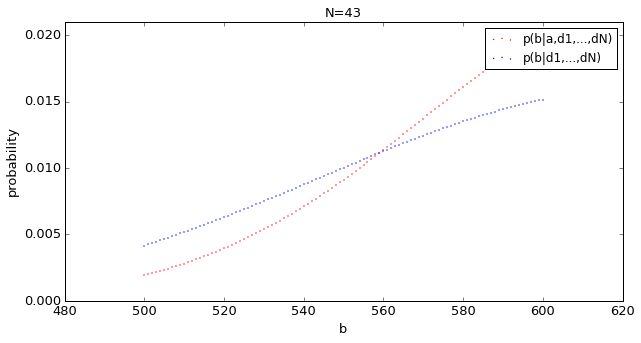

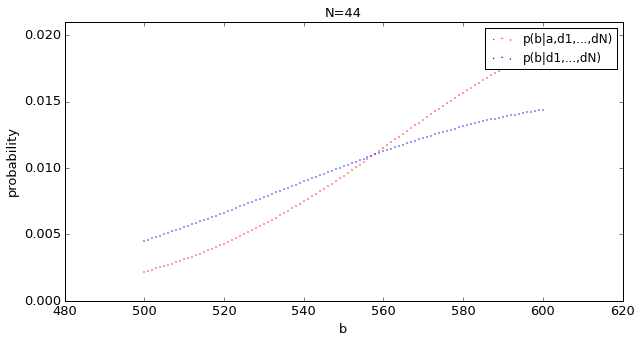

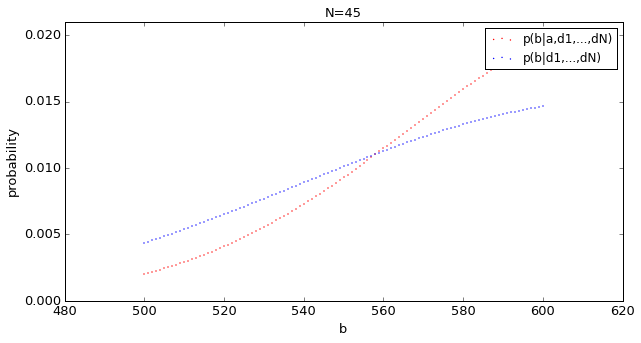

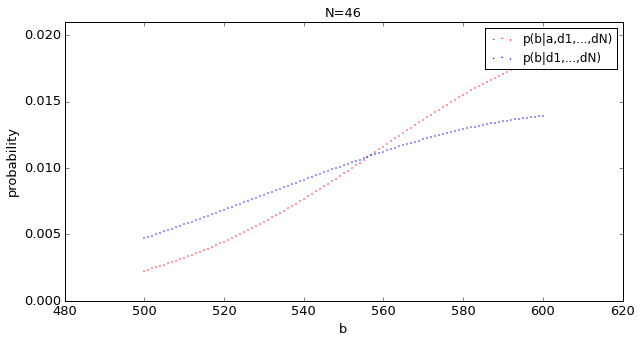

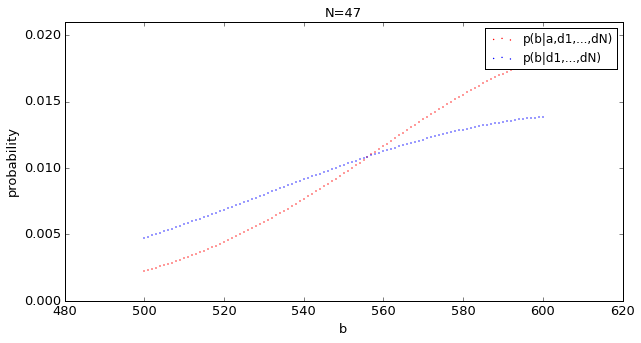

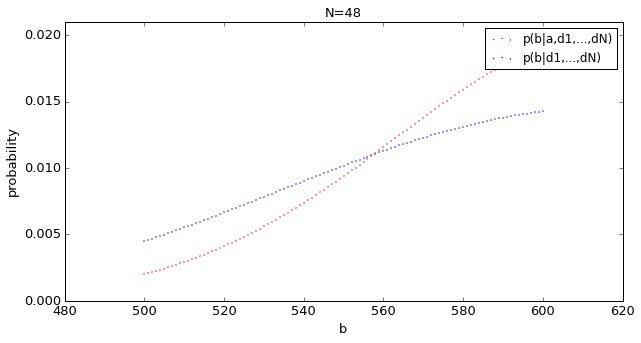

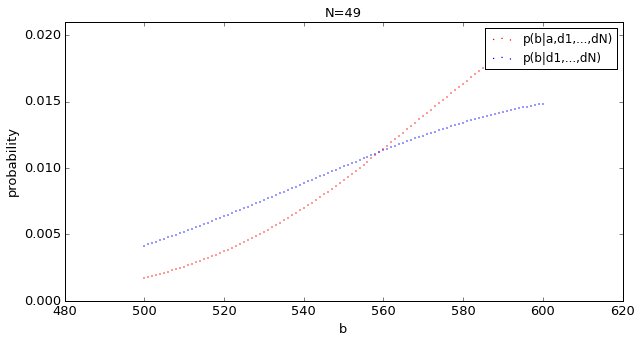

In [23]:
plt.rcParams['figure.figsize'] = 10, 5
i = 0
for i in range(pb_ad[0].shape[1]):
    plt.title('N=' + str(i), size=13)
    plt.xlabel('b', size=13)
    plt.ylabel('probability', size=13)
    plt.tick_params(axis='both', which='major', labelsize=13)
    plt.ylim((0, 0.021))
    plt.scatter(pb_ad[1], pb_ad[0].T[i], s=2, linewidths=0, c='r', label='p(b|a,d1,...,dN)')
    plt.scatter(pb_d[1], pb_d[0].T[i], s=2, linewidths=0, label='p(b|d1,...,dN)')
    plt.legend(loc='best')
    plt.show()
    i += 1

### 3.2. $d_1 = ... = d_N = E(d_N)$

In [24]:
d = np.array([int(round(expect_d_n)) for i in range(params['N'])])
pb_d = bro.pb_d(d, params, 4)

##### 3.2.1. Мат. ожидания и дисперсии

In [25]:
p = params

In [26]:
expect_b_d_i = [bro.expectation('custom', {'p': p, 'x': pb_d[1]}) for p in pb_d[0].T]
var_b_d_i = [bro.variance('custom', {'p': p, 'x': pb_d[1]}) for p in pb_d[0].T]

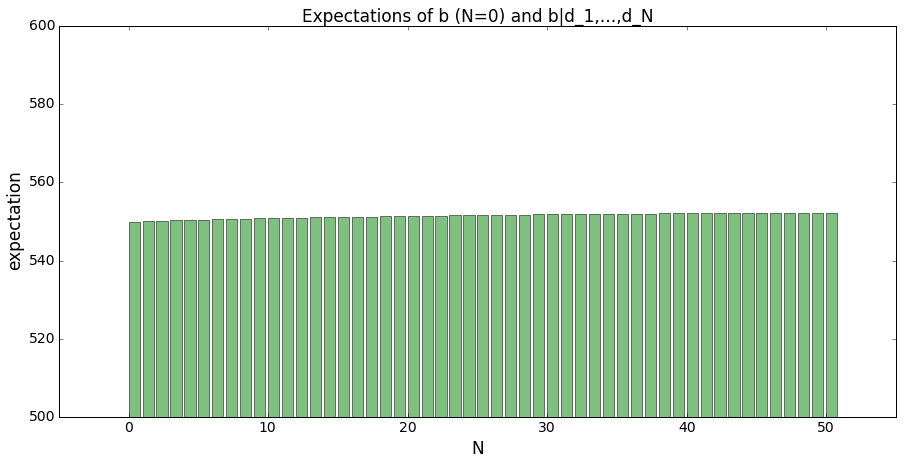

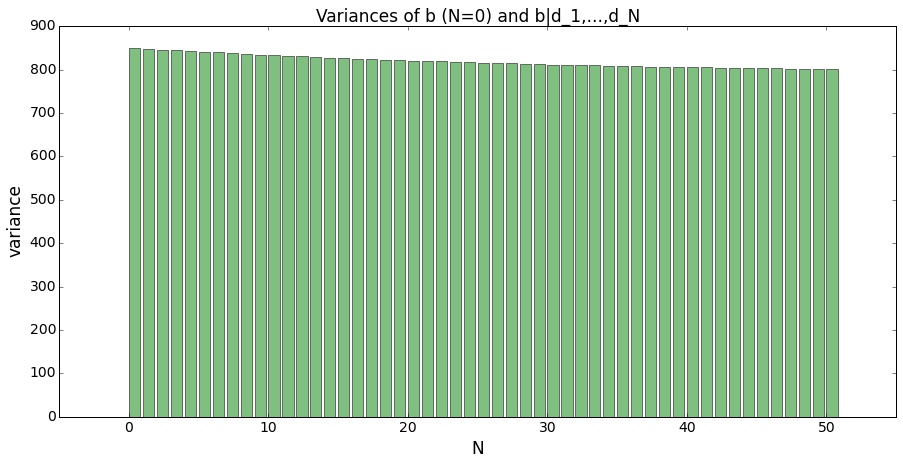

In [27]:
p = params
plt.rcParams['figure.figsize'] = 15, 7

plt.title('Expectations of b (N=0) and b|d_1,...,d_N', size=17)
plt.ylabel('expectation', size=17)
plt.xlabel('N', size=17)
plt.ylim((p['bmin'], p['bmax']))
plt.xlim((-5, 55))
plt.tick_params(axis='both', which='major', labelsize=14)
plt.bar(range(p['N'] + 1), [expect_b] + expect_b_d_i, color='g', alpha=0.5)
plt.show()

plt.title('Variances of b (N=0) and b|d_1,...,d_N', size=17)
plt.ylabel('variance', size=17)
plt.xlabel('N', size=17)
plt.xlim((-5, 55))
plt.tick_params(axis='both', which='major', labelsize=14)
plt.bar(range(p['N'] + 1), [var_b] + var_b_d_i, color='g', alpha=0.5)
plt.show()

##### 3.2.2. Графики

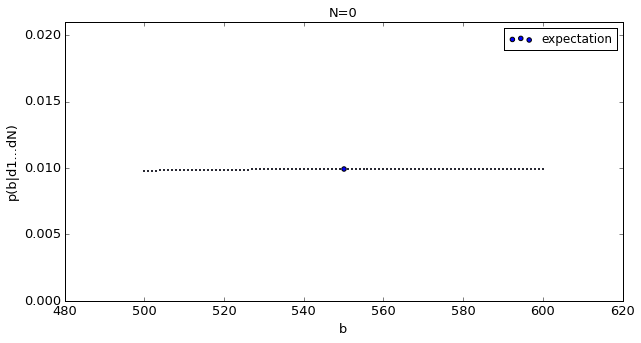

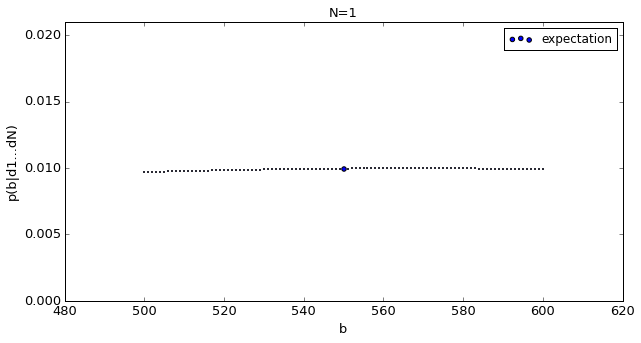

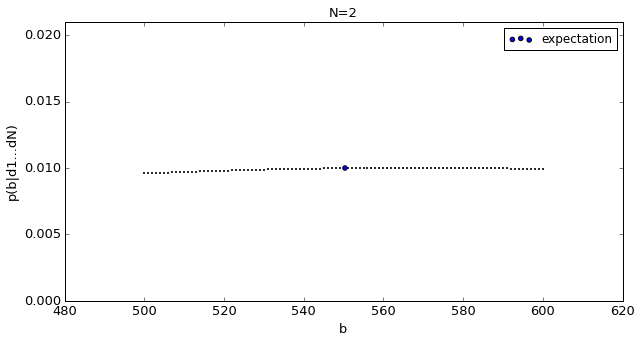

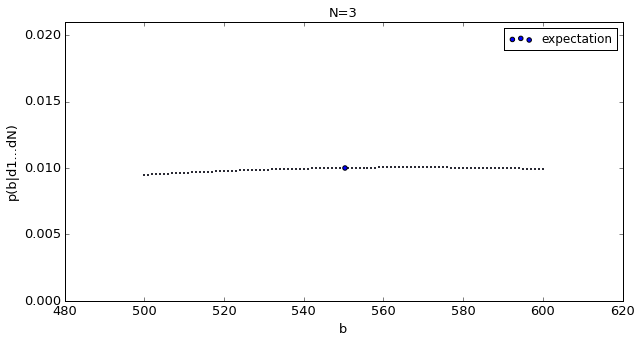

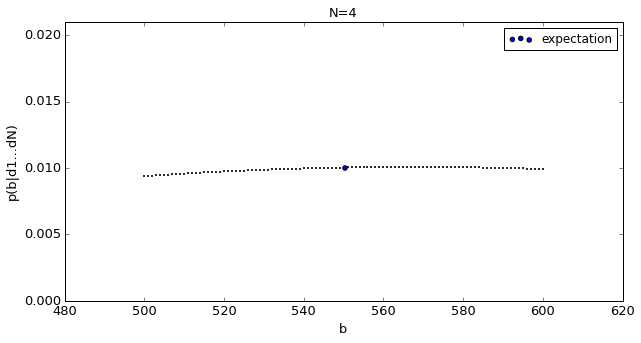

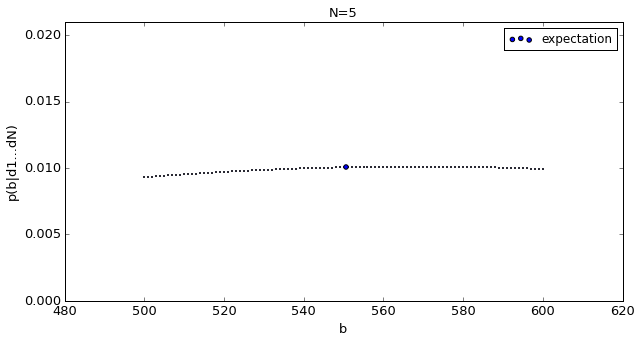

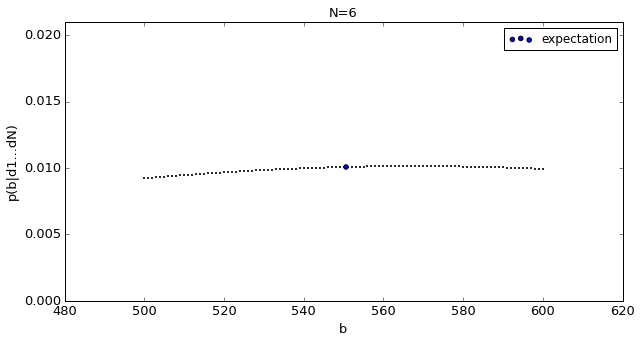

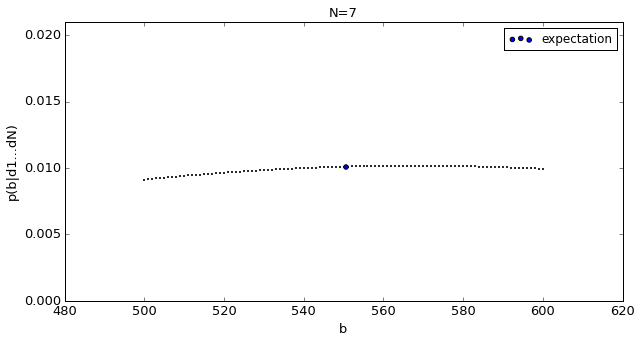

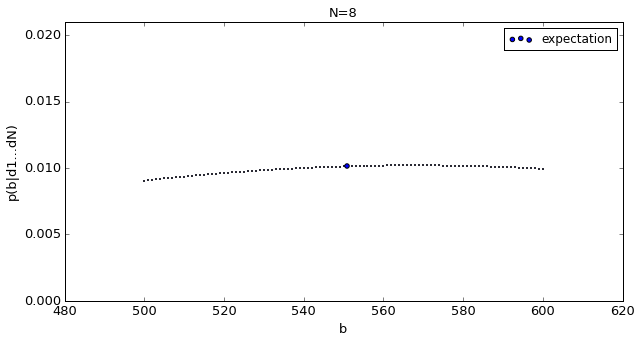

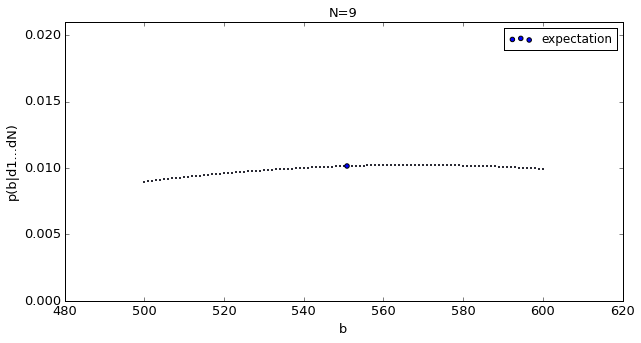

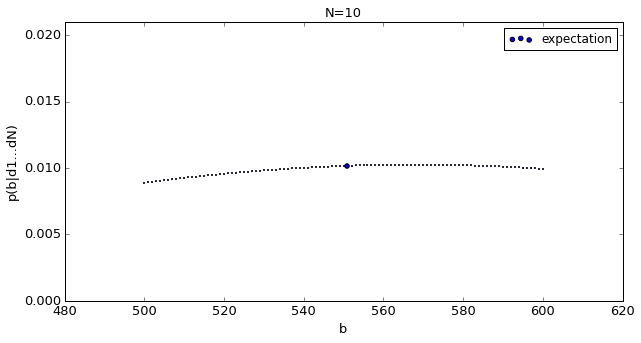

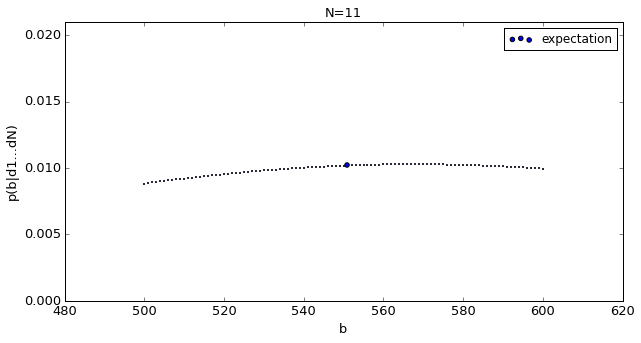

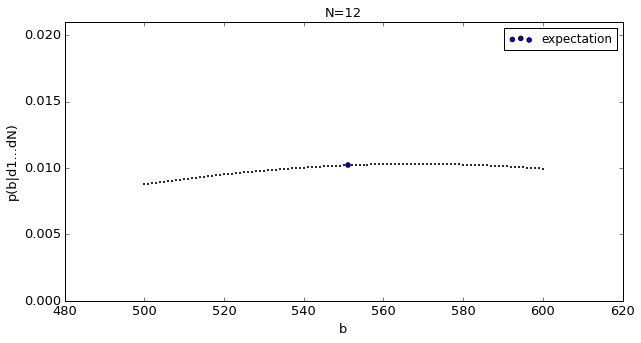

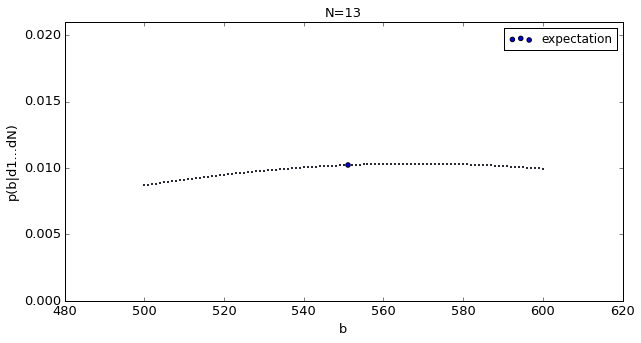

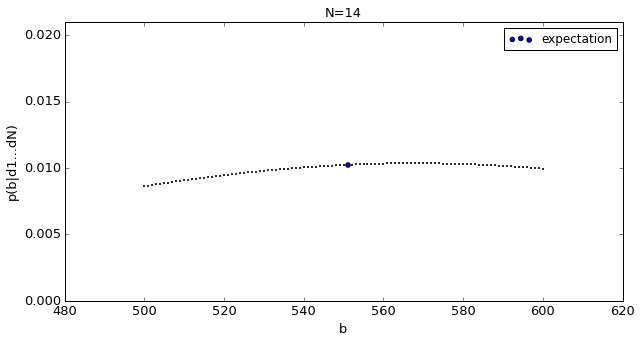

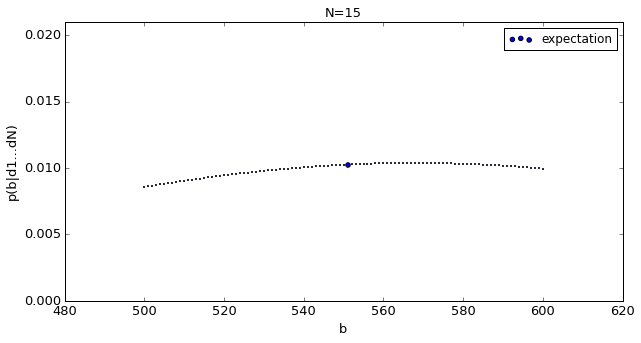

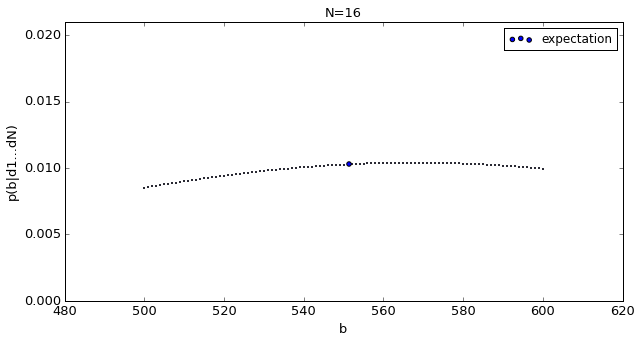

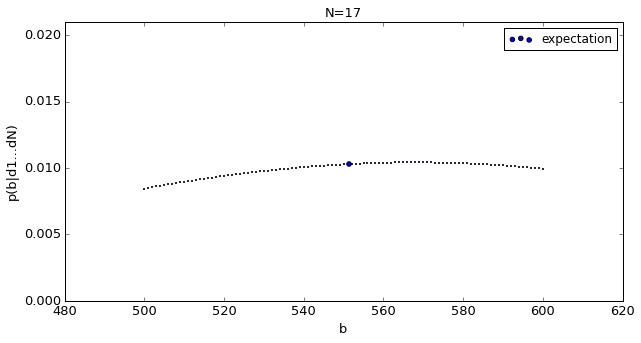

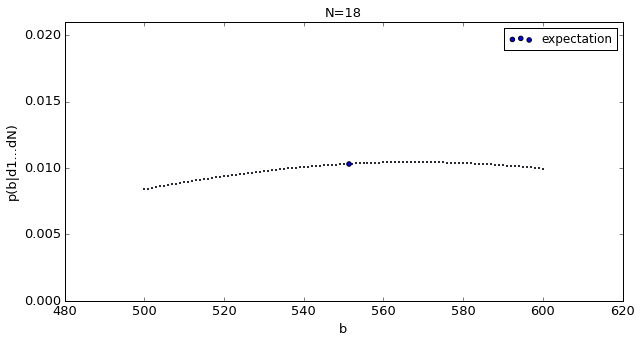

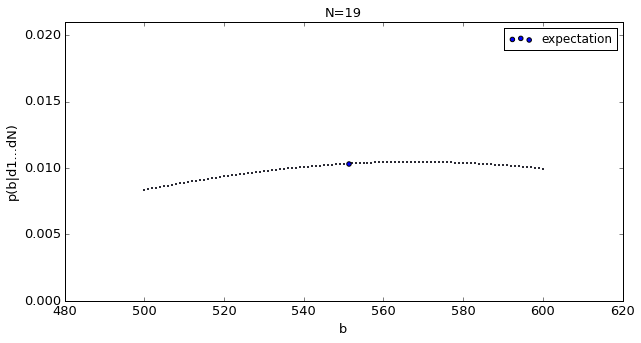

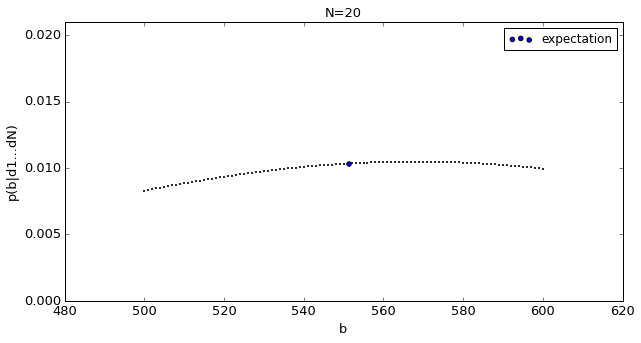

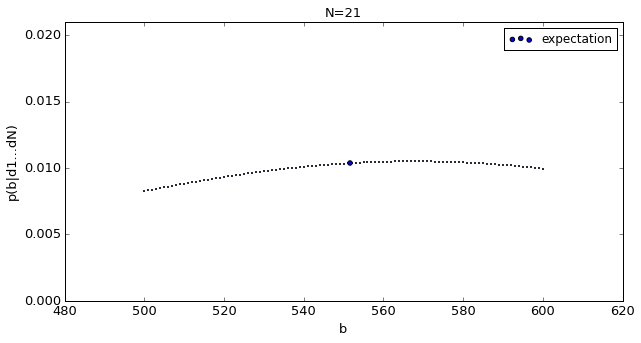

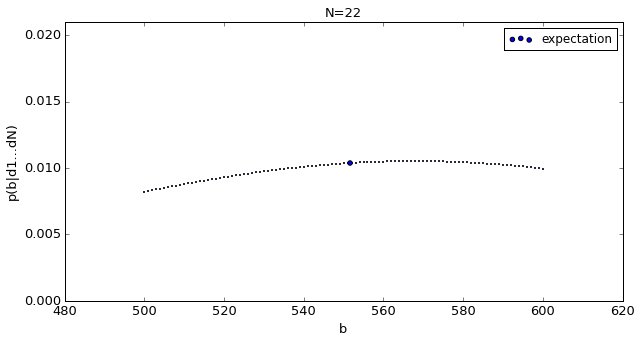

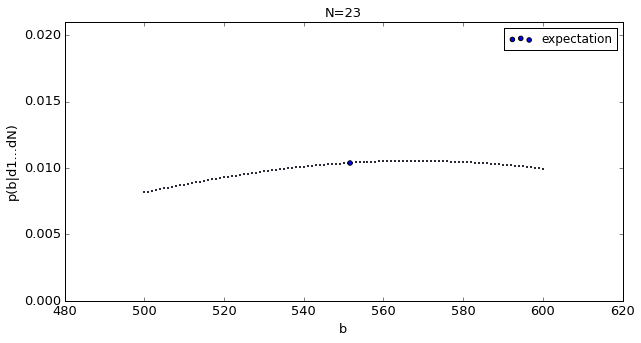

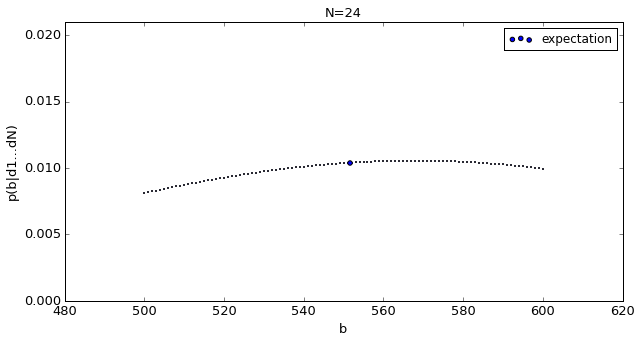

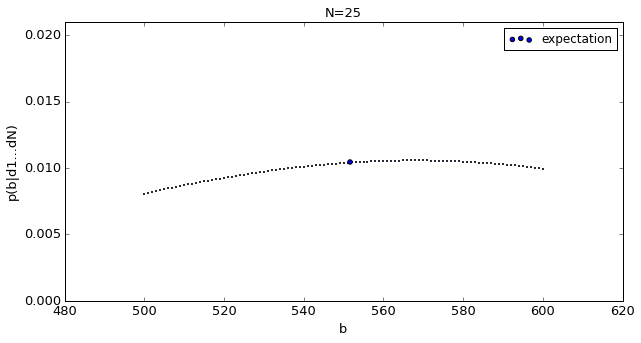

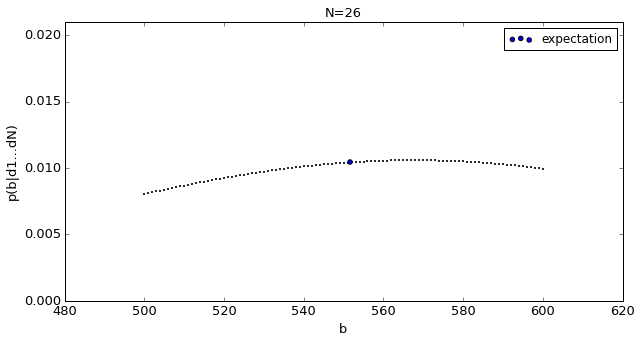

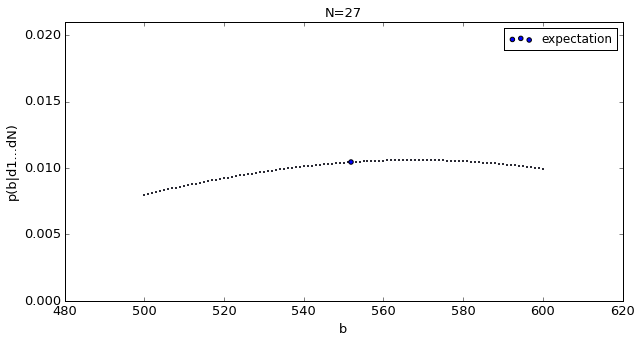

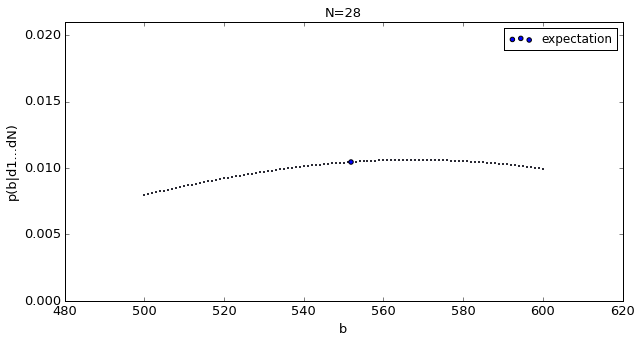

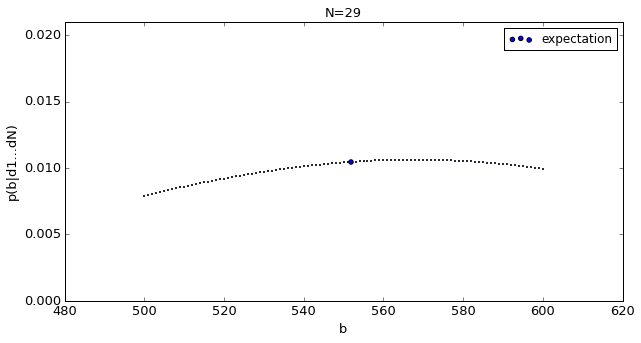

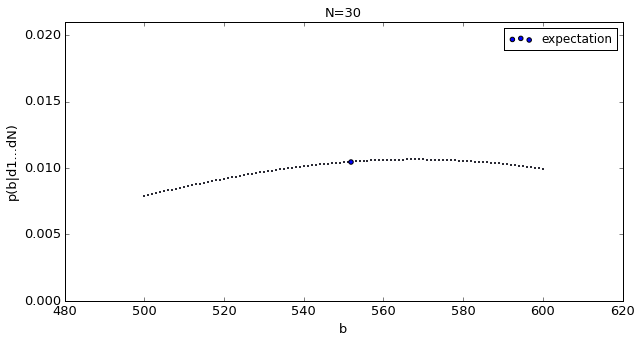

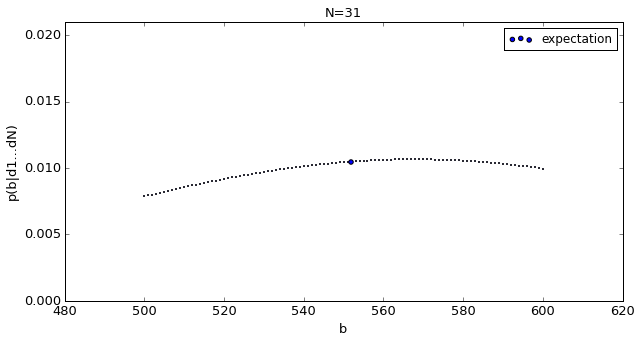

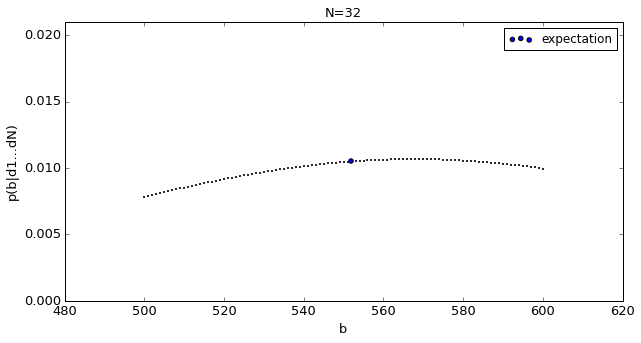

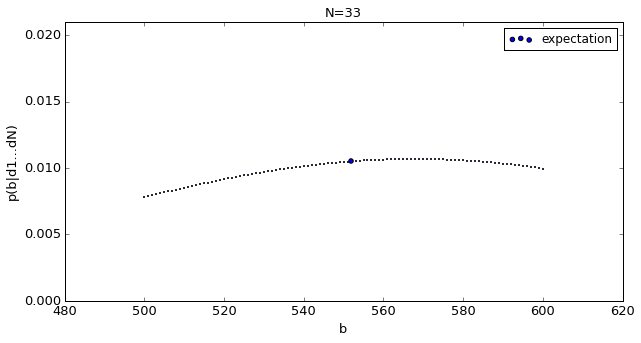

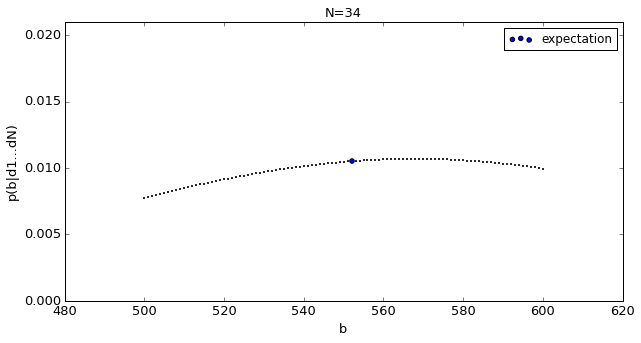

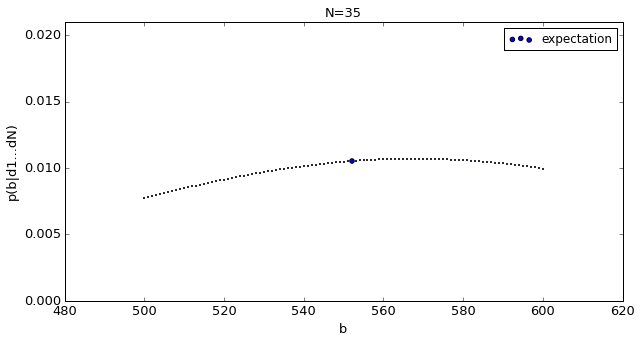

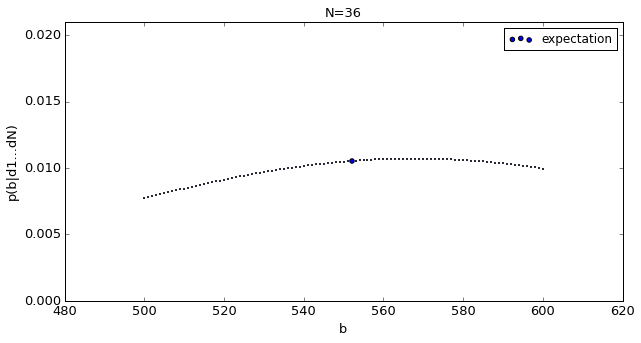

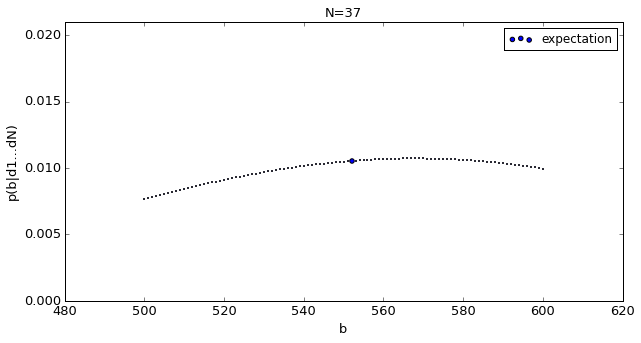

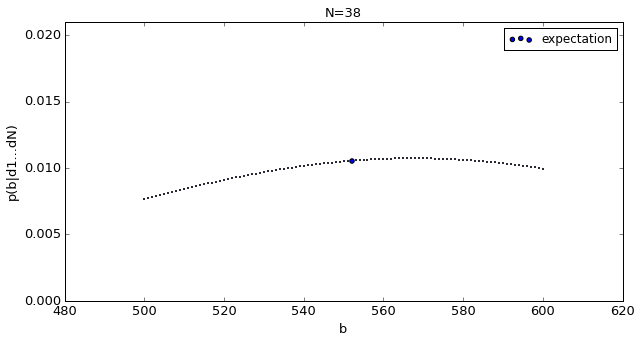

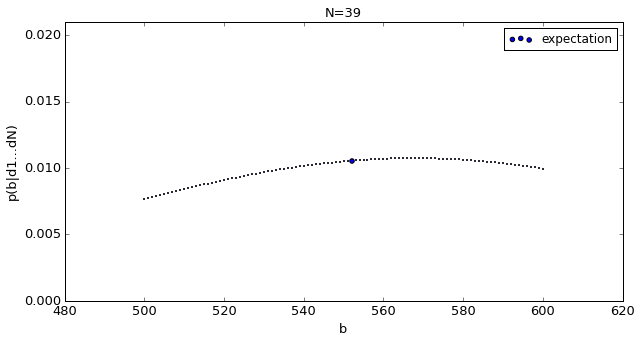

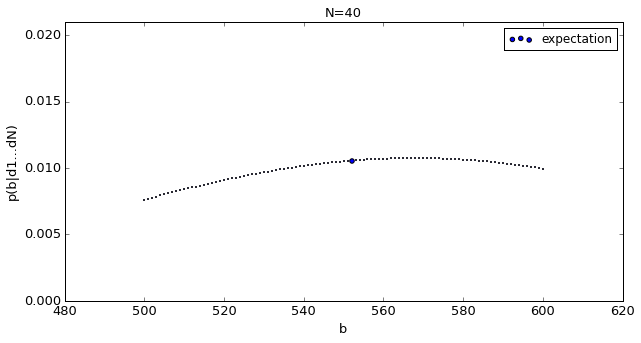

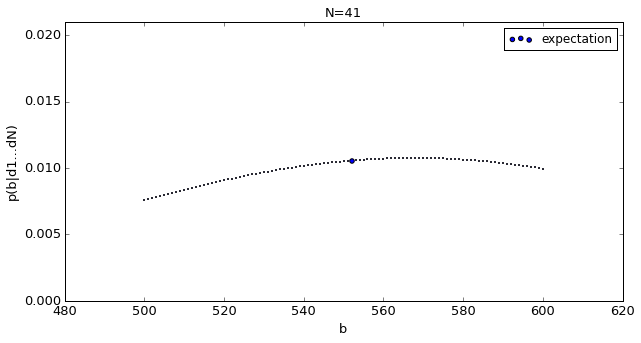

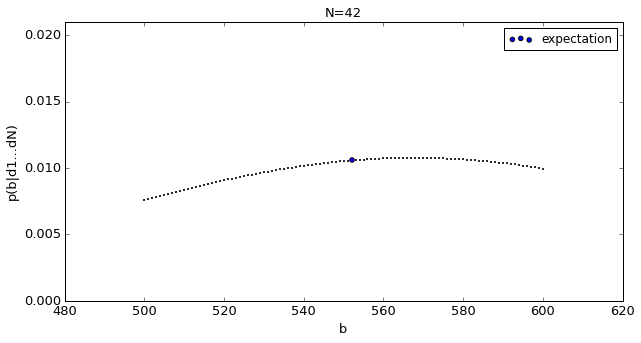

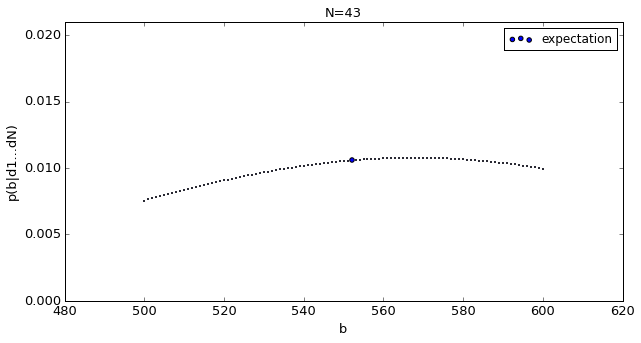

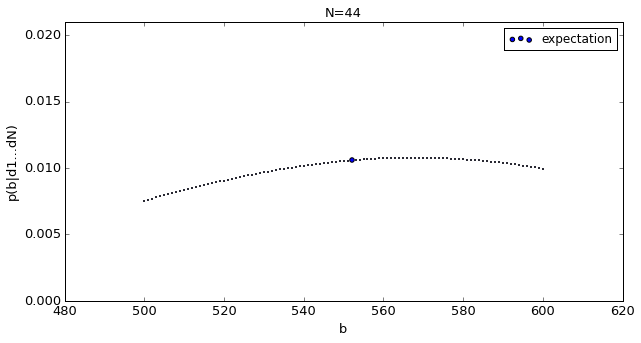

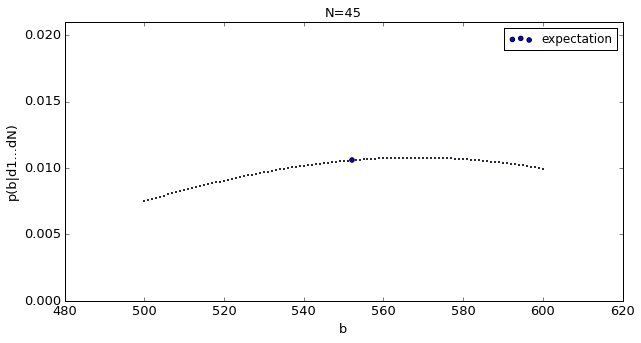

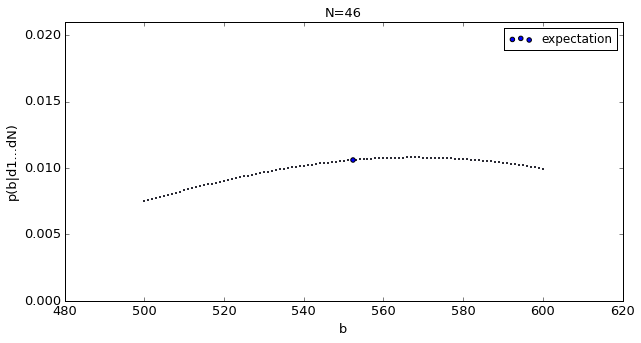

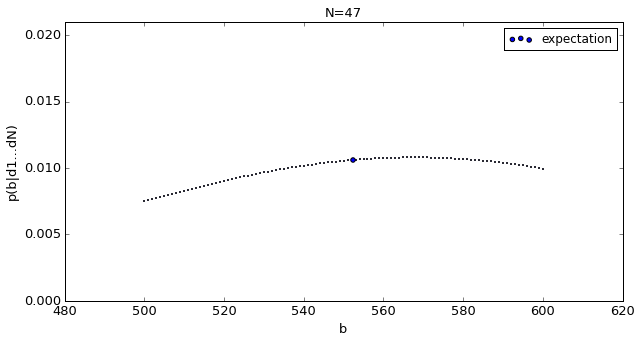

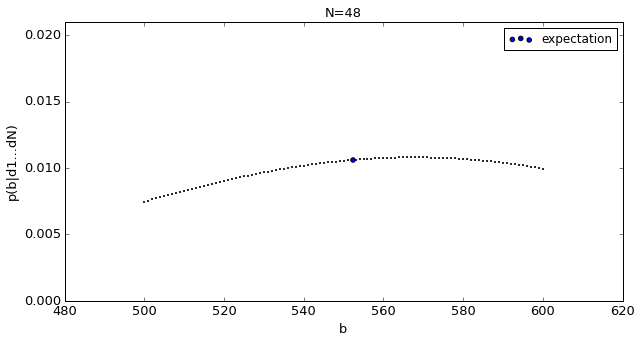

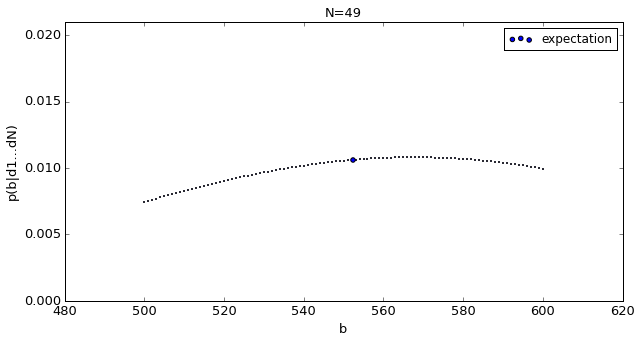

In [28]:
plt.rcParams['figure.figsize'] = 10, 5
i = 0
for p in pb_d[0].T:
    plt.title('N=' + str(i), size=13)
    plt.xlabel('b', size=13)
    plt.ylabel('p(b|d1...dN)', size=13)
    plt.ylim((0, 0.021))
    plt.scatter(pb_d[1], p, s=1)
    plt.tick_params(axis='both', which='major', labelsize=13)
    plt.scatter(expect_b_d_i[i], p[int(round(expect_b_d_i[i])) - params['bmin']], label='expectation')
    plt.legend(loc='best')
    plt.show()
    i += 1

##### 3.2.3. 3.2.1 - 3.2.2 при известном параметре $a$

In [29]:
p = params

In [30]:
pb_ad = bro.pb_ad(round(expect_a), d, p, 4)

In [31]:
expect_b_ad_i = [bro.expectation('custom', {'p': p, 'x': pb_ad[1]}) for p in pb_ad[0].T]
var_b_ad_i = [bro.variance('custom', {'p': p, 'x': pb_ad[1]}) for p in pb_ad[0].T]

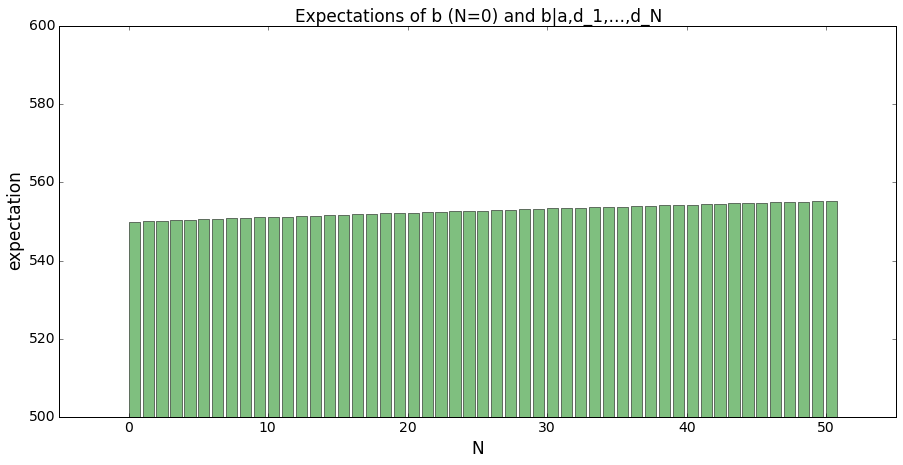

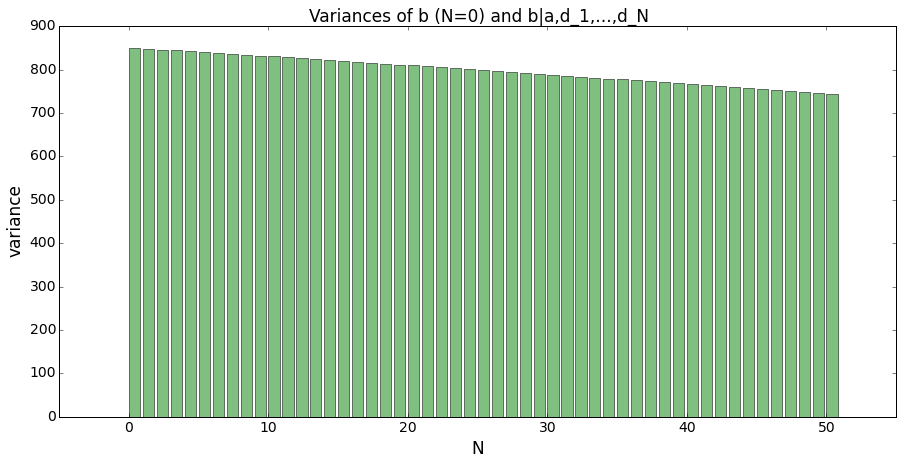

In [32]:
p = params
plt.rcParams['figure.figsize'] = 15, 7

plt.title('Expectations of b (N=0) and b|a,d_1,...,d_N', size=17)
plt.ylabel('expectation', size=17)
plt.xlabel('N', size=17)
plt.ylim((p['bmin'], p['bmax']))
plt.xlim((-5, 55))
plt.tick_params(axis='both', which='major', labelsize=14)
plt.bar(range(p['N'] + 1), [expect_b] + expect_b_ad_i, color='g', alpha=0.5)
plt.show()

plt.title('Variances of b (N=0) and b|a,d_1,...,d_N', size=17)
plt.ylabel('variance', size=17)
plt.xlabel('N', size=17)
plt.xlim((-5, 55))
plt.tick_params(axis='both', which='major', labelsize=14)
plt.bar(range(p['N'] + 1), [var_b] + var_b_ad_i, color='g', alpha=0.5)
plt.show()

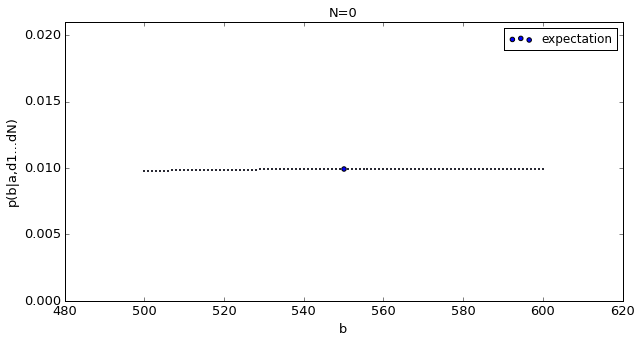

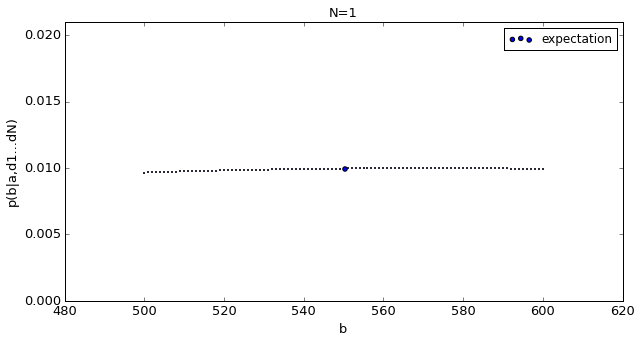

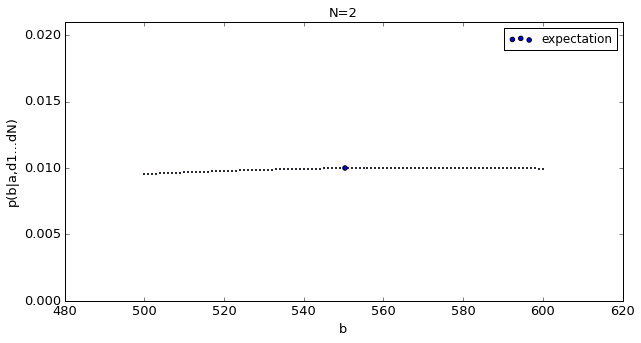

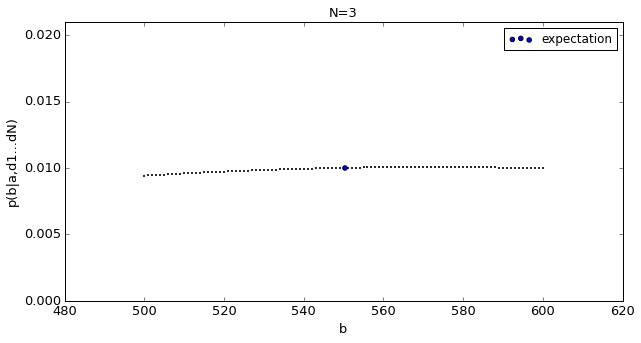

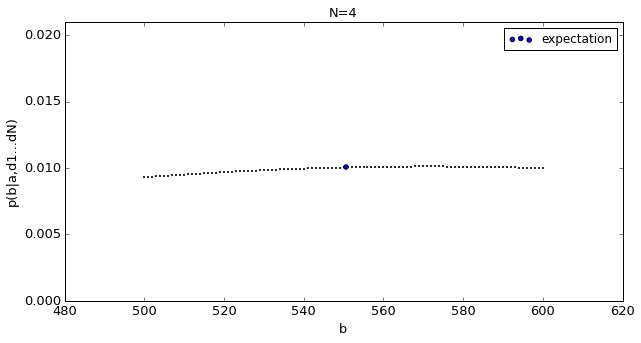

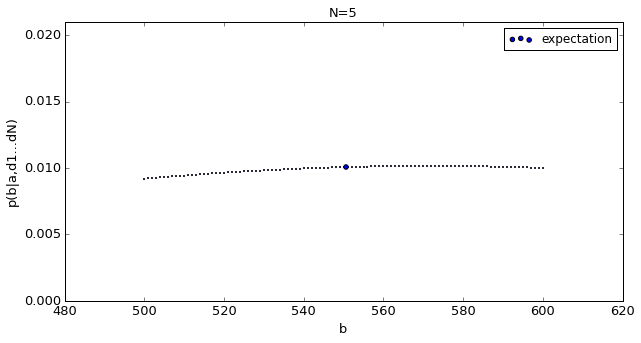

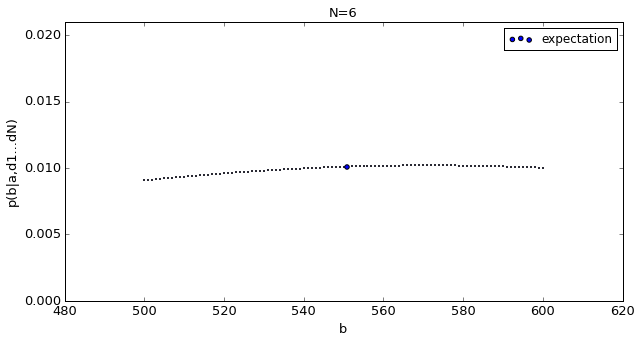

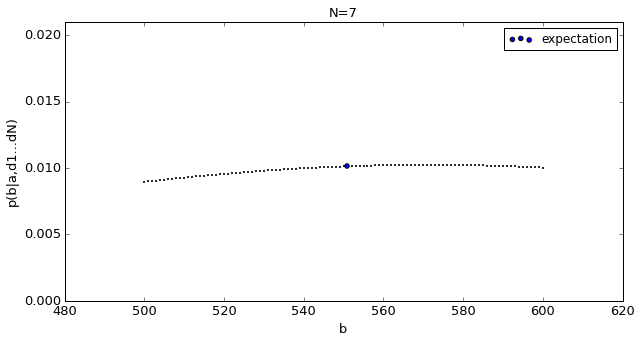

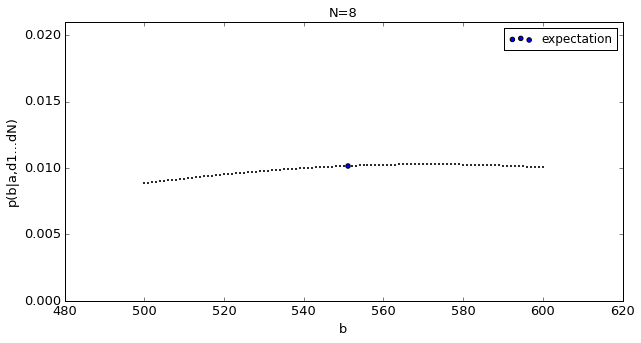

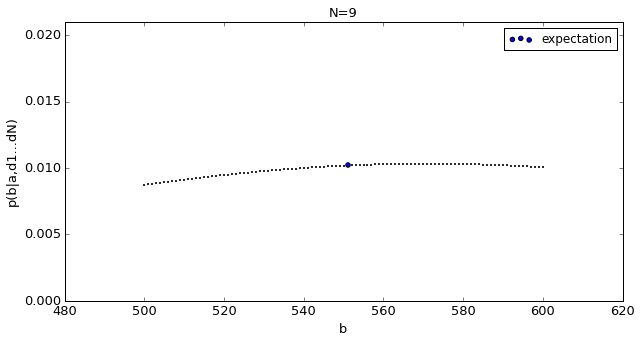

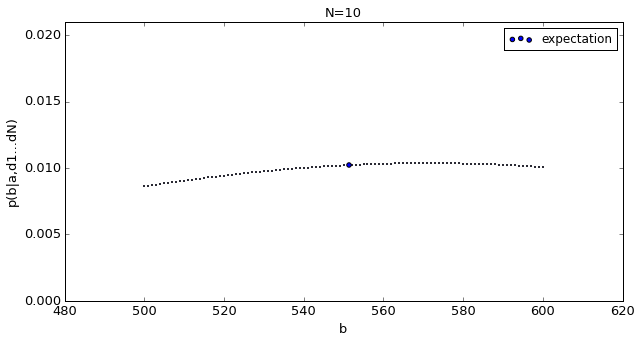

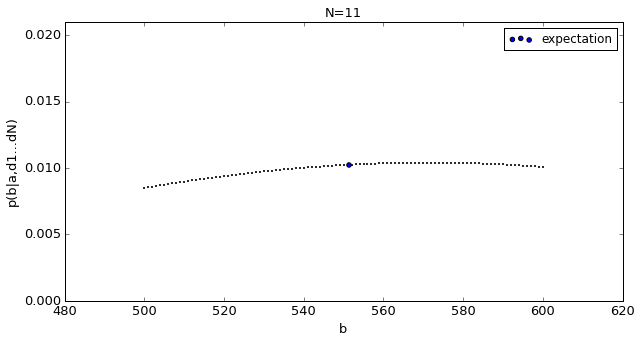

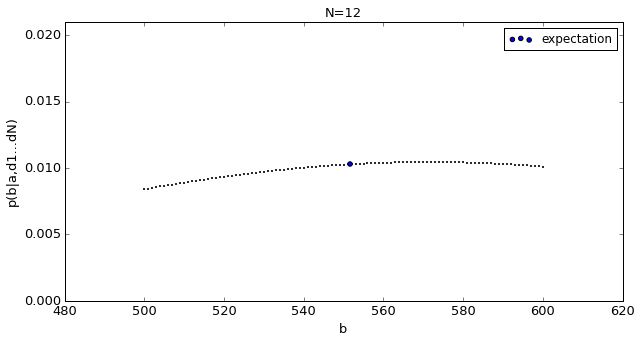

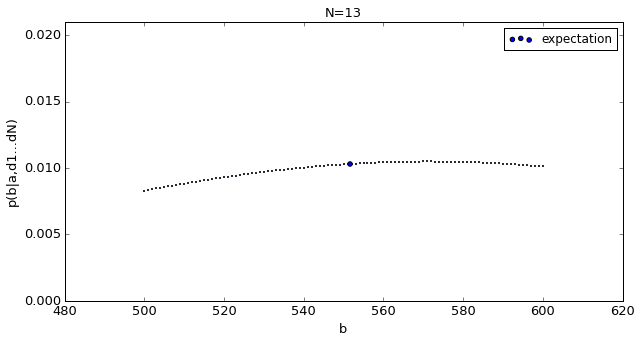

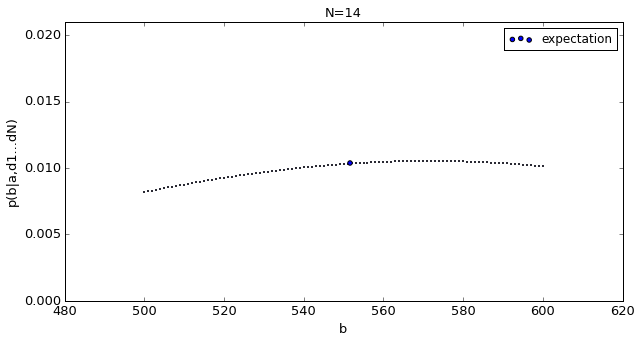

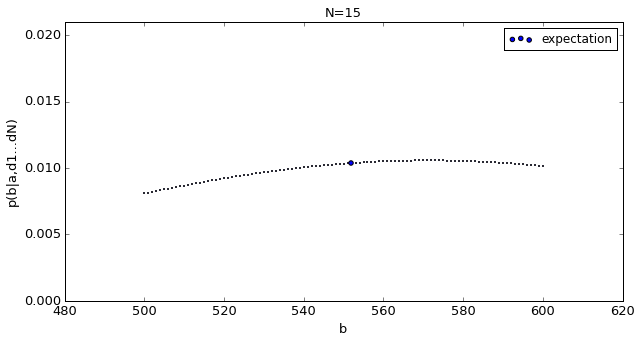

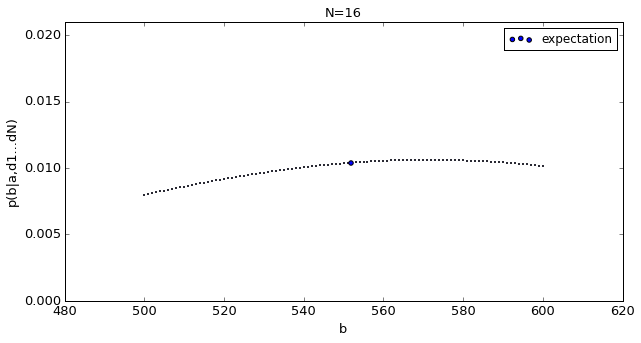

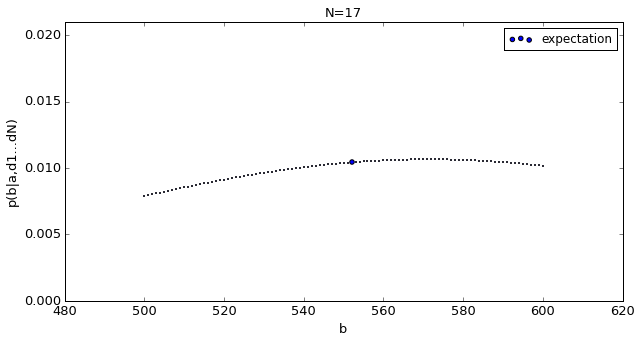

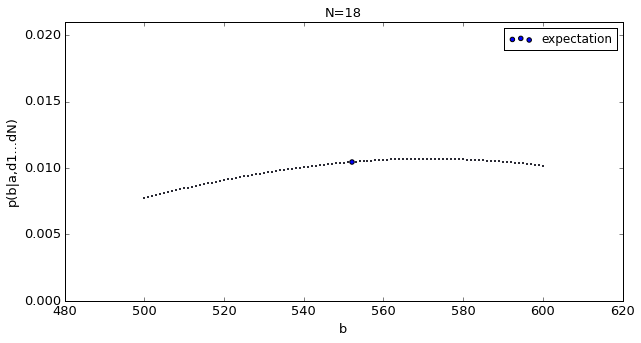

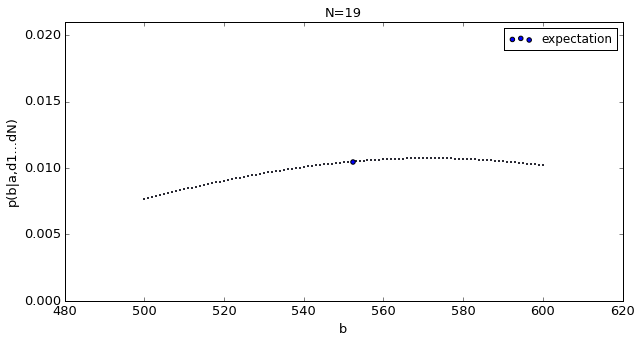

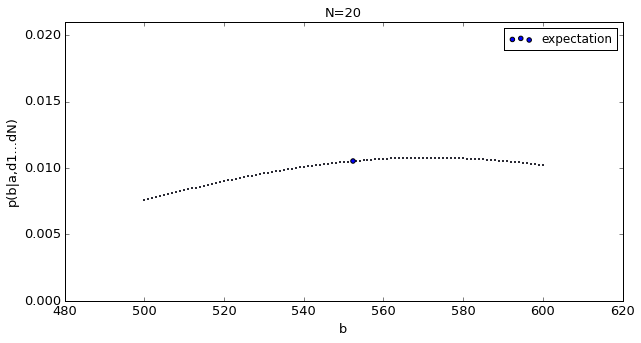

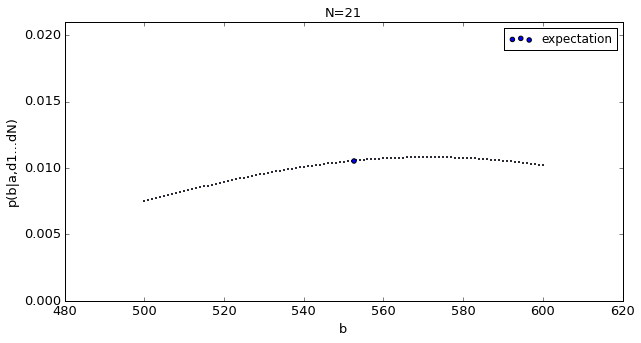

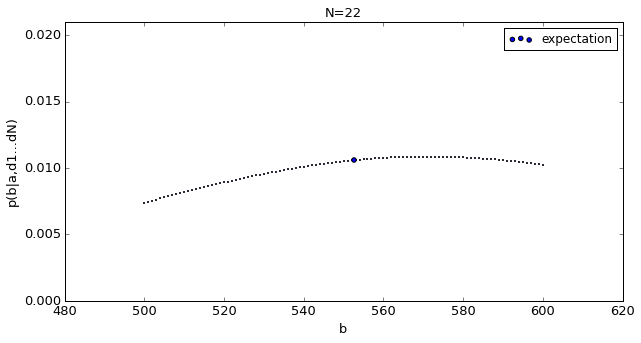

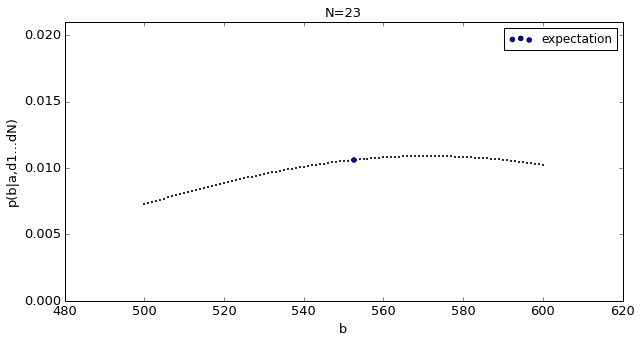

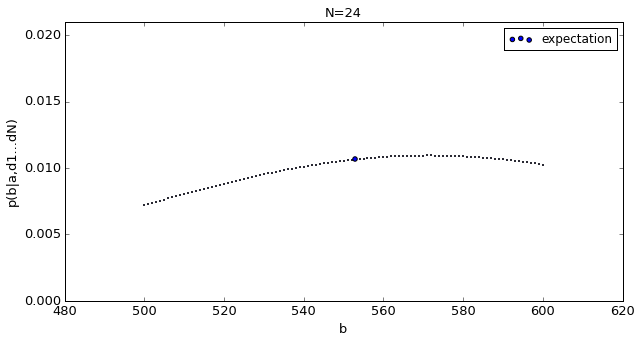

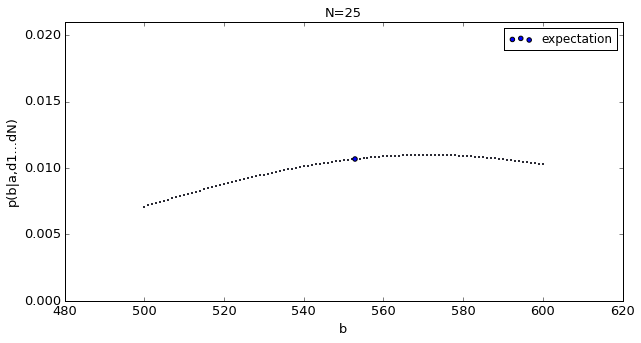

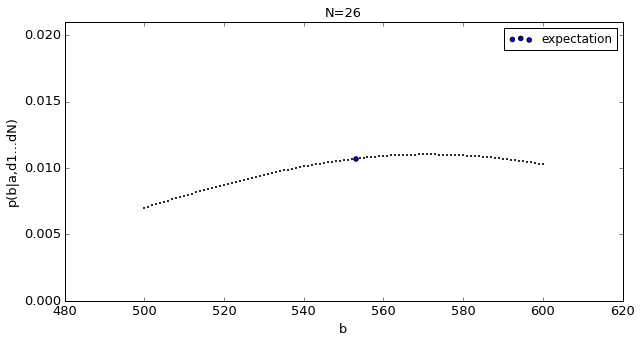

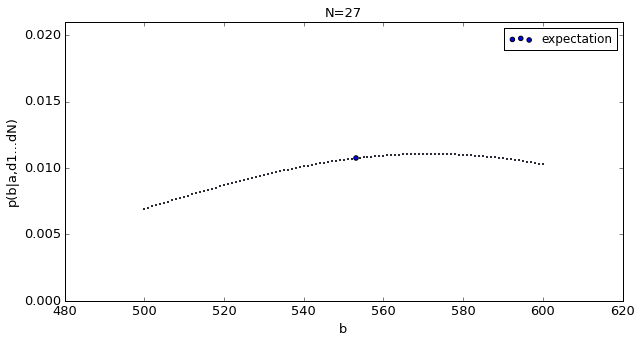

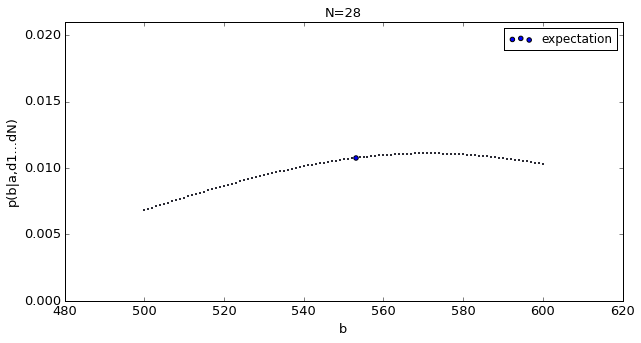

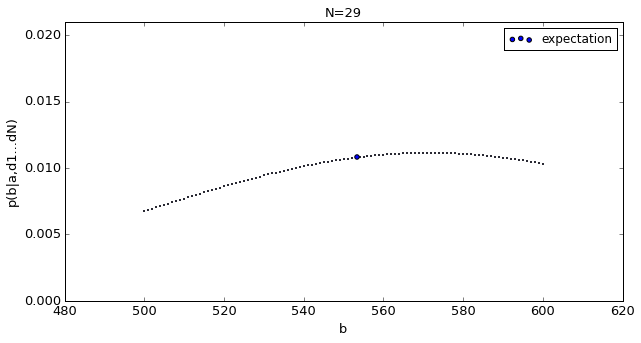

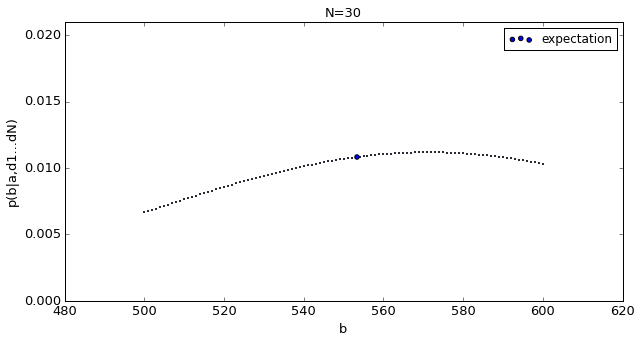

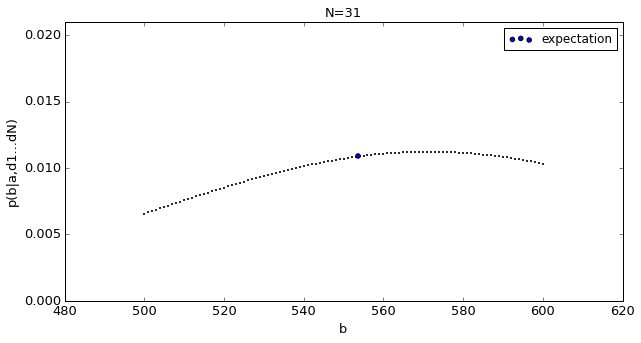

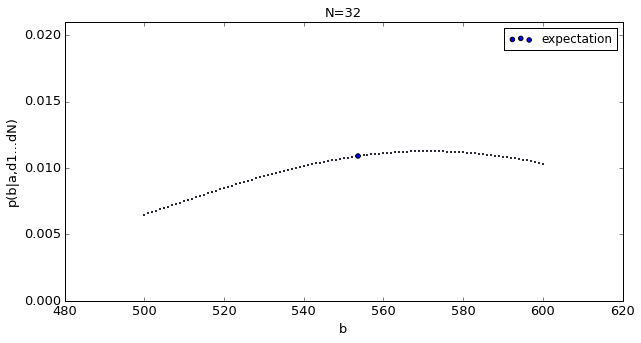

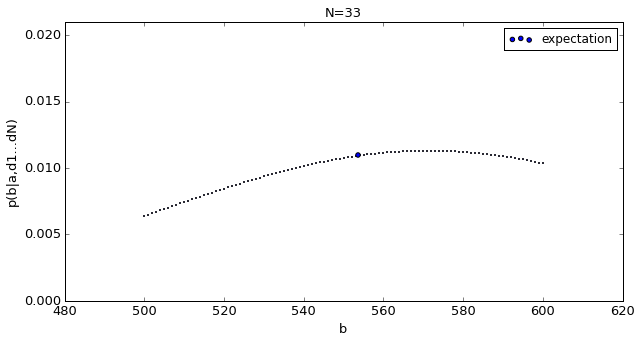

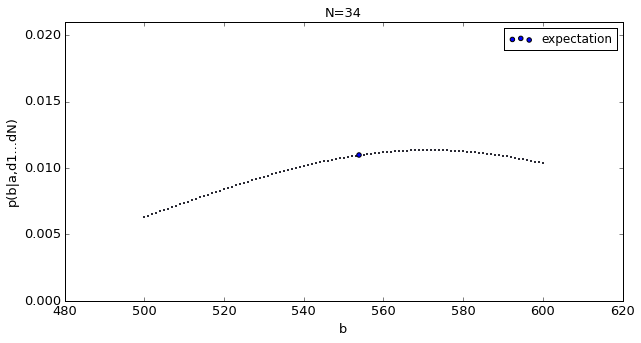

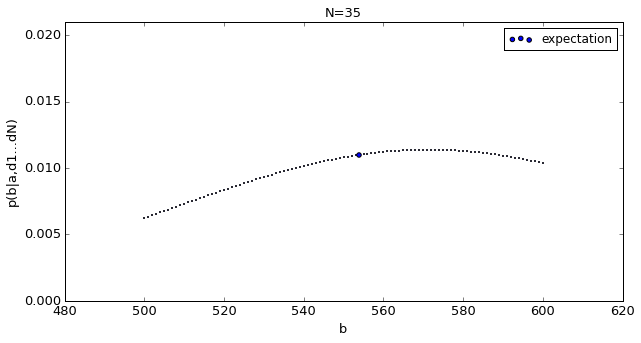

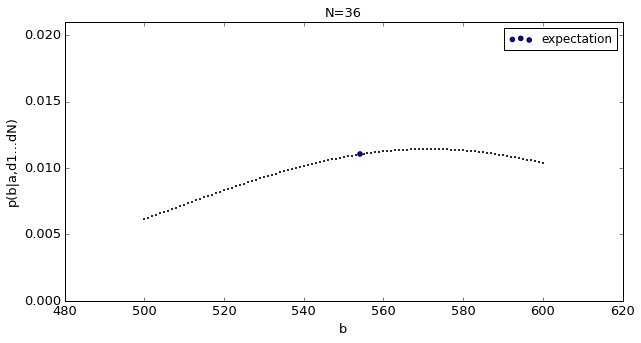

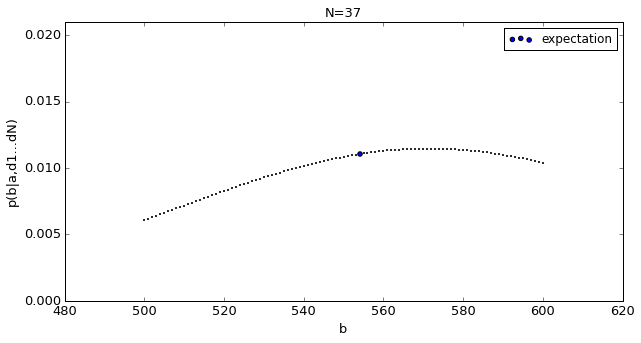

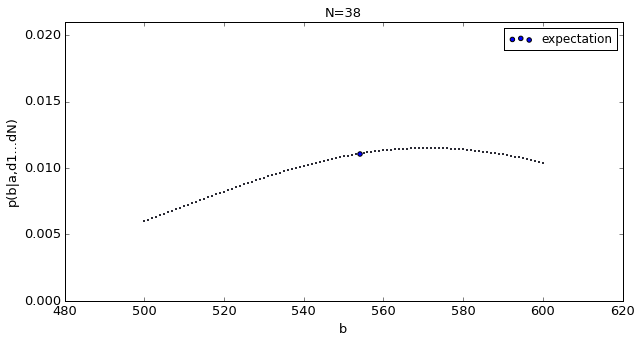

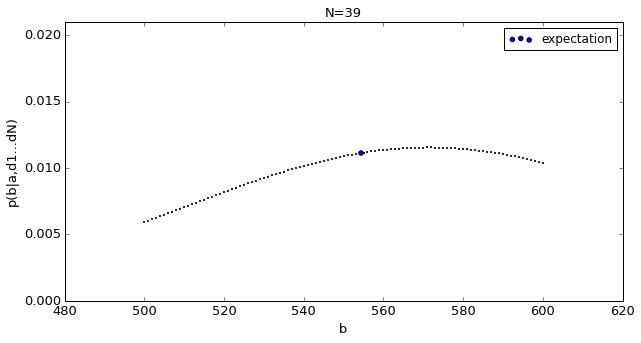

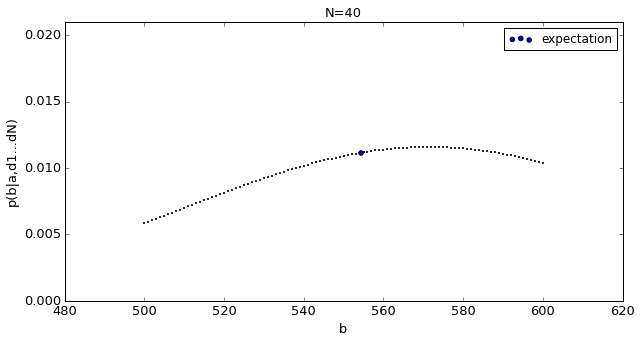

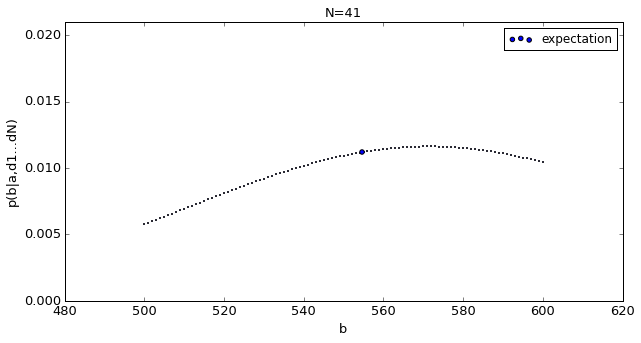

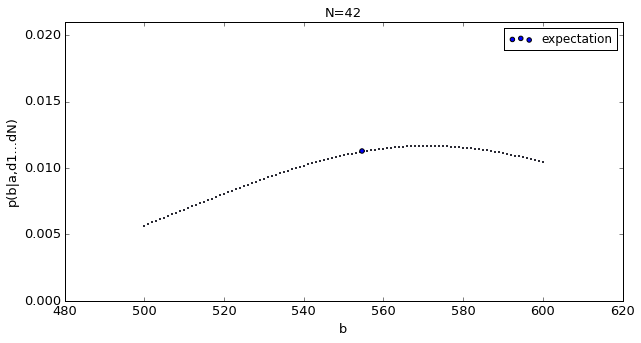

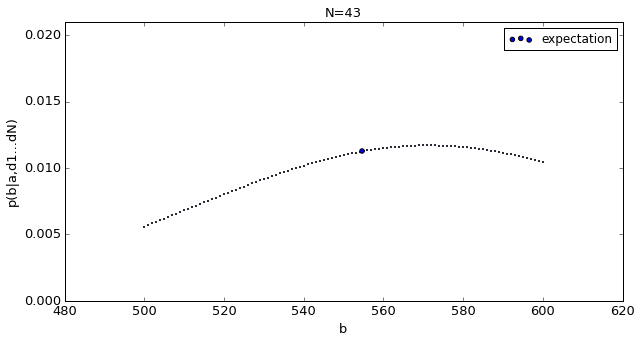

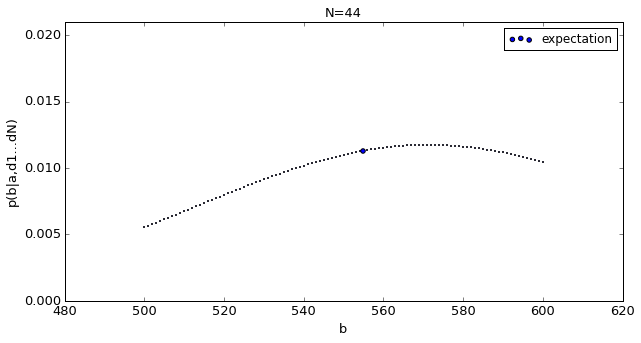

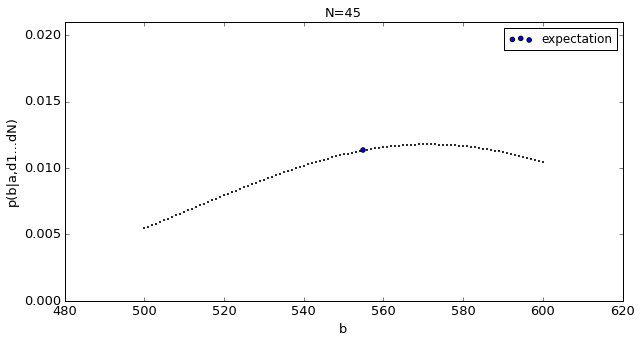

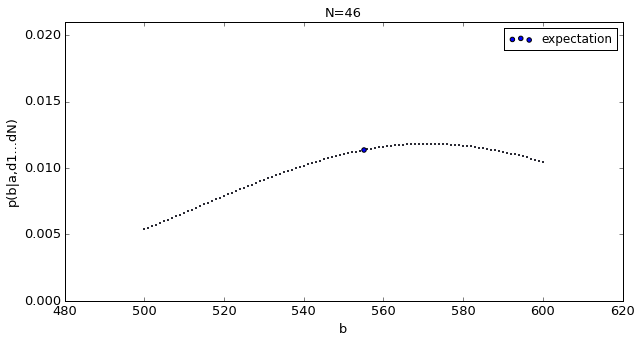

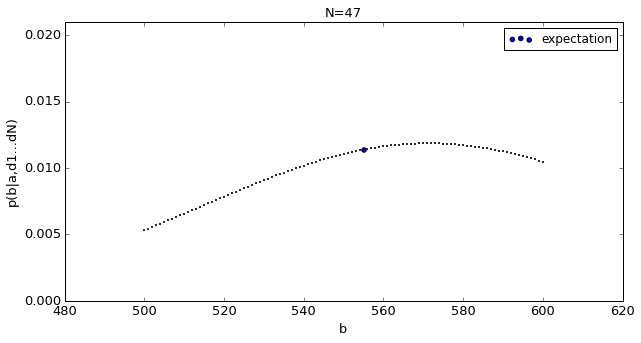

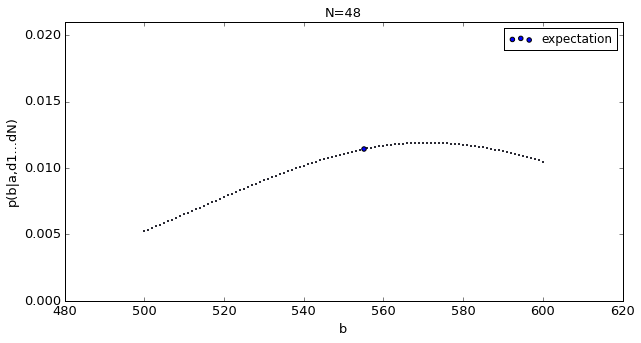

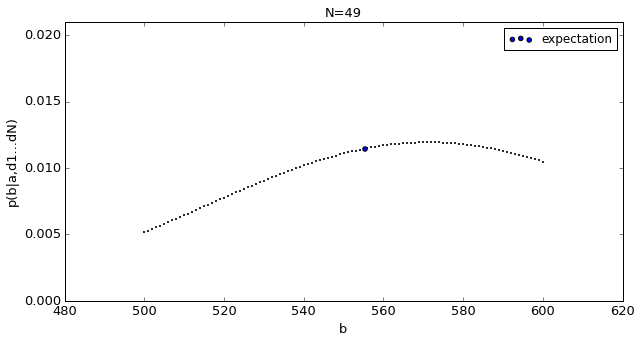

In [33]:
plt.rcParams['figure.figsize'] = 10, 5
i = 0
for p in pb_ad[0].T:
    plt.title('N=' + str(i), size=13)
    plt.xlabel('b', size=13)
    plt.ylabel('p(b|a,d1...dN)', size=13)
    plt.ylim((0, 0.021))
    plt.scatter(pb_ad[1], p, s=1)
    plt.tick_params(axis='both', which='major', labelsize=13)
    plt.scatter(expect_b_ad_i[i], p[int(round(expect_b_ad_i[i])) - params['bmin']], label='expectation')
    plt.legend(loc='best')
    plt.show()
    i += 1

##### 3.2.4. Сравнение $p(b|d_1,...,d_N), p(b|a,d_1,...,d_N)$

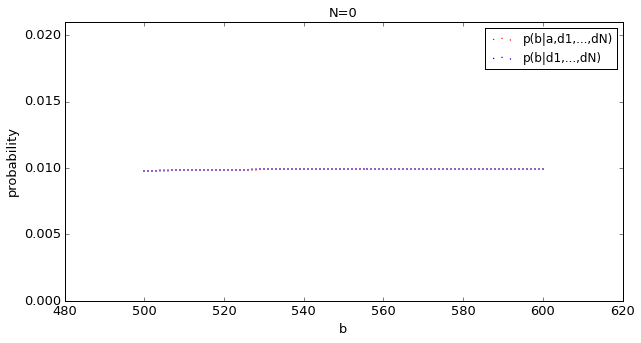

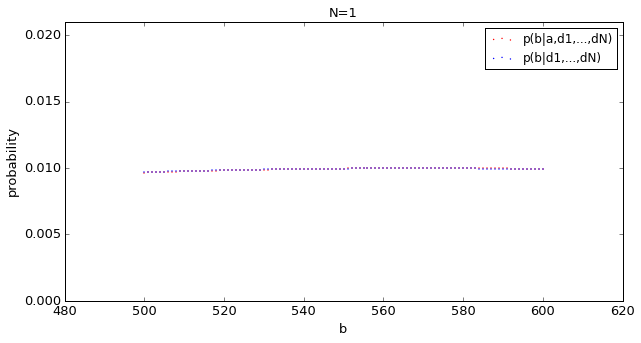

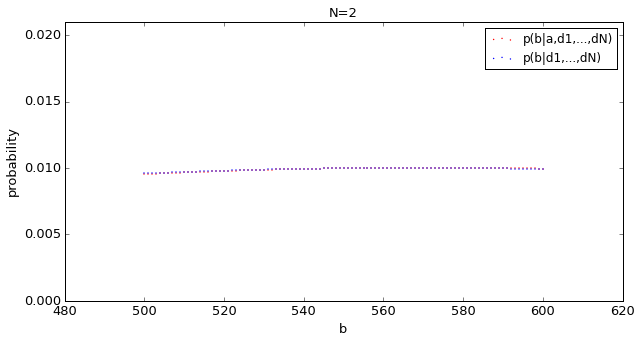

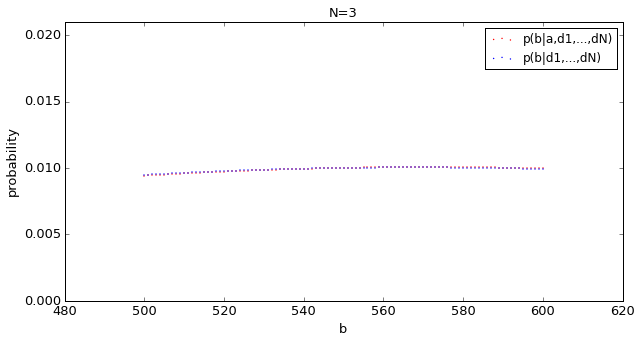

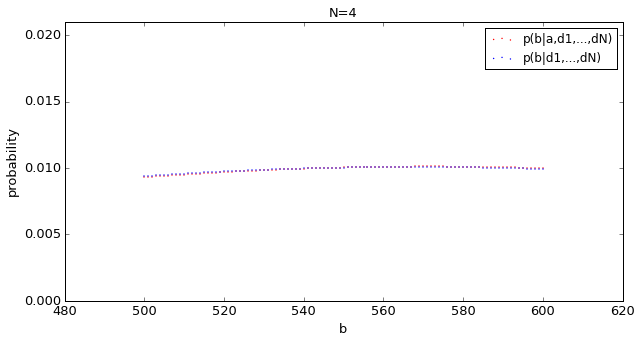

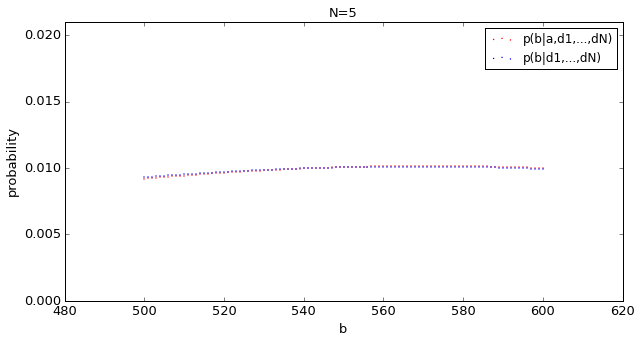

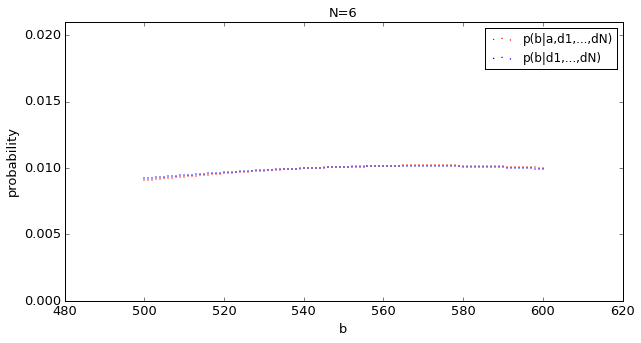

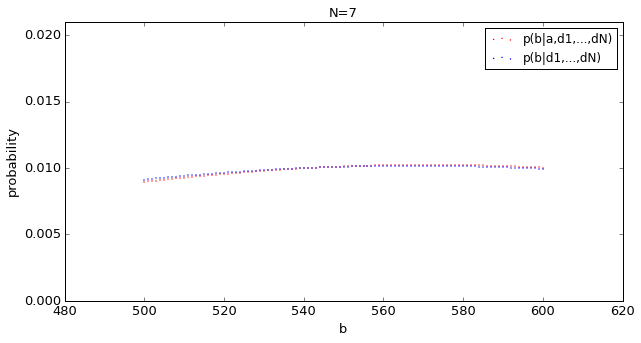

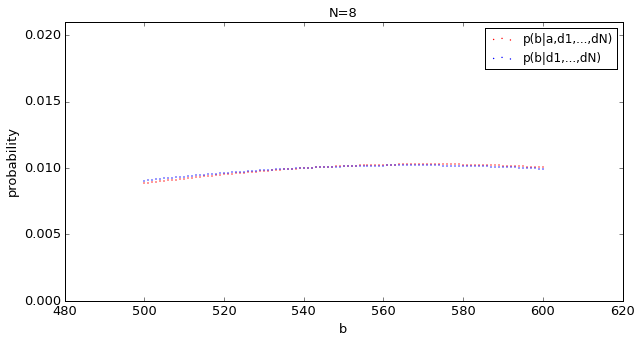

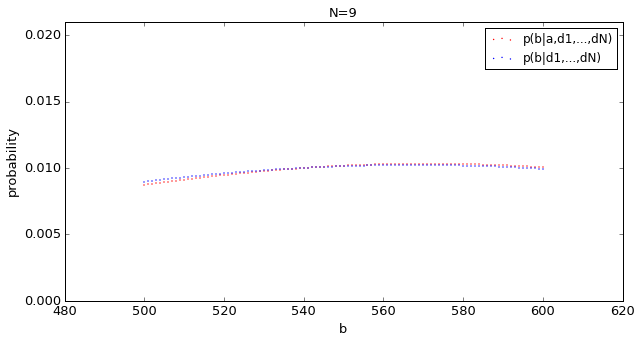

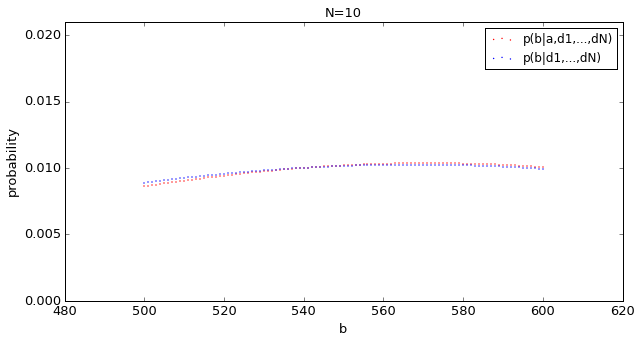

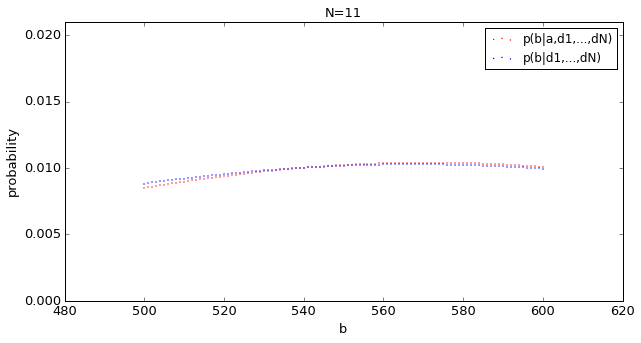

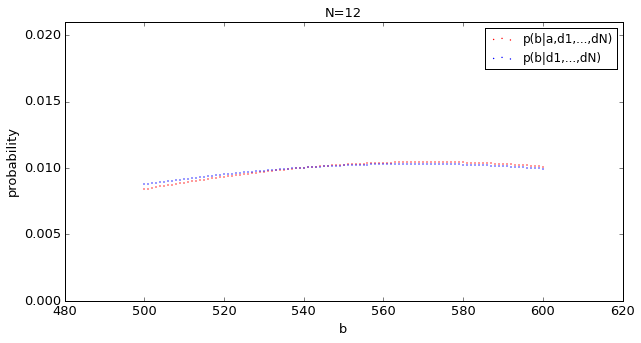

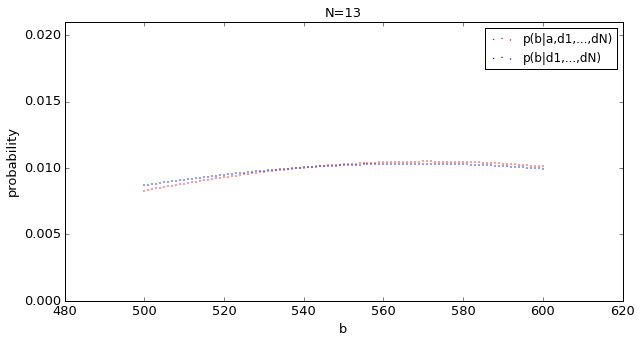

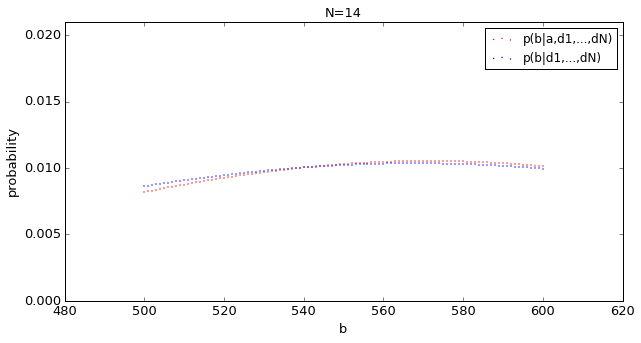

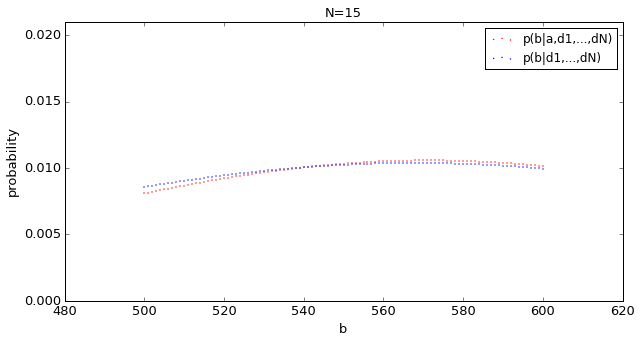

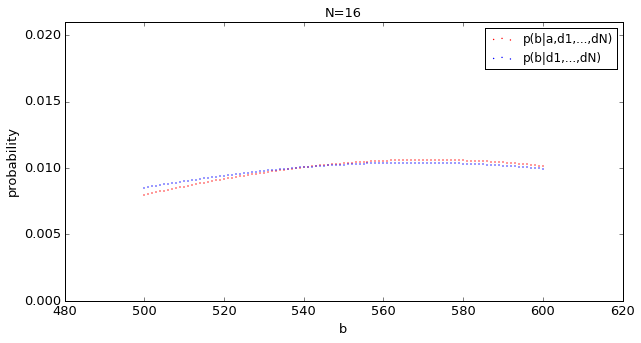

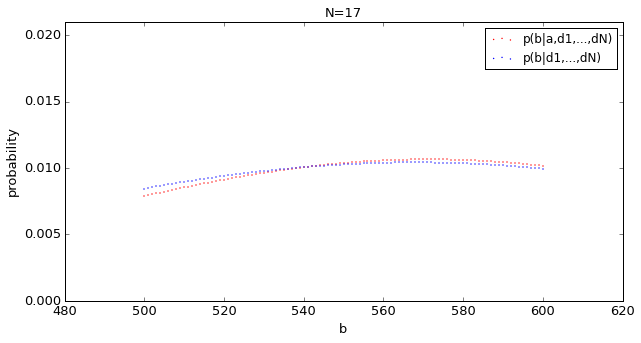

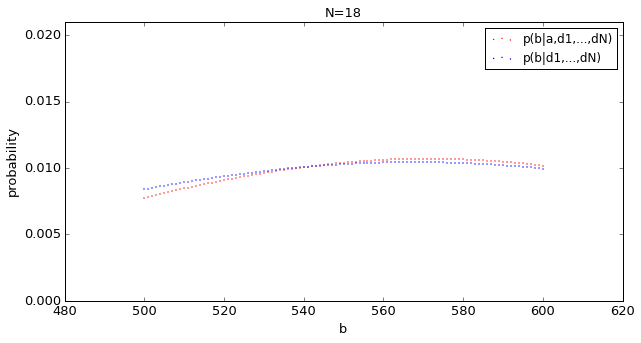

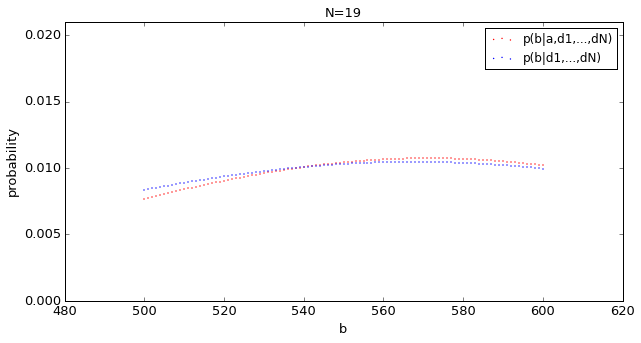

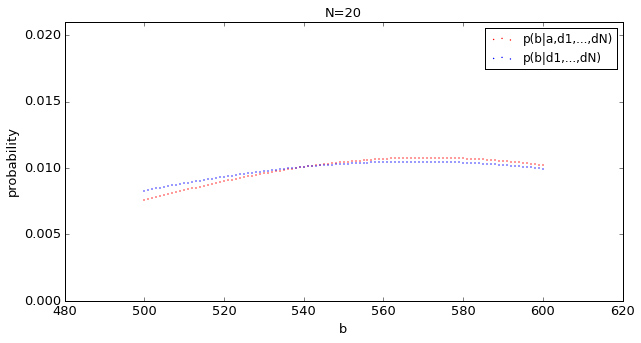

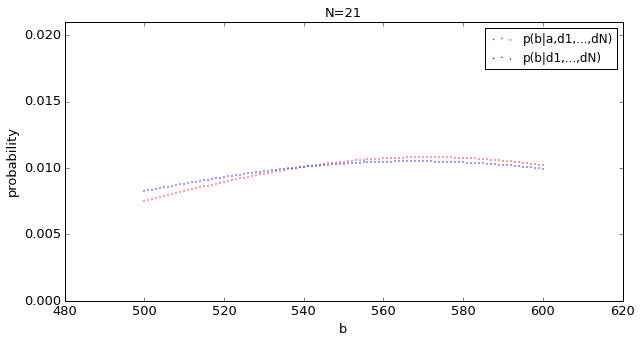

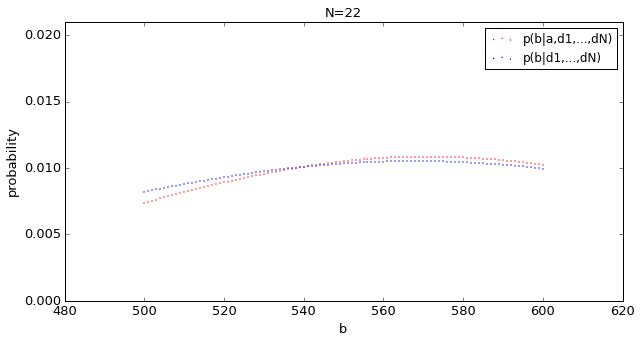

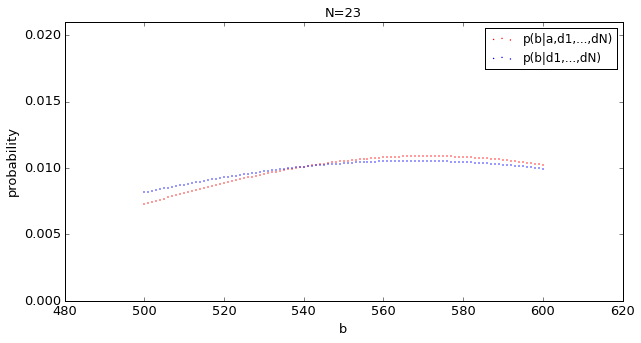

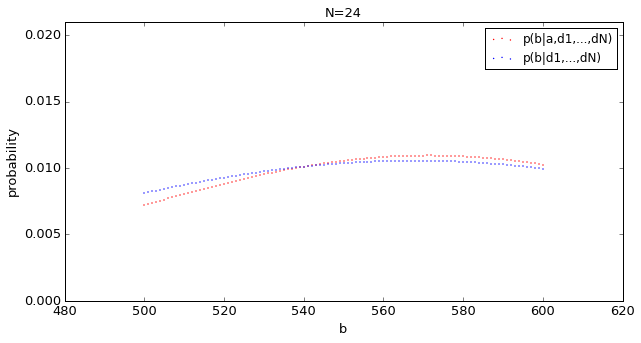

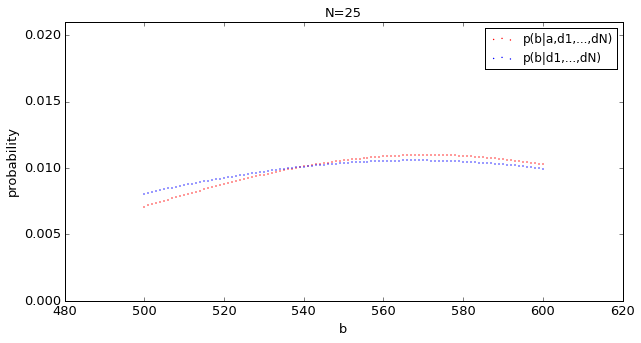

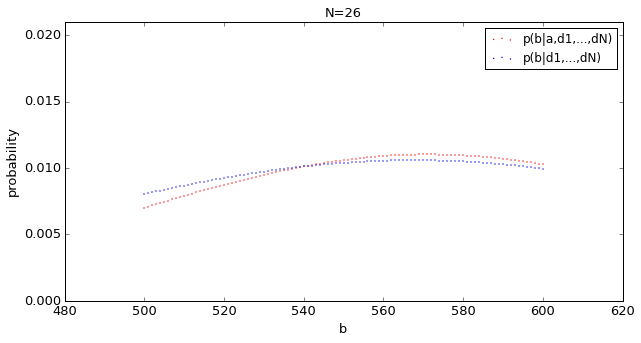

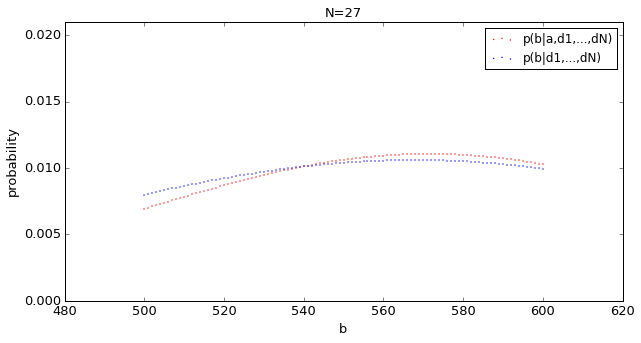

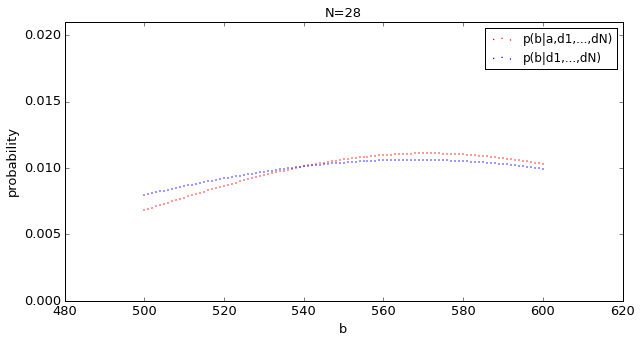

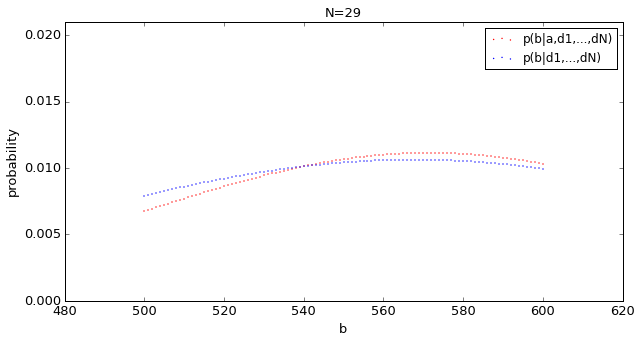

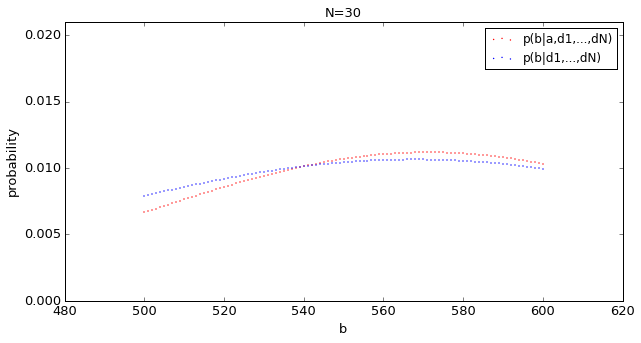

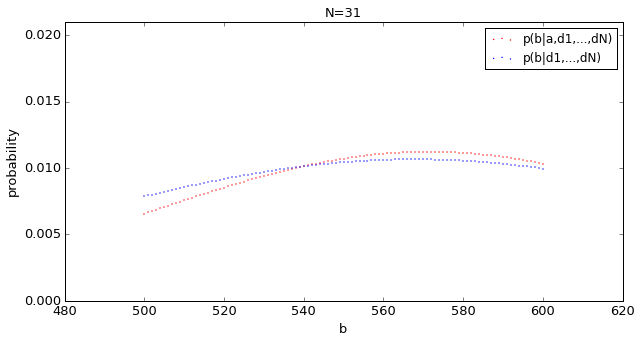

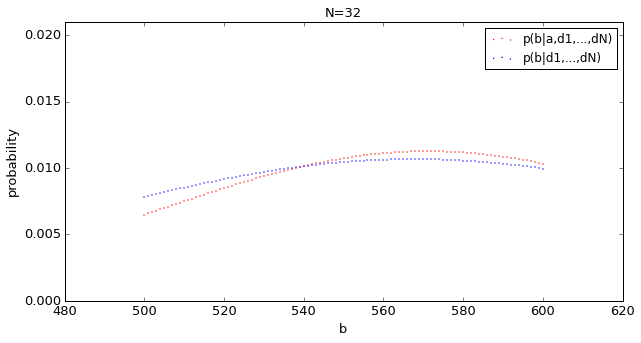

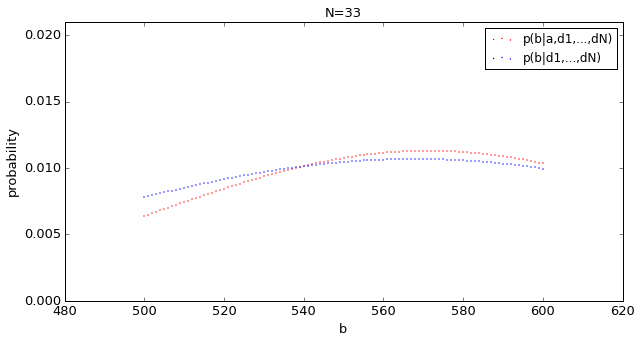

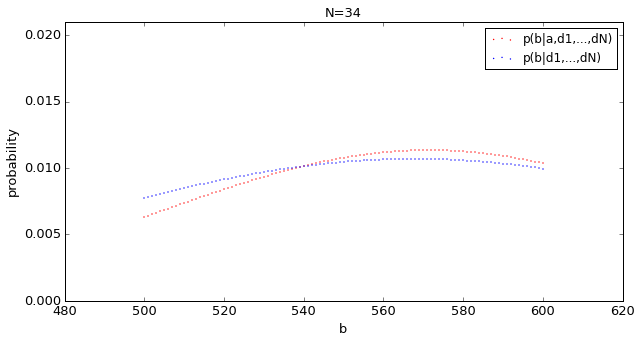

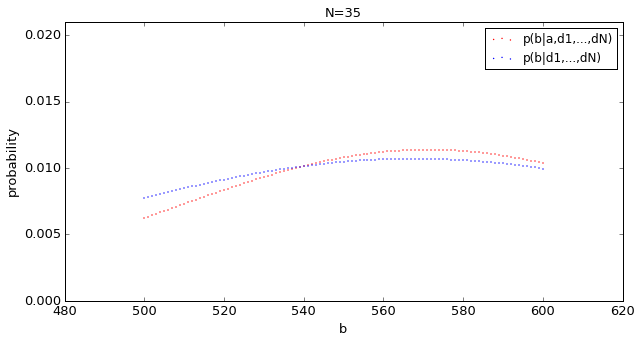

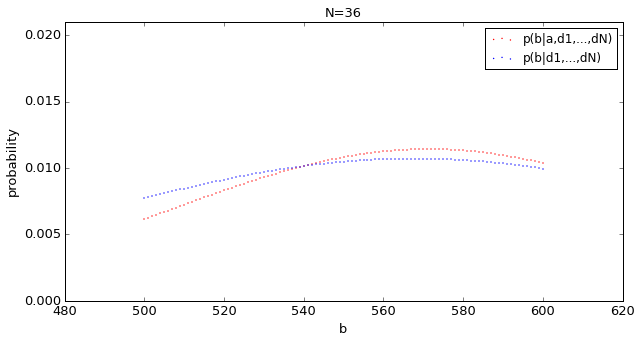

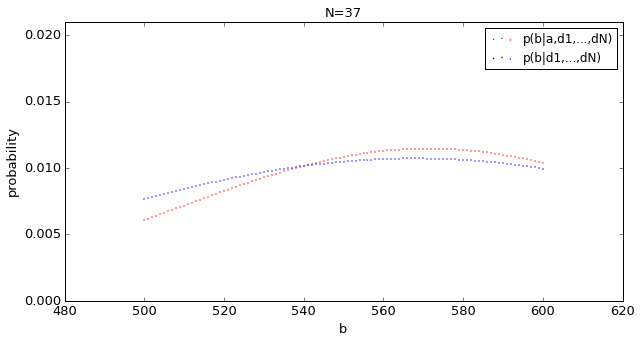

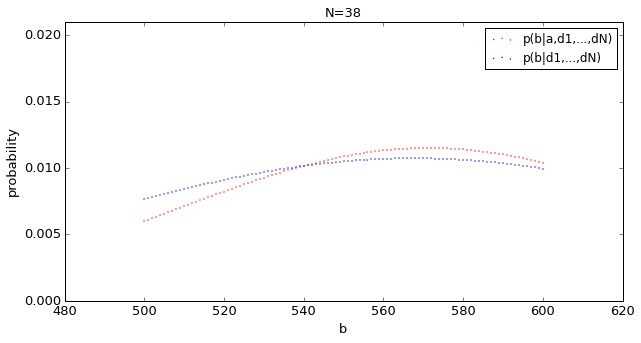

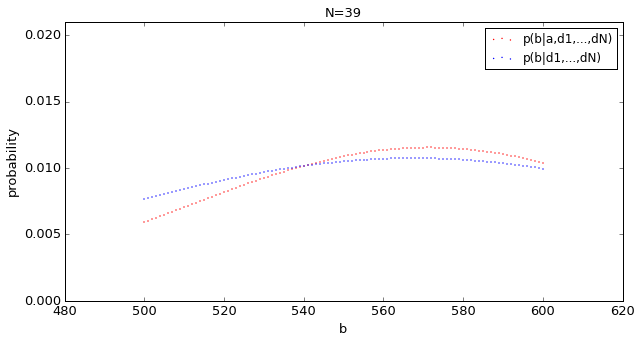

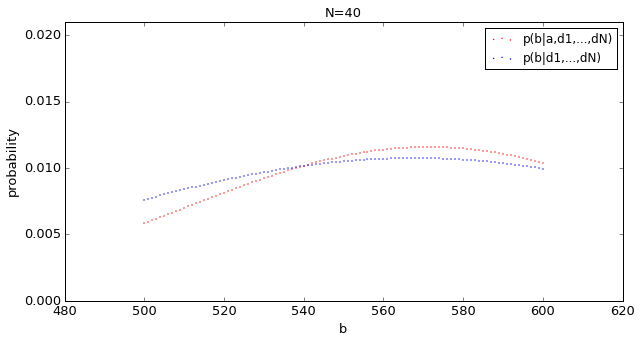

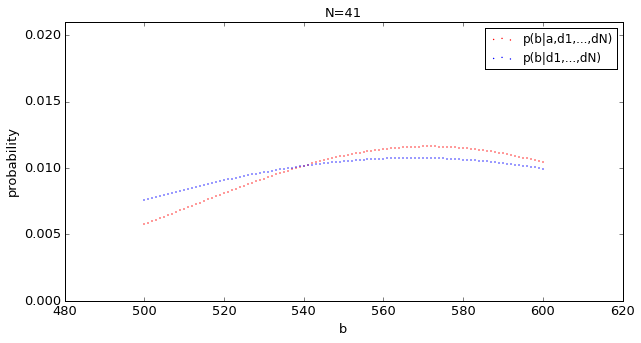

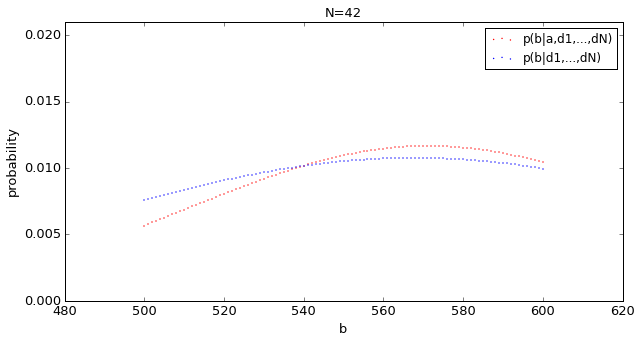

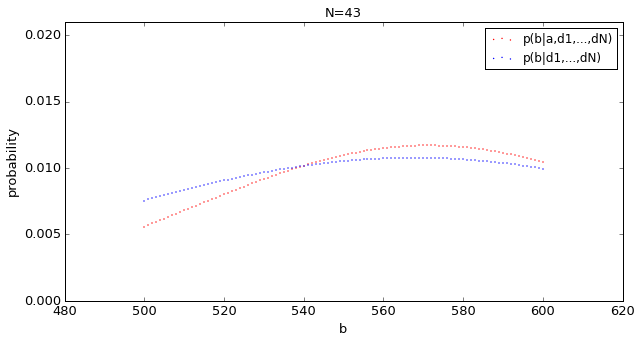

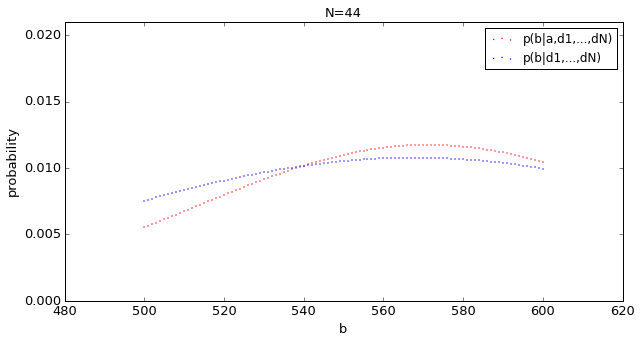

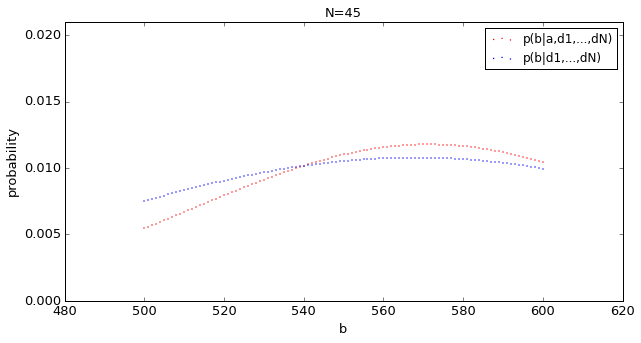

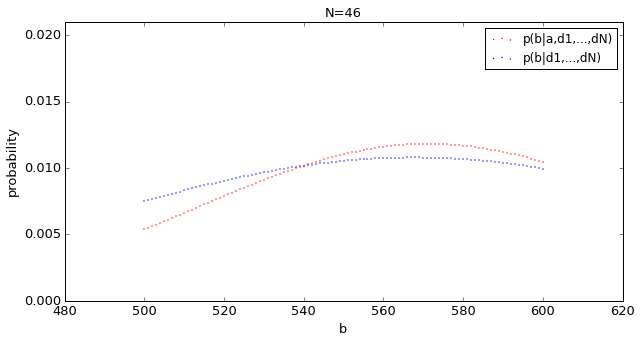

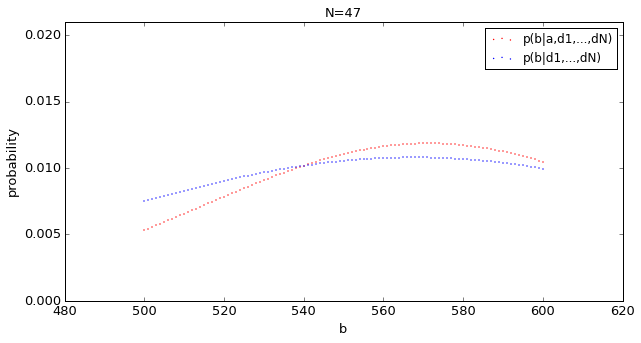

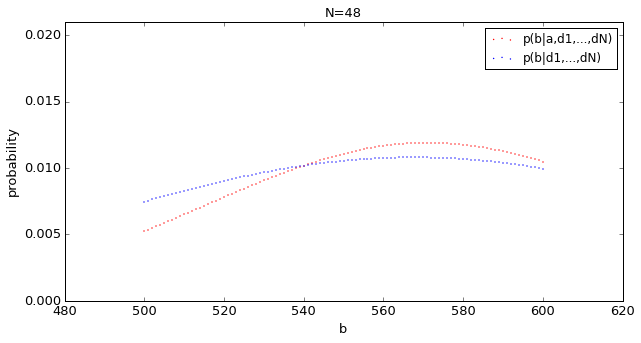

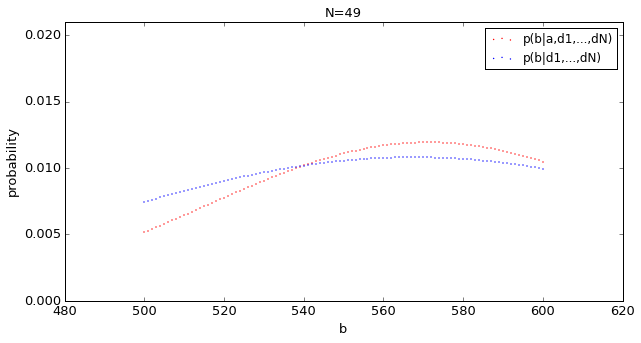

In [34]:
plt.rcParams['figure.figsize'] = 10, 5
i = 0
for i in range(pb_ad[0].shape[1]):
    plt.title('N=' + str(i), size=13)
    plt.xlabel('b', size=13)
    plt.ylabel('probability', size=13)
    plt.tick_params(axis='both', which='major', labelsize=13)
    plt.scatter(pb_ad[1], pb_ad[0].T[i], s=2, linewidths=0, c='r', label='p(b|a,d1,...,dN)')
    plt.scatter(pb_d[1], pb_d[0].T[i], s=2, linewidths=0, label='p(b|d1,...,dN)')
    plt.legend(loc='best')
    plt.ylim((0, 0.021))
    plt.show()
    i += 1

## 4. Замер времени работы

In [35]:
%timeit bro.pc(params, 4)

10 loops, best of 3: 35.4 ms per loop


In [36]:
%timeit bro.pd(params, 4)

10 loops, best of 3: 55.9 ms per loop


In [37]:
%timeit bro.pb_d(d, params, 4)

1 loops, best of 3: 36.1 s per loop


In [38]:
%timeit bro.pb_ad(a, d, params, 4)

1 loops, best of 3: 2.25 s per loop
